# Fitness Data Analysis and Mathematical Modeling Decision Support at Trivisio

# Introduction



Trivisio is a company that develops cutting-edge wearable devices, with a particular focus on promoting the Colibri Wireless. The Colibri Wireless unit consists of three sensors dedicated to measuring various parameters. The sensor positions include 1 IMU over the wrist on the dominant arm, 1 IMU on the chest, and 1 IMU on the dominant side's ankle. These sensors provide information on different features, including timestamp (seconds), activity ID, heart rate (bpm), temperature, 3D-acceleration scale (±16g, resolution: 13-bit), 3D-acceleration scale (±6g, resolution: 13-bit), 3D-gyroscope, 3D-magnetometer, and orientation. The company's primary objective is to position its product as superior to key competitors in the market.

To gain a competitive edge, Trivisio has collected comprehensive data from nine individuals, both male and female, aged 24-31, who wore three IMUs and a heart-rate monitor. Each subject participated in 12 recommended physical activities, such as walking, cycling, and playing football, with some engaging in an additional six optional activities. The data was collected to evaluate the performance of the Colibri Wireless unit during various physical activities and to gather information on the subjects' movements. Additionally, information about each candidate, such as Subject_ID, Sex, Age_(years), Height_(cm), Weight_(kg), Resting HR_(bpm), Max_HR_(bpm), and Dominant_hand, is available.


Prior to analysis, the dataset underwent a meticulous preprocessing phase where issues such as missing values, outliers, and inconsistencies were addressed. This preprocessing ensures that our analysis is based on the most accurate and representative data possible.

The primary objectives of this analysis is To Uncover Patterns and Trends by examining the dataset, we aim to identify underlying patterns and trends that could inform our strategic decisions. To Develop Predictive Models, Utilizing advanced mathematical modeling techniques, we intend to develop models that can predict future trends or outcomes based on the data. To Show important features.To Provide Actionable Insights, The ultimate goal is to translate these data-driven insights into actionable recommendations that can drive value for Trivisio.
This report is structured to take you through this journey of data exploration, analysis, and model development, culminating in strategic recommendations based on our findings.


# Exploratory Data Analysis

### Data Cleaning and Preprocessing

As mentioned earlier, there are 9 candidates with two different activity categories: Optional and Protocol. For Optional activities, we have information for 5 candidates, and for Protocol, we have information for 9 candidates. The details of each candidate have been included in the dataset. The activityID=0, orientation (invalid in this data collection), and 3D-acceleration scale (±6g) have been excluded from any analysis, as per the company's instructions.


We have defined numerical values for the Sex column to facilitate data analysis: 0 for female and 1 for male. 

The null data has been removed when it was needed.

The Dominant_hand column has been removed as it was deemed unhelpful. By examining the heart rate with the maximum and minimum values, we exclude rows that fall outside of this range for each person and after that, we delete the 'Resting HR_(bpm)' and 'Max_HR_(bpm)' columns since. Additionally, it has been stated that the BMI of all subjects is very close to each other so after calculating and comparing remove this column too. Consequently, we decided to remove the 'Sex,' 'Age_(years),' and 'Height_(cm)' columns due to the substantial size of our dataset. In certain instances, we encountered challenges in covering all features comprehensively, with some analyses taking extended durations (up to two hours) to generate results. Therefore, the removal of less critical features was deemed necessary to streamline and expedite the analysis process. However, for datasets with varying subjects and different BMI values, we recommend calculating the BMI and adding it as a new column and feature.

Since subject 109 has participated in fewer types of activities, we have removed them from our dataset.

Column names have been changed to enhance efficiency.


It was noted that heart rate was missing in 2,711,454 records, but through backward filling (bfill) we replace them. Backward filling fills missing values with the next available non-missing value in the column methods, this was reduced to 31 missing records.

The MET (Metabolic Equivalent of Task) columns have been added to the dataset to provide a better understanding during analysis. With the help of MET, we separated our data into active and sedentary actions.

Additionally, the activity columns have been added to the dataset to improve the interpretation of each activity ID.
By comparing the MET (Metabolic Equivalent of Task) values, active_or_sedentary columns will add


All of the charts provide information about our data, including maximum, mean, minimum, type, and ... .

Plots aim to visualize the results for better understanding. Each plot is accompanied by a description.

In [2]:
#import all of the libries that i need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import itertools
import warnings
import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from joblib import parallel_backend

In [2]:
#creat a data for the candidates
# initialising dataframe
headers=['timestamp (seconds)','activity ID', 'heart rate (bpm)','hand - temperature', 'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2','hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','hand - 3D-gyroscope -1','hand - 3D-gyroscope -2','hand - 3D-gyroscope -3',  'hand - 3D-magnetometer -1','hand - 3D-magnetometer -2','hand - 3D-magnetometer -3','hand - orientation (invalid in this data collection) -1',  'hand - orientation (invalid in this data collection) -2','hand - orientation (invalid in this data collection) -3',  'hand - orientation (invalid in this data collection) -4','chest - temperature', 'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -2','chest - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','chest - 3D-gyroscope -1','chest - 3D-gyroscope -2','chest - 3D-gyroscope -3', 'chest - 3D-magnetometer -1','chest - 3D-magnetometer -2','chest - 3D-magnetometer -3','chest - orientation (invalid in this data collection) -1',  'chest - orientation (invalid in this data collection) -2','chest - orientation (invalid in this data collection) -3',  'chest - orientation (invalid in this data collection) -4','ankle - temperature' ,'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -2','ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','ankle - 3D-gyroscope -1','ankle - 3D-gyroscope -2','ankle - 3D-gyroscope -3',  'ankle - 3D-magnetometer -1','ankle - 3D-magnetometer -2','ankle - 3D-magnetometer -3','ankle - orientation (invalid in this data collection) -1',  'ankle - orientation (invalid in this data collection) -2','ankle - orientation (invalid in this data collection) -3',  'ankle - orientation (invalid in this data collection) -4']

head= ['Subject_ID','Sex','Age_(years)','Height_(cm)','Weight_(kg)','Resting HR_(bpm)','Max_HR_(bpm)','Dominant_hand']

df_raw=pd.DataFrame(columns=headers)
for i in range(1,len(head)+1): 

    df_raw.insert(loc=0,column=head[-i],value="")
 
df_subjects=pd.DataFrame(data=[[101,'Male',27,182,83,75,193,'right'],[102,'Female',25,169,78,74,195,'right'],[103,'Male',31,187,92,68,189,'right'],[104,'Male',24,194,95,58,196,'right'],[105,'Male',26,180,73,70,194,'right'],[106,'Male',26,183,69,60,194,'right'],[107,'Male',23,173,86,60,197,'right'],[108,'Male',32,179,87,66,188,'left'],[109,'Male',31,168,65,54,189,'right']],columns=['Subject_ID','Sex','Age_(years)','Height_(cm)','Weight_(kg)','Resting HR_(bpm)','Max_HR_(bpm)','Dominant_hand'])

    

In [7]:
# our candidates dataframe
df_subjects.head(10)

Subject_ID     Sex  Age_(years)  Height_(cm)  Weight_(kg)  \
0         101    Male           27          182           83   
1         102  Female           25          169           78   
2         103    Male           31          187           92   
3         104    Male           24          194           95   
4         105    Male           26          180           73   
5         106    Male           26          183           69   
6         107    Male           23          173           86   
7         108    Male           32          179           87   
8         109    Male           31          168           65   

   Resting HR_(bpm)  Max_HR_(bpm) Dominant_hand  
0                75           193         right  
1                74           195         right  
2                68           189         right  
3                58           196         right  
4                70           194         right  
5                60           194         right  
6                60           197         right  
7                66           188          left  
8                54           189         right

In [3]:
datas=[[101,'Male',27,182,83,75,193,'right'],[102,'Female',25,169,78,74,195,'right'],[103,'Male',31,187,92,68,189,'right'],[104,'Male',24,194,95,58,196,'right'],[105,'Male',26,180,73,70,194,'right'],[106,'Male',26,183,69,60,194,'right'],[107,'Male',23,173,86,60,197,'right'],[108,'Male',32,179,87,66,188,'left'],[109,'Male',31,168,65,54,189,'right']]

In [4]:
#read the data from Optional activities and Protocol, put all in one dataframe
list9 = [1,5,6,8,9]
dfs2 = []

for i in np.arange(1,10,1):
    
    df2=pd.read_csv(f"subject1{i:0>2d}p.dat",names=headers,delimiter=" ")
    for j in range (1 , len(head)+1):
        df2.insert(loc=0,column=head[-j],value=datas[i-1][-j])
    dfs2.append(df2)
    
    
for i in list9 :   
    
    
    df2=pd.read_csv(f"subject1{i:0>2d}p.dat",names=headers,delimiter=" ")
    for j in range (1 , len(head)+1):
        df2.insert(loc=0,column=head[-j],value=datas[i-1][-j])
    dfs2.append(df2)


df_raw2 = pd.concat(dfs2, ignore_index=True)

    

In [10]:
#totall dataframe
#show top five
df_raw2.head(5)

Subject_ID   Sex  Age_(years)  Height_(cm)  Weight_(kg)  Resting HR_(bpm)  \
0         101  Male           27          182           83                75   
1         101  Male           27          182           83                75   
2         101  Male           27          182           83                75   
3         101  Male           27          182           83                75   
4         101  Male           27          182           83                75   

   Max_HR_(bpm) Dominant_hand  timestamp (seconds)  activity ID  ...  \
0           193         right                 8.38            0  ...   
1           193         right                 8.39            0  ...   
2           193         right                 8.40            0  ...   
3           193         right                 8.41            0  ...   
4           193         right                 8.42            0  ...   

   ankle - 3D-gyroscope -1  ankle - 3D-gyroscope -2  ankle - 3D-gyroscope -3  \
0                 0.008300                 0.009250                -0.017580   
1                -0.006577                -0.004638                 0.000368   
2                 0.003014                 0.000148                 0.022495   
3                 0.003175                -0.020301                 0.011275   
4                 0.012698                -0.014303                -0.002823   

   ankle - 3D-magnetometer -1  ankle - 3D-magnetometer -2  \
0                    -61.1888                    -38.9599   
1                    -59.8479                    -38.8919   
2                    -60.7361                    -39.4138   
3                    -60.4091                    -38.7635   
4                    -61.5199                    -39.3879   

   ankle - 3D-magnetometer -3  \
0                    -58.1438   
1                    -58.5253   
2                    -58.3999   
3                    -58.3956   
4                    -58.2694   

   ankle - orientation (invalid in this data collection) -1  \
0                                                1.0          
1                                                1.0          
2                                                1.0          
3                                                1.0          
4                                                1.0          

   ankle - orientation (invalid in this data collection) -2  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   ankle - orientation (invalid in this data collection) -3  \
0                                                0.0          
1                                                0.0          
2                                                0.0          
3                                                0.0          
4                                                0.0          

   ankle - orientation (invalid in this data collection) -4  
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

[5 rows x 62 columns]

In [5]:
# show the last five
df_raw2.tail(5)

Subject_ID   Sex  Age_(years)  Height_(cm)  Weight_(kg)  \
4402053         109  Male           31          168           65   
4402054         109  Male           31          168           65   
4402055         109  Male           31          168           65   
4402056         109  Male           31          168           65   
4402057         109  Male           31          168           65   

         Resting HR_(bpm)  Max_HR_(bpm) Dominant_hand  timestamp (seconds)  \
4402053                54           189         right               100.19   
4402054                54           189         right               100.20   
4402055                54           189         right               100.21   
4402056                54           189         right               100.22   
4402057                54           189         right               100.23   

         activity ID  ...  ankle - 3D-gyroscope -1  ankle - 3D-gyroscope -2  \
4402053            0  ...                -0.037788                -0.062676   
4402054            0  ...                -0.068904                -0.027006   
4402055            0  ...                -0.070888                -0.038024   
4402056            0  ...                 0.018961                -0.025796   
4402057            0  ...                -0.027472                 0.011866   

         ankle - 3D-gyroscope -3  ankle - 3D-magnetometer -1  \
4402053                -0.127084                    -46.5153   
4402054                -0.089808                    -45.7474   
4402055                -0.064709                    -46.3997   
4402056                -0.064357                    -46.5282   
4402057                -0.042858                    -46.2704   

         ankle - 3D-magnetometer -2  ankle - 3D-magnetometer -3  \
4402053                     3.58240                   -0.035995   
4402054                     3.54453                    0.108583   
4402055                     4.22078                    0.105504   
4402056                     4.48593                    0.530240   
4402057                     4.21475                    0.247798   

         ankle - orientation (invalid in this data collection) -1  \
4402053                                           0.598531          
4402054                                           0.598428          
4402055                                           0.598233          
4402056                                           0.598116          
4402057                                           0.598119          

         ankle - orientation (invalid in this data collection) -2  \
4402053                                           0.033615          
4402054                                           0.033012          
4402055                                           0.033172          
4402056                                           0.033427          
4402057                                           0.033685          

         ankle - orientation (invalid in this data collection) -3  \
4402053                                           0.799791          
4402054                                           0.799933          
4402055                                           0.800095          
4402056                                           0.800180          
4402057                                           0.800188          

         ankle - orientation (invalid in this data collection) -4  
4402053                                          -0.031075         
4402054                                          -0.030018         
4402055                                          -0.029416         
4402056                                          -0.029208         
4402057                                          -0.028602         

[5 rows x 62 columns]

In [6]:
#create a copy
df = copy.deepcopy(df_raw2)

In [7]:
#change columns name 
headers=['timestamp (seconds)','activity ID', 'heart rate (bpm)','hand - temperature', 'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2','hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','hand - 3D-gyroscope -1','hand - 3D-gyroscope -2','hand - 3D-gyroscope -3',  'hand - 3D-magnetometer -1','hand - 3D-magnetometer -2','hand - 3D-magnetometer -3','hand - orientation (invalid in this data collection) -1',  'hand - orientation (invalid in this data collection) -2','hand - orientation (invalid in this data collection) -3',  'hand - orientation (invalid in this data collection) -4','chest - temperature', 'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'chest - 3D-acceleration scale: ±16g, resolution: 13-bit -2','chest - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','chest - 3D-gyroscope -1','chest - 3D-gyroscope -2','chest - 3D-gyroscope -3', 'chest - 3D-magnetometer -1','chest - 3D-magnetometer -2','chest - 3D-magnetometer -3','chest - orientation (invalid in this data collection) -1',  'chest - orientation (invalid in this data collection) -2','chest - orientation (invalid in this data collection) -3',  'chest - orientation (invalid in this data collection) -4','ankle - temperature' ,'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1',  'ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -2','ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -3',  'ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -1','ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -2',  'ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -3','ankle - 3D-gyroscope -1','ankle - 3D-gyroscope -2','ankle - 3D-gyroscope -3',  'ankle - 3D-magnetometer -1','ankle - 3D-magnetometer -2','ankle - 3D-magnetometer -3','ankle - orientation (invalid in this data collection) -1',  'ankle - orientation (invalid in this data collection) -2','ankle - orientation (invalid in this data collection) -3',  'ankle - orientation (invalid in this data collection) -4']
columns = {"Resting HR_(bpm)" : "Resting_HR",
           "Max_HR_(bpm)" : "Max_HR",
           "timestamp (seconds)" : "timestamp",
           "activity ID" : "activity_ID",
           "heart rate (bpm)" : "heart_rate",
           "hand - temperature" : "hand_temperature",
           "hand - 3D-acceleration scale: ±16g, resolution: 13-bit -1" : "hand±16gscale_13bitresolution_1",
           "hand - 3D-acceleration scale: ±16g, resolution: 13-bit -2" : "hand±16gscale_13bitresolution_2",
           "hand - 3D-acceleration scale: ±16g, resolution: 13-bit -3" : "hand±16gscale_13bitresolution_3",
           "hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -1" : "hand±6gscale_13bit*resolution_1",
           "hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -2" : "hand±6gscale_13bit*resolution_2",
           "hand - 3D-acceleration scale: ±6g, resolution: 13-bit* -3" : "hand±6gscale_13bit*resolution_3",
           "hand - 3D-gyroscope -1" : "hand_3Dgyroscope_1",
           "hand - 3D-gyroscope -2" : "hand_3Dgyroscope_2",
           "hand - 3D-gyroscope -3" : "hand_3Dgyroscope_3",
           "hand - 3D-magnetometer -1" : "hand_3Dmagnetometer_1",
           "hand - 3D-magnetometer -2" : "hand_3Dmagnetometer_2",
           "hand - 3D-magnetometer -3" : "hand_3Dmagnetometer_3",
           "hand - orientation (invalid in this data collection) -1" : "hand_orientation_1",
           "hand - orientation (invalid in this data collection) -2" : "hand_orientation_2",
           "hand - orientation (invalid in this data collection) -3" : "hand_orientation_3",
           "hand - orientation (invalid in this data collection) -4" : "hand_orientation_4",
           "chest - temperature" : "chest_temperature",
           "chest - 3D-acceleration scale: ±16g, resolution: 13-bit -1" : "chest±16gscale_13bitresolution_1",
           "chest - 3D-acceleration scale: ±16g, resolution: 13-bit -2" : "chest±16gscale_13bitresolution_2",
           "chest - 3D-acceleration scale: ±16g, resolution: 13-bit -3" : "chest±16gscale_13bitresolution_3",
           "chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -1" : "chest±6gscale_13bit*resolution_1",
           "chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -2" : "chest±6gscale_13bit*resolution_2",
           "chest - 3D-acceleration scale: ±6g, resolution: 13-bit* -3" : "chest±6gscale_13bit*resolution_3",
           "chest - 3D-gyroscope -1" : "chest_3Dgyroscope_1",
           "chest - 3D-gyroscope -2" : "chest_3Dgyroscope_2",
           "chest - 3D-gyroscope -3" : "chest_3Dgyroscope_3",
           "chest - 3D-magnetometer -1" : "chest_3Dmagnetometer_1",
           "chest - 3D-magnetometer -2" : "chest_3Dmagnetometer_2",
           "chest - 3D-magnetometer -3" : "chest_3Dmagnetometer_3",
           "chest - orientation (invalid in this data collection) -1" : "chest_orientation_1",
           "chest - orientation (invalid in this data collection) -2" : "chest_orientation_2",
           "chest - orientation (invalid in this data collection) -3" : "chest_orientation_3",
           "chest - orientation (invalid in this data collection) -4" : "chest_orientation_4",
           "ankle - temperature" : "ankle_temperature",
           "ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -1" : "ankle±16gscale_13bitresolution_1",
           "ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -2" : "ankle±16gscale_13bitresolution_2",
           "ankle - 3D-acceleration scale: ±16g, resolution: 13-bit -3" : "ankle±16gscale_13bitresolution_3",
           "ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -1" : "ankle±6gscale_13bit*resolution_1",
           "ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -2" : "ankle±6gscale_13bit*resolution_2",
           "ankle - 3D-acceleration scale: ±6g, resolution: 13-bit* -3" : "ankle±6gscale_13bit*resolution_3",
           "ankle - 3D-gyroscope -1" : "ankle_3Dgyroscope_1",
           "ankle - 3D-gyroscope -2" : "ankle_3Dgyroscope_2",
           "ankle - 3D-gyroscope -3" : "ankle_3Dgyroscope_3",
           "ankle - 3D-magnetometer -1" : "ankle_3Dmagnetometer_1",
           "ankle - 3D-magnetometer -2" : "ankle_3Dmagnetometer_2",
           "ankle - 3D-magnetometer -3" : "ankle_3Dmagnetometer_3",
           "ankle - orientation (invalid in this data collection) -1" : "anklet_orientation_1",
           "ankle - orientation (invalid in this data collection) -2" : "ankle_orientation_2",
           "ankle - orientation (invalid in this data collection) -3" : "ankle_orientation_3",
           "ankle - orientation (invalid in this data collection) -4" : "ankle_orientation_4"}

df.rename(columns=columns,inplace=True)

df.head(5)

Subject_ID   Sex  Age_(years)  Height_(cm)  Weight_(kg)  Resting_HR  \
0         101  Male           27          182           83          75   
1         101  Male           27          182           83          75   
2         101  Male           27          182           83          75   
3         101  Male           27          182           83          75   
4         101  Male           27          182           83          75   

   Max_HR Dominant_hand  timestamp  activity_ID  ...  ankle_3Dgyroscope_1  \
0     193         right       8.38            0  ...             0.008300   
1     193         right       8.39            0  ...            -0.006577   
2     193         right       8.40            0  ...             0.003014   
3     193         right       8.41            0  ...             0.003175   
4     193         right       8.42            0  ...             0.012698   

   ankle_3Dgyroscope_2  ankle_3Dgyroscope_3  ankle_3Dmagnetometer_1  \
0             0.009250            -0.017580                -61.1888   
1            -0.004638             0.000368                -59.8479   
2             0.000148             0.022495                -60.7361   
3            -0.020301             0.011275                -60.4091   
4            -0.014303            -0.002823                -61.5199   

   ankle_3Dmagnetometer_2  ankle_3Dmagnetometer_3  anklet_orientation_1  \
0                -38.9599                -58.1438                   1.0   
1                -38.8919                -58.5253                   1.0   
2                -39.4138                -58.3999                   1.0   
3                -38.7635                -58.3956                   1.0   
4                -39.3879                -58.2694                   1.0   

   ankle_orientation_2  ankle_orientation_3  ankle_orientation_4  
0                  0.0                  0.0                  0.0  
1                  0.0                  0.0                  0.0  
2                  0.0                  0.0                  0.0  
3                  0.0                  0.0                  0.0  
4                  0.0                  0.0                  0.0  

[5 rows x 62 columns]

In [8]:
#drop Dominant_hand column
df.drop(columns=["Dominant_hand"],inplace=True)

In [12]:
#count sex column
pd.unique(df.Sex)
pd.value_counts(df.Sex)

Sex
Male      3955058
Female     447000
Name: count, dtype: int64

In [9]:
#change male to 1 
df["Sex"] = df.Sex.apply(lambda x : 1 if x == "Male" else 0)

In [10]:
# show the number of columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402058 entries, 0 to 4402057
Data columns (total 61 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Subject_ID                        int64  
 1   Sex                               int64  
 2   Age_(years)                       int64  
 3   Height_(cm)                       int64  
 4   Weight_(kg)                       int64  
 5   Resting_HR                        int64  
 6   Max_HR                            int64  
 7   timestamp                         float64
 8   activity_ID                       int64  
 9   heart_rate                        float64
 10  hand_temperature                  float64
 11  hand±16gscale_13bitresolution_1   float64
 12  hand±16gscale_13bitresolution_2   float64
 13  hand±16gscale_13bitresolution_3   float64
 14  hand±6gscale_13bit*resolution_1   float64
 15  hand±6gscale_13bit*resolution_2   float64
 16  hand±6gscale_13bit*resolution_3   fl

In [11]:
#describe the dataframe
df.describe()

Subject_ID           Sex   Age_(years)   Height_(cm)   Weight_(kg)  \
count  4.402058e+06  4.402058e+06  4.402058e+06  4.402058e+06  4.402058e+06   
mean   1.047000e+02  8.984566e-01  2.712474e+01  1.804382e+02  8.078939e+01   
std    2.458492e+00  3.020470e-01  2.855530e+00  5.998133e+00  8.196791e+00   
min    1.010000e+02  0.000000e+00  2.300000e+01  1.680000e+02  6.500000e+01   
25%    1.020000e+02  1.000000e+00  2.600000e+01  1.790000e+02  7.300000e+01   
50%    1.050000e+02  1.000000e+00  2.600000e+01  1.800000e+02  8.300000e+01   
75%    1.070000e+02  1.000000e+00  2.700000e+01  1.830000e+02  8.700000e+01   
max    1.090000e+02  1.000000e+00  3.200000e+01  1.940000e+02  9.500000e+01   

         Resting_HR        Max_HR     timestamp   activity_ID     heart_rate  \
count  4.402058e+06  4.402058e+06  4.402058e+06  4.402058e+06  401884.000000   
mean   6.708858e+01  1.928753e+02  1.857612e+03  5.504967e+00     111.227456   
std    5.995759e+00  2.855530e+00  1.107619e+03  6.371271e+00      26.606721   
min    5.400000e+01  1.880000e+02  5.640000e+00  0.000000e+00      57.000000   
25%    6.000000e+01  1.930000e+02  9.091800e+02  0.000000e+00      90.000000   
50%    6.800000e+01  1.940000e+02  1.826280e+03  3.000000e+00     109.000000   
75%    7.400000e+01  1.940000e+02  2.762410e+03  7.000000e+00     127.000000   
max    7.500000e+01  1.970000e+02  4.475630e+03  2.400000e+01     202.000000   

       ...  ankle_3Dgyroscope_1  ankle_3Dgyroscope_2  ankle_3Dgyroscope_3  \
count  ...         4.383670e+06         4.383670e+06         4.383670e+06   
mean   ...         1.109148e-02        -3.053597e-02         7.721961e-03   
std    ...         1.085896e+00         6.082269e-01         1.881235e+00   
min    ...        -2.399500e+01        -1.812690e+01        -1.401960e+01   
25%    ...        -1.512800e-01        -8.558940e-02        -3.069660e-01   
50%    ...         4.773510e-03        -3.644890e-03        -1.629320e-03   
75%    ...         1.052680e-01         9.067348e-02         7.333270e-02   
max    ...         1.742040e+01         1.358820e+01         1.652880e+01   

       ankle_3Dmagnetometer_1  ankle_3Dmagnetometer_2  ankle_3Dmagnetometer_3  \
count            4.383670e+06            4.383670e+06            4.383670e+06   
mean            -3.385654e+01            1.808834e+00            1.649669e+01   
std              1.924419e+01            2.244990e+01            2.064675e+01   
min             -1.728650e+02           -1.379080e+02           -1.092890e+02   
25%             -4.366860e+01           -1.190950e+01            2.483160e+00   
50%             -3.464610e+01            2.206960e+00            1.774720e+01   
75%             -2.014690e+01            1.809170e+01            3.052720e+01   
max              9.752550e+01            1.233060e+02            1.469000e+02   

       anklet_orientation_1  ankle_orientation_2  ankle_orientation_3  \
count          4.383670e+06         4.383670e+06         4.383670e+06   
mean           4.308085e-01         3.187216e-02         2.998506e-01   
std            3.185247e-01         5.544255e-01         3.288744e-01   
min           -2.536280e-01        -9.568760e-01        -8.768380e-01   
25%            1.681150e-01        -5.341177e-01         0.000000e+00   
50%            3.579510e-01         0.000000e+00         2.935350e-01   
75%            6.120760e-01         6.191790e-01         5.938400e-01   
max            1.000000e+00         9.595380e-01         9.923540e-01   

       ankle_orientation_4  
count         4.383670e+06  
mean         -5.754411e-03  
std           4.543577e-01  
min          -9.972810e-01  
25%          -4.682270e-01  
50%           0.000000e+00  
75%           4.527308e-01  
max           9.961050e-01  

[8 rows x 61 columns]

In [14]:
#count the activity_ID
pd.unique(df.activity_ID)
df.activity_ID.value_counts()


activity_ID
0     1125552
10     309935
4      238761
17     238690
1      192523
3      189931
7      188107
19     187188
2      185188
16     175353
6      164600
12     117216
13     104944
18      99878
5       98199
9       83646
11      54519
24      49360
20      46915
Name: count, dtype: int64

In [17]:
pd.unique(df["Weight_(kg)"])
df["Weight_(kg)"].value_counts()

Weight_(kg)
87    816062
83    752834
73    749566
69    723634
78    447000
95    329576
86    313599
92    252833
65     16954
Name: count, dtype: int64

In [19]:


# Calculate BMI
df['BMI'] = df['Weight_(kg)'] / ((df['Height_(cm)'] / 100 )** 2)

# Optional: Round the BMI values to two decimal places
df['BMI'] = df['BMI'].round(2)

# Display the updated DataFrame


In [20]:
#drop orientation
df.drop(list(df.filter(regex="orientation")),axis=1,inplace=True)

In [21]:
# drop activity_ID=0
df=df.loc[df['activity_ID']!=0]

In [22]:
#drop regex=±6g
df.drop(list(df.filter(regex='±6g')),axis=1,inplace=True)

C:\Users\spin 3\AppData\Local\Temp\ipykernel_20244\2237526310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(list(df.filter(regex='±6g')),axis=1,inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2983860 entries, 2928 to 4401544
Data columns (total 41 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Subject_ID                        int64  
 1   Sex                               int64  
 2   Age_(years)                       int64  
 3   Height_(cm)                       int64  
 4   Weight_(kg)                       int64  
 5   Resting_HR                        int64  
 6   Max_HR                            int64  
 7   timestamp                         float64
 8   activity_ID                       int64  
 9   heart_rate                        float64
 10  hand_temperature                  float64
 11  hand±16gscale_13bitresolution_1   float64
 12  hand±16gscale_13bitresolution_2   float64
 13  hand±16gscale_13bitresolution_3   float64
 14  hand_3Dgyroscope_1                float64
 15  hand_3Dgyroscope_2                float64
 16  hand_3Dgyroscope_3                floa

In [24]:
#count heart rate missing
missing_heart_count=df['heart_rate'].isna().sum()
print("There are " + f'{missing_heart_count:,.0f}' + " missing heart rate records due to difference in frequency.")

There are 2,711,454 missing heart rate records due to difference in frequency.


In [25]:
#replace heart rate missing
df_heart_fill=df
df_heart_fill.loc[:,'heart_rate']=df.loc[:,['heart_rate']].fillna(method='bfill',axis=0)
incomplete_records_count=df_heart_fill.isna().any(axis=0).sum()
data_set_size=df_heart_fill.shape[0]
print("After filling the missing heart data, there are " + f'{incomplete_records_count:,.0f}'.format(incomplete_records_count) + 
      " records missing one or more values, out of a data set of size " + f'{data_set_size:,.0f}'+".")
df_master=df_heart_fill.dropna(axis=0,how='any')

After filling the missing heart data, there are 31 records missing one or more values, out of a data set of size 2,983,860.


In [26]:

# Dictionary containing unique max and min heart rates for each person
heart_rate_ranges = {
    101: {'min': 75, 'max': 193},
    102: {'min': 74, 'max': 195},
    103: {'min': 68, 'max': 189},
    104: {'min': 58, 'max': 196},
    105: {'min': 70, 'max': 194},
    106: {'min': 60, 'max': 194},
    107: {'min': 60, 'max': 197},
    108: {'min': 66, 'max': 188},
    109: {'min': 54, 'max': 189},
    
}

# Filter the DataFrame for each person based on their unique range
filtered_dfs = {}

for person, ranges in heart_rate_ranges.items():
    min_heart_rate = ranges['min']
    max_heart_rate = ranges['max']

    
    indices_to_drop = df_master[(df_master['Subject_ID'] == person) & ~((df_master['heart_rate'] >= min_heart_rate) & (df_master['heart_rate'] <= max_heart_rate))].index
    df_master.drop(indices_to_drop,inplace=True)
    df_master.reset_index(drop=True,inplace=True)
   



C:\Users\spin 3\AppData\Local\Temp\ipykernel_20244\3838075530.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_master.drop(indices_to_drop,inplace=True)


In [27]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936044 entries, 0 to 2936043
Data columns (total 41 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Subject_ID                        int64  
 1   Sex                               int64  
 2   Age_(years)                       int64  
 3   Height_(cm)                       int64  
 4   Weight_(kg)                       int64  
 5   Resting_HR                        int64  
 6   Max_HR                            int64  
 7   timestamp                         float64
 8   activity_ID                       int64  
 9   heart_rate                        float64
 10  hand_temperature                  float64
 11  hand±16gscale_13bitresolution_1   float64
 12  hand±16gscale_13bitresolution_2   float64
 13  hand±16gscale_13bitresolution_3   float64
 14  hand_3Dgyroscope_1                float64
 15  hand_3Dgyroscope_2                float64
 16  hand_3Dgyroscope_3                fl

In [28]:
# Inserting more meaningful activity names
activity_mappings={1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking', 5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV', 10: 'computer work', 11: 'car driving', 12: 'ascending stairs', 13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing', 18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer', 24: 'rope jumping', 0: 'other (transient activities)'}
mapped_activities=df_master['activity_ID'].map(activity_mappings)
df_master.insert(loc=2,column='activity',value=mapped_activities)

In [29]:
# calculating METs
subject_weights=dict(zip(df_subjects['Subject_ID'],df_subjects['Weight_(kg)']))
activity_MET_dict={'lying':1,'sitting':1.8,'standing':1.8,'walking':3.55,'running':7.5,'cycling':4,'Nordic walking':5.5,'watching TV':1,'computer work':1.8,'car driving':1.8,'ascending stairs':8,'descending stairs':3,'vacuum cleaning':3.5,'ironing':2.3,'folding laundry':2.3,'house cleaning':3.5,'playing soccer':7.5,'rope jumping':9}
MET=df_master['activity'].map(activity_MET_dict)
df_master.insert(loc=2,column='MET',value=MET)

In [ ]:
df_master.drop(columns=["Resting_HR"],inplace=True)
df_master.drop(columns=["Max_HR"],inplace=True)
df_master.drop(columns=["Sex"],inplace=True)
df_master.drop(columns=["Age_(years)"],inplace=True)
df_master.drop(columns=["Height_(cm)"],inplace=True)
df_master.drop(columns=["Weight_(kg)"],inplace=True)
df_master.drop(columns=["BMI"],inplace=True)

In [20]:
gruopby_hand=df_master.groupby('Subject_ID')[['hand±16gscale_13bitresolution_1','chest±16gscale_13bitresolution_1', "ankle±16gscale_13bitresolution_1"]].mean()



gruopby_hand = gruopby_hand.sort_values('Subject_ID', ascending=False)


gruopby_hand.head(10)

hand±16gscale_13bitresolution_1  chest±16gscale_13bitresolution_1  \
Subject_ID                                                                      
109                               -0.720345                          0.255117   
108                               -5.177320                          0.516804   
107                               -5.387306                          0.432979   
106                               -5.034785                          0.455195   
105                               -4.279926                          0.376372   
104                               -5.953314                          0.213940   
103                               -4.491600                         -0.114383   
102                               -5.139091                          0.267817   
101                               -4.122797                          0.354541   

            ankle±16gscale_13bitresolution_1  
Subject_ID                                    
109                                 9.513932  
108                                 9.367088  
107                                 9.101315  
106                                 9.510983  
105                                 9.716642  
104                                 9.407666  
103                                 9.149234  
102                                 9.632021  
101                                 9.062882

In [46]:
# Removing outliers
Q1 = df_master['activity_ID'].quantile(0.25)
Q3 = df_master['activity_ID'].quantile(0.75)
IQR = Q3 - Q1
data = df_master[~((df_master['activity_ID'] < (Q1 - 1.5 * IQR)) | (df_master['activity_ID'] > (Q3 + 1.5 * IQR)))]

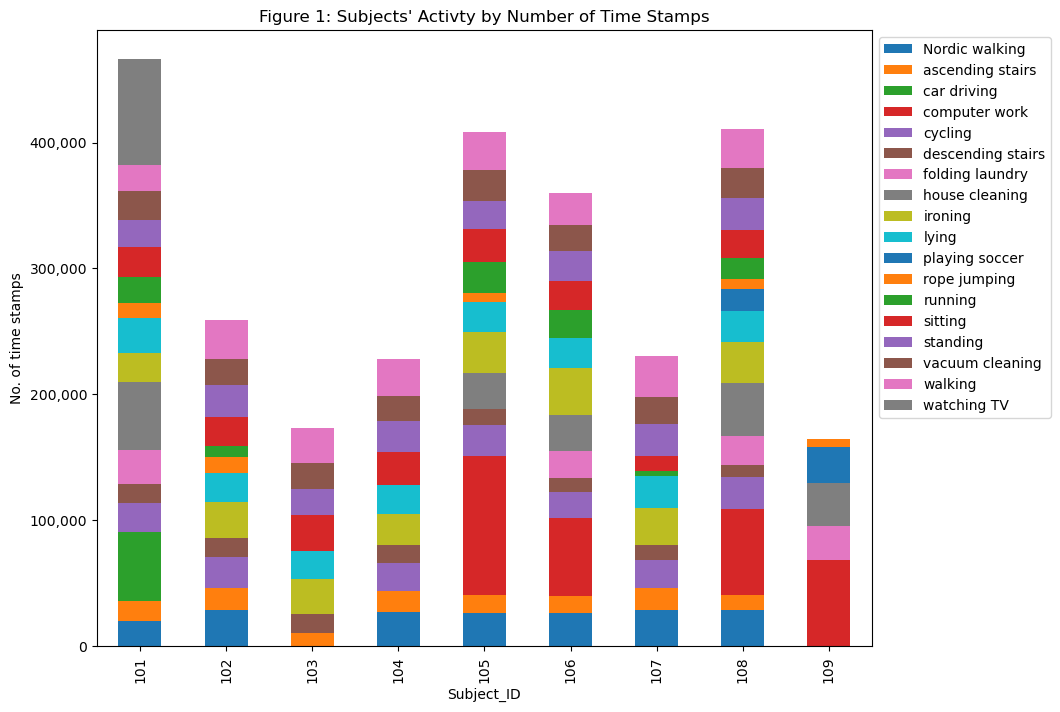

In [23]:
#bar chart
pivot1= pd.pivot_table(df_master,values='timestamp',index='Subject_ID',columns='activity',margins=False,
                       aggfunc='count')
pivot1.style.format('{:,.0f}') #apply(lambda x: '{,:.0}'.format(x))

ax=pivot1.plot(kind="bar",title="Figure 1: Subjects' Activty by Number of Time Stamps",figsize=(10,8),stacked=True);

ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_ylabel("No. of time stamps")
#box=ax((1,1))
plt.legend(bbox_to_anchor=(1,1));
#ax.set_position(1,1.1)

Figure 1 : 
This bar chart compares timestamp across different Activty. Each bar represents timestamp of each Activty for each subject ID.
Compare the bars to understand how timestamp of diffrent Activty varies across different subject ID

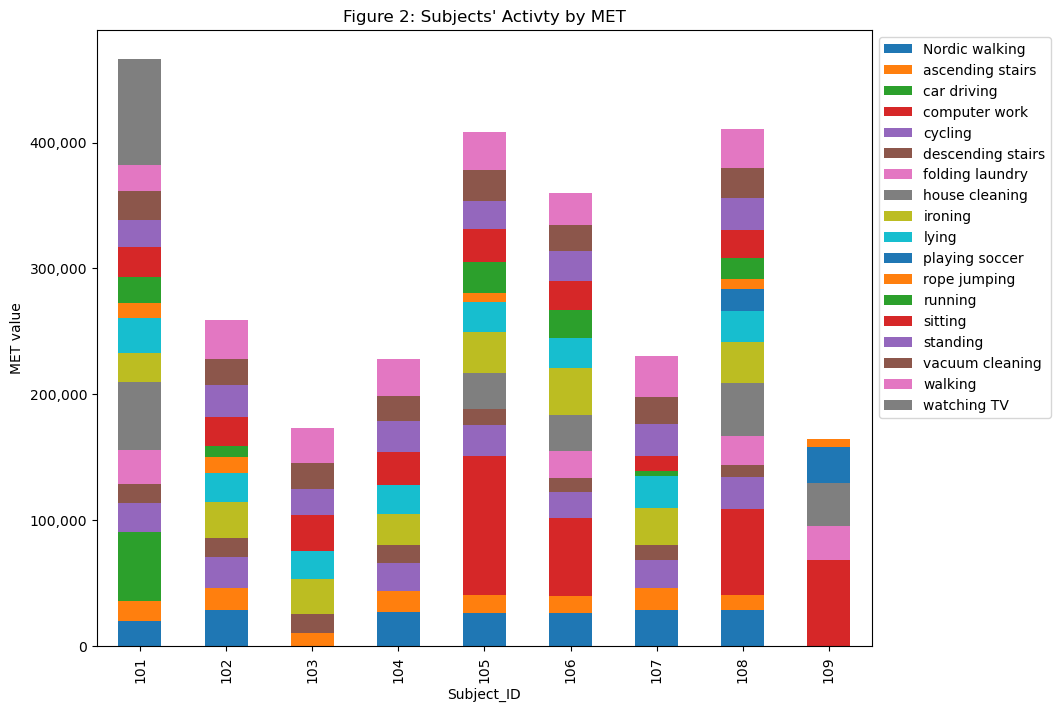

In [38]:
#bar chart
pivot1= pd.pivot_table(df_master,values='MET',index='Subject_ID',columns='activity',margins=False,
                       aggfunc='count')
pivot1.style.format('{:,.0f}') #apply(lambda x: '{,:.0}'.format(x))

ax=pivot1.plot(kind="bar",title="Figure 2: Subjects' Activty by MET",figsize=(10,8),stacked=True);

ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_ylabel("MET value")
#box=ax((1,1))
plt.legend(bbox_to_anchor=(1,1));
#ax.set_position(1,1.1)

Figure 2 : 
This bar chart compares MET across different Activty. Each bar represents MET of each Activty for each subject ID.
Compare the bars to understand how MET of diffrent Activty varies across different subject ID


From the bar plots, it is evident that Subject 109 has significantly fewer recordings compared to the other subjects we saw that this subject only participated in 5 activities , while Subjects 101, 105, 106, and 108 have the most recordings.

Additionally, it can be observed that certain subjects have no readings for specific activities. For instance, Subject 103 has no data for Nordic walking, cycling, rope jumping, or running, and Subject 104 has no recordings for rope jumping.

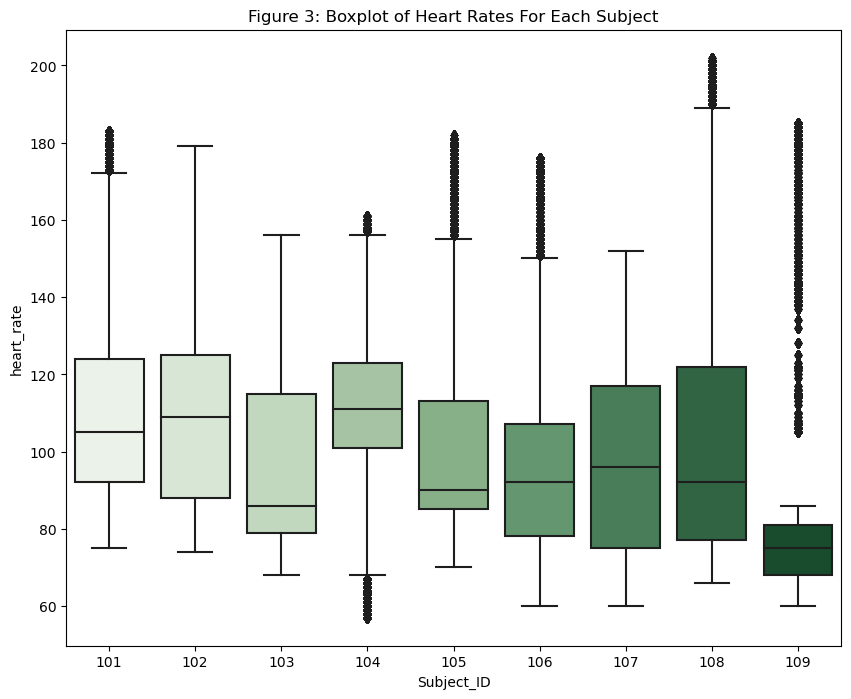

In [39]:
#box chart
plt.figure(figsize=(10,8))
sns.boxplot(x='Subject_ID',y='heart_rate',data=df_master,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 3: Boxplot of Heart Rates For Each Subject");

Figure 3 : 
 The box plot represents the distribution of heart rate for each subject ID, highlighting its median, quartiles, and outliers. The 'box' shows the interquartile range (IQR) where the middle 50% of values lie, and the 'whiskers' extend to show the range of the data.
Observe the spread of the data and potential outliers, which are points that lie outside the whiskers.


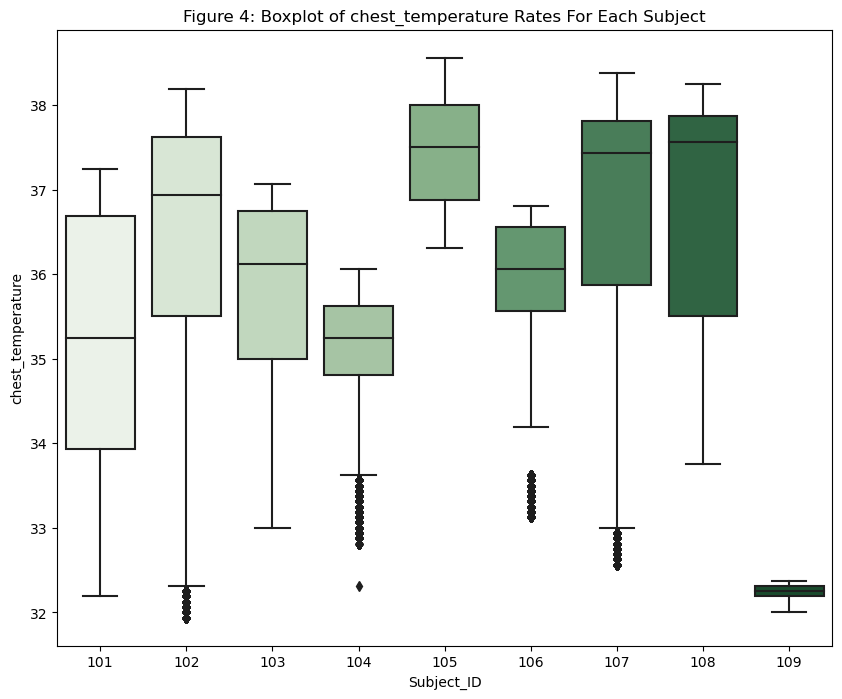

In [49]:
#box chart
plt.figure(figsize=(10,8))
sns.boxplot(x='Subject_ID',y='chest_temperature',data=df_master,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 4: Boxplot of chest_temperature Rates For Each Subject");

Figure 4 : The box plot represents the distribution of chest temperature for each subject ID, highlighting its median, quartiles, and outliers. The 'box' shows the interquartile range (IQR) where the middle 50% of values lie, and the 'whiskers' extend to show the range of the data. Observe the spread of the data and potential outliers, which are points that lie outside the whiskers.

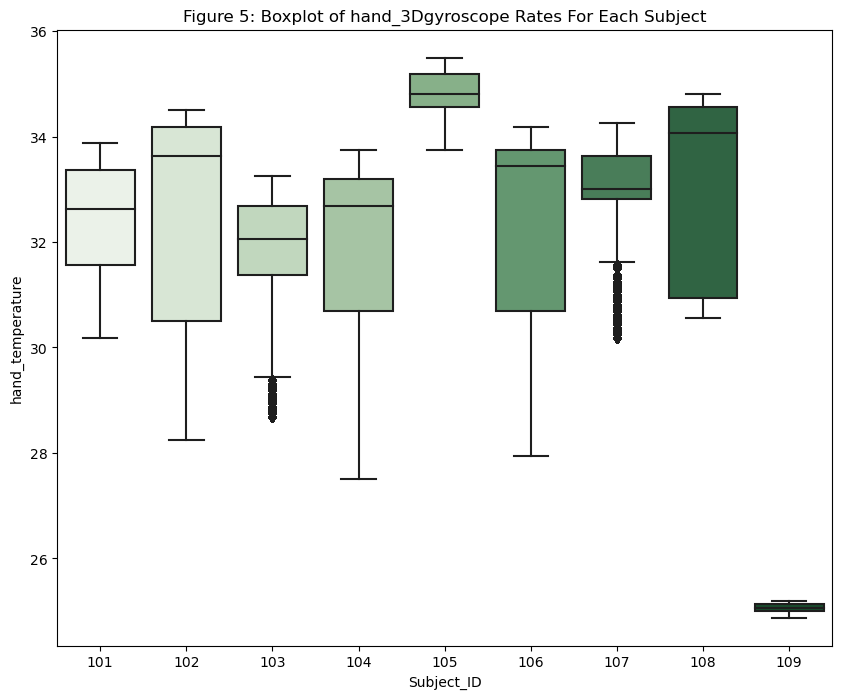

In [50]:
#box chart
plt.figure(figsize=(10,8))
sns.boxplot(x='Subject_ID',y='hand_temperature',data=df_master,palette='Greens',saturation=0.5,
            whis=1.5).set_title("Figure 5: Boxplot of hand_3Dgyroscope Rates For Each Subject");

Figure 5 : The box plot represents the distribution of hand temperature for each subject ID, highlighting its median, quartiles, and outliers. The 'box' shows the interquartile range (IQR) where the middle 50% of values lie, and the 'whiskers' extend to show the range of the data. Observe the spread of the data and potential outliers, which are points that lie outside the whiskers.

From the box plots, it is evident that Subject 109 stands out as an exception, exhibiting a very small range in heart rate, had temperature, and chest temperature. This is attributed to the limited participation in different activities, as only 5 activities were completed. Consequently, the variation associated with engaging in a broader range of activities is absent.

Subjects 103 and 105 show a noticeable positive skew in heart rate, while Subjects 107 and 108 exhibit a noticeable negative skew in chest temperature. Subjects 102, 106, and 108 also display a noticeable negative skew in chest temperature, potentially indicating their involvement in both active and sedentary activities.

C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


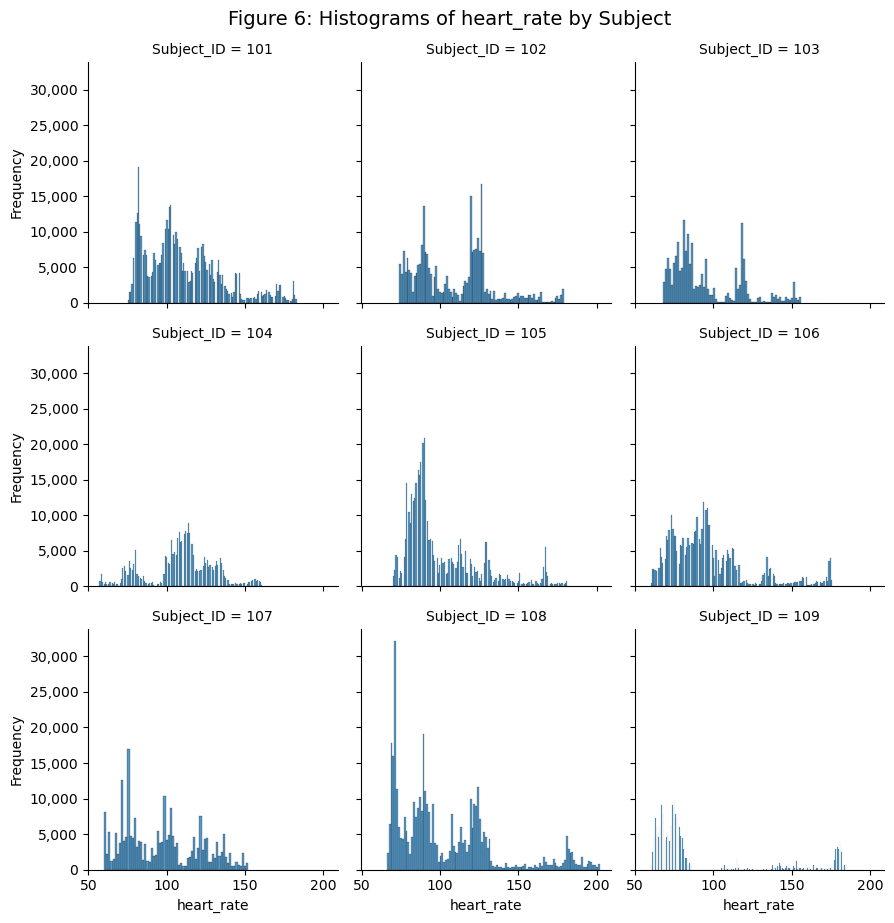

In [27]:
#histplot
g=sns.FacetGrid(df_master[['Subject_ID','heart_rate']],col='Subject_ID',col_wrap=3)
g.map(sns.histplot,"heart_rate");
g.set_axis_labels("heart_rate","Frequency")

g.fig.suptitle('Figure 6: Histograms of heart_rate by Subject',x=0.5,y=1.02,fontsize=14)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:,.0f}'.format(y)))

Figure 6 : This histogram displays the distribution of heart rate for each subject ID, showcasing how frequently different ranges of values occur. The shape of the distribution (e.g., bell-shaped, skewed, etc.) can provide insights into the nature of this variable.
Any significant peaks, gaps, or skewness which might indicate typical values, outliers, or biases in heart rate.

C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


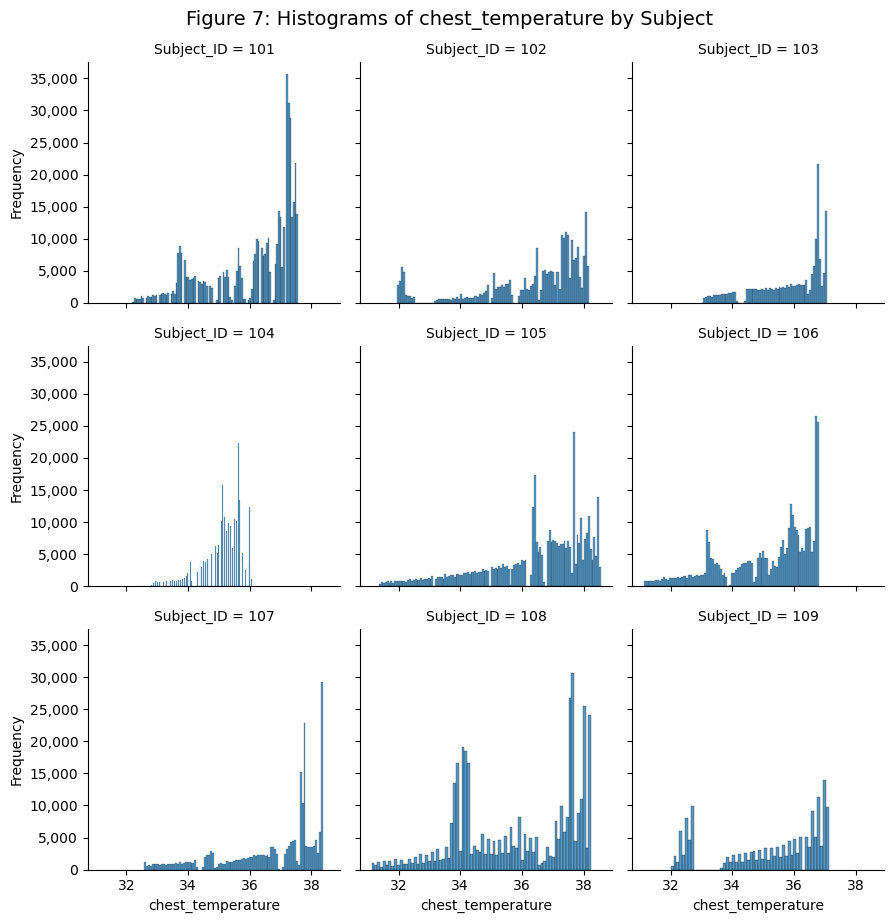

In [28]:
#histplot
g=sns.FacetGrid(df_master[['Subject_ID','chest_temperature']],col='Subject_ID',col_wrap=3)
g.map(sns.histplot,"chest_temperature");
g.set_axis_labels("chest_temperature","Frequency")

g.fig.suptitle('Figure 7: Histograms of chest_temperature by Subject',x=0.5,y=1.02,fontsize=14)

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:,.0f}'.format(y)))

Figure 7 : This histogram displays the distribution of chest_temperature for each subject ID, showcasing how frequently different ranges of values occur. The shape of the distribution (e.g., bell-shaped, skewed, etc.) can provide insights into the nature of this variable.
Any significant peaks, gaps, or skewness which might indicate typical values, outliers, or biases in chest_temperature.


In the analysis of the histogram plots, it is discernible that multiple peaks are evident for various individuals. Subjects 101, 102, 103, 104, and 108 exhibit a substantial number of timestamps corresponding to different heart rates, notably spaced apart. This observation suggests a potential dual heart rate pattern, where one level may represent restful or sedentary activities, while another, higher level may signify increased physical exertion during more active activities.

It is again evident that Subject 109 stands out as an exception, This is attributed to the limited participation in different activities

## Models


### temperature and chest temperature model
### Heart Rate and MET

##### Hypothesis Testing
For modeling and prediction I try diffrent featurs to get the better desion.
Is there any relation ship between hand_temperature and chest_temperature

First, I plotted the relationships between features, such as heart_rate and MET, hand_temperature and chest_temperature, hand_temperature and ankle_temperature, chest_temperature and ankle_temperature, and chest_temperature and activity_ID.

In this context, our focus on a single subject is aimed at expediting the process of obtaining answers. The goal is to explore whether there is a mathematical model that captures the relationship between two distinct features. We specifically selected 101 candidates due to their extensive participation in various activities.

After plotting, I decided to focus on the relationship between hand_temperature and chest_temperature. Following the modeling of some functions, I chose the function:
\begin{align*}
    f(x) = e^{-1.12(x-0.02)}
\end{align*}
For this type of prediction, a classification algorithm is required that does not demand a high degree of computational power. This can be achieved by utilizing a generalized linear regression method named Logistic Regression.

After plotting, I decided to focus on the relationship between heart Rate and MET. Following the modeling of some functions, I chose the function:
\begin{align*}
    f(x) = 0.74-0.05x
\end{align*}

But from the plot, it is evident that these models are not efficient

In [33]:
# drop Subject_ID=109
df_master=df_master.loc[df_master['Subject_ID']!=109]

In [34]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923273 entries, 0 to 2929658
Data columns (total 36 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Subject_ID                        int64  
 1   MET                               float64
 2   activity                          object 
 3   timestamp                         float64
 4   activity_ID                       int64  
 5   heart_rate                        float64
 6   hand_temperature                  float64
 7   hand±16gscale_13bitresolution_1   float64
 8   hand±16gscale_13bitresolution_2   float64
 9   hand±16gscale_13bitresolution_3   float64
 10  hand_3Dgyroscope_1                float64
 11  hand_3Dgyroscope_2                float64
 12  hand_3Dgyroscope_3                float64
 13  hand_3Dmagnetometer_1             float64
 14  hand_3Dmagnetometer_2             float64
 15  hand_3Dmagnetometer_3             float64
 16  chest_temperature                 float64

In [35]:
df_master.describe()

Subject_ID           MET     timestamp   activity_ID    heart_rate  \
count  2.923273e+06  2.923273e+06  2.923273e+06  2.923273e+06  2.923273e+06   
mean   1.047052e+02  3.610100e+00  1.713136e+03  8.022229e+00  1.079797e+02   
std    2.401515e+00  2.130275e+00  1.086730e+03  6.091342e+00  2.698331e+01   
min    1.010000e+02  1.000000e+00  3.766000e+01  1.000000e+00  5.800000e+01   
25%    1.020000e+02  1.800000e+00  7.497800e+02  3.000000e+00  8.700000e+01   
50%    1.050000e+02  3.500000e+00  1.490950e+03  6.000000e+00  1.050000e+02   
75%    1.070000e+02  4.000000e+00  2.686900e+03  1.300000e+01  1.240000e+02   
max    1.080000e+02  9.000000e+00  4.245680e+03  2.400000e+01  1.880000e+02   

       hand_temperature  hand±16gscale_13bitresolution_1  \
count      2.923273e+06                     2.923273e+06   
mean       3.294267e+01                    -4.843287e+00   
std        1.743301e+00                     6.407755e+00   
min        2.750000e+01                    -1.453670e+02   
25%        3.187500e+01                    -8.892150e+00   
50%        3.343750e+01                    -5.269900e+00   
75%        3.425000e+01                    -6.243580e-01   
max        3.550000e+01                     6.285960e+01   

       hand±16gscale_13bitresolution_2  hand±16gscale_13bitresolution_3  \
count                     2.923273e+06                     2.923273e+06   
mean                      3.418677e+00                     3.619526e+00   
std                       7.367657e+00                     3.951474e+00   
min                      -1.043010e+02                    -1.014520e+02   
25%                       4.692830e-01                     1.198570e+00   
50%                       3.444600e+00                     3.501020e+00   
75%                       6.559180e+00                     6.485730e+00   
max                       1.556990e+02                     1.411000e+02   

       hand_3Dgyroscope_1  ...  ankle_temperature  \
count        2.923273e+06  ...       2.923273e+06   
mean         2.377301e-03  ...       3.382440e+01   
std          1.315687e+00  ...       1.035233e+00   
min         -2.780440e+01  ...       3.000000e+01   
25%         -3.865080e-01  ...       3.318750e+01   
50%         -6.636430e-03  ...       3.412500e+01   
75%          3.371300e-01  ...       3.456250e+01   
max          2.641580e+01  ...       3.543750e+01   

       ankle±16gscale_13bitresolution_1  ankle±16gscale_13bitresolution_2  \
count                      2.923273e+06                      2.923273e+06   
mean                       9.388207e+00                     -9.178015e-02   
std                        6.593402e+00                      7.754074e+00   
min                       -1.468510e+02                     -1.574430e+02   
25%                        8.352600e+00                     -2.171660e+00   
50%                        9.514930e+00                     -2.749200e-01   
75%                        1.029270e+01                      1.889660e+00   
max                        1.572320e+02                      1.561900e+02   

       ankle±16gscale_13bitresolution_3  ankle_3Dgyroscope_1  \
count                      2.923273e+06         2.923273e+06   
mean                      -2.730368e+00         1.123913e-02   
std                        3.911675e+00         1.125302e+00   
min                       -1.589260e+02        -2.399500e+01   
25%                       -3.894150e+00        -1.976950e-01   
50%                       -2.545690e+00         5.159270e-03   
75%                       -1.187020e+00         1.406150e-01   
max                        1.567300e+02         1.644270e+01   

       ankle_3Dgyroscope_2  ankle_3Dgyroscope_3  ankle_3Dmagnetometer_1  \
count         2.923273e+06         2.923273e+06            2.923273e+06   
mean         -3.030279e-02         2.316047e-03           -3.288836e+01   
std           6.393953e-01         2.031498e+00            1.892440e+01   
min          -1.812690e+01     

In [36]:
df_master.head(5)

Subject_ID  MET activity  timestamp  activity_ID  heart_rate  \
0         101  1.0    lying      37.66            1       100.0   
1         101  1.0    lying      37.67            1       100.0   
2         101  1.0    lying      37.68            1       100.0   
3         101  1.0    lying      37.69            1       100.0   
4         101  1.0    lying      37.70            1       100.0   

   hand_temperature  hand±16gscale_13bitresolution_1  \
0            30.375                          2.21530   
1            30.375                          2.29196   
2            30.375                          2.29090   
3            30.375                          2.21800   
4            30.375                          2.30106   

   hand±16gscale_13bitresolution_2  hand±16gscale_13bitresolution_3  ...  \
0                          8.27915                          5.58753  ...   
1                          7.67288                          5.74467  ...   
2                          7.14240                          5.82342  ...   
3                          7.14365                          5.89930  ...   
4                          7.25857                          6.09259  ...   

   ankle_temperature  ankle±16gscale_13bitresolution_1  \
0              30.75                           9.73855   
1              30.75                           9.69762   
2              30.75                           9.69633   
3              30.75                           9.66370   
4              30.75                           9.77578   

   ankle±16gscale_13bitresolution_2  ankle±16gscale_13bitresolution_3  \
0                          -1.84761                          0.095156   
1                          -1.88438                         -0.020804   
2                          -1.92203                         -0.059173   
3                          -1.84714                          0.094385   
4                          -1.88582                          0.095775   

   ankle_3Dgyroscope_1  ankle_3Dgyroscope_2  ankle_3Dgyroscope_3  \
0             0.002908            -0.027714             0.001752   
1             0.020882             0.000945             0.006007   
2            -0.035392            -0.052422            -0.004882   
3            -0.032514            -0.018844             0.026950   
4             0.001351            -0.048878            -0.006328   

   ankle_3Dmagnetometer_1  ankle_3Dmagnetometer_2  ankle_3Dmagnetometer_3  
0                -61.1081                -36.8636                -58.3696  
1                -60.8916                -36.3197                -58.3656  
2                -60.3407                -35.7842                -58.6119  
3                -60.7646                -37.1028                -57.8799  
4                -60.2040                -37.1225                -57.8847  

[5 rows x 36 columns]

In [105]:
#plot
def box_hist_plot3(df,col,axes=None,title=None,hist=True):
    values = df[df[col].notna()][col].values
    
    if axes is None:
        fig, axes = plt.subplots(nrows=1,ncols=1,sharey=True)
        fig.set_figwidth(fig.get_figwidth() * 1.0)
        
    if title is None:
        title = col

    if hist:
        sns.histplot(data=df,ax=axes,y=col,stat="density")
        sns.kdeplot(data=df,y=col,ax=axes,color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))
    else:
        vals, counts = np.unique(values,return_counts=True)

        axes.barh(vals,counts/sum(counts))
        axes.set_xlabel("Density")
        
    mean = np.mean(values)
    median = np.median(values)
    axes.axhline(mean,ls="dashed",color="r")
    axes.axhline(median,ls="dashed",color="g")


    axes.set_ylabel(col)

    axes.set_title(f"{title}: n = {len(values)} mean = {mean:.4f}, median = {median:.4f}")


In [106]:
cols = df_master.columns

In [77]:
hist_plots = ["hand_temperature", "chest_temperature", "ankle_temperature", "heart_rate"]

In [37]:
#insert active_or_sedentary columns 
activity_MET_dict={'lying':1,'sitting':1.8,'standing':1.8,'walking':3.55,'running':7.5,'cycling':4,'Nordic walking':5.5,'watching TV':1,'computer work':1.8,'car driving':1.8,'ascending stairs':8,'descending stairs':3,'vacuum cleaning':3.5,'ironing':2.3,'folding laundry':2.3,'house cleaning':3.5,'playing soccer':7.5,'rope jumping':9}

MET_df=pd.DataFrame.from_dict(activity_MET_dict,orient='index',columns=["MET"])
MET_df.reset_index(inplace=True)
MET_df.columns=['activity','MET']

# separating 'active' and 'sedentary'
active_activities=list(itertools.chain.from_iterable(MET_df.loc[MET_df['MET']>3,["activity"]].values.tolist()))
sedentary_activities=list(itertools.chain.from_iterable(MET_df.loc[MET_df['MET']<=3,["activity"]].values.tolist()))

df_master.insert(loc=2,column='active_or_sedentary',value= ['active' if x >3 else 'sedentary' for x in df_master['MET']])

In [93]:
df_master.tail(5)

Subject_ID  Sex active_or_sedentary  MET      activity  Age_(years)  \
4401539         109    1              active  9.0  rope jumping           31   
4401540         109    1              active  9.0  rope jumping           31   
4401541         109    1              active  9.0  rope jumping           31   
4401542         109    1              active  9.0  rope jumping           31   
4401543         109    1              active  9.0  rope jumping           31   

         Height_(cm)  Weight_(kg)  Resting_HR  Max_HR  ...  ankle_temperature  \
4401539          168           65          54     189  ...               31.5   
4401540          168           65          54     189  ...               31.5   
4401541          168           65          54     189  ...               31.5   
4401542          168           65          54     189  ...               31.5   
4401543          168           65          54     189  ...               31.5   

         ankle±16gscale_13bitresolution_1  ankle±16gscale_13bitresolution_2  \
4401539                           9.40998                          -2.35888   
4401540                           9.40727                          -2.24401   
4401541                           9.36745                          -2.28110   
4401542                           9.36765                          -2.24313   
4401543                           9.44470                          -2.24425   

         ankle±16gscale_13bitresolution_3  ankle_3Dgyroscope_1  \
4401539                          -2.14324            -0.012177   
4401540                          -2.25974             0.021288   
4401541                          -2.33710             0.010715   
4401542                          -2.33734            -0.016939   
4401543                          -2.25936            -0.028069   

         ankle_3Dgyroscope_2  ankle_3Dgyroscope_3  ankle_3Dmagnetometer_1  \
4401539            -0.015535            -0.046225                -45.6491   
4401540            -0.012885             0.005878                -45.7855   
4401541             0.003629            -0.004235                -46.0331   
4401542            -0.035176            -0.002309                -45.5140   
4401543            -0.036457            -0.007076                -45.9093   

         ankle_3Dmagnetometer_2  ankle_3Dmagnetometer_3  
4401539               -1.095180                0.114311  
4401540               -0.831734               -0.170139  
4401541               -0.817288                0.538134  
4401542               -1.229410                0.540438  
4401543               -0.565555                0.680109  

[5 rows x 43 columns]

In [73]:
pd.unique(df_master.active_or_sedentary)
df_master.active_or_sedentary.value_counts()


active_or_sedentary
sedentary    1455810
active       1245193
Name: count, dtype: int64

In [76]:
df_master.active_or_sedentary.head(5)


2928    sedentary
2929    sedentary
2930    sedentary
2931    sedentary
2932    sedentary
Name: active_or_sedentary, dtype: object

In [78]:
missing_active_or_sedentary=(df_master.active_or_sedentary).isna().sum()
print("There are " + f'{missing_active_or_sedentary:,.0f}' + " active_or_sedentary records due to difference in frequency.")

There are 0 active_or_sedentary records due to difference in frequency.


In [79]:
missing_heart_rate=(df_master.heart_rate.isna()).sum()
print("There are " + f'{missing_heart_rate:,.0f}' + " heart_rate records due to difference in frequency.")

There are 0 heart_rate records due to difference in frequency.


In [80]:
missing_Subject_ID=(df_master.Subject_ID.isna()).sum()
print("There are " + f'{missing_Subject_ID:,.0f}' + " Subject_ID records due to difference in frequency.")

There are 0 Subject_ID records due to difference in frequency.


In [45]:

dfn = copy.deepcopy(df_master)

In [46]:
dfn["active_or_sedentary"] = df_master.active_or_sedentary.apply(lambda x : 0 if x == "sedentary" else 1)

In [47]:
dfsmall = dfn.loc[(dfn['Subject_ID'] == 101) | (dfn['Subject_ID'] == 108) | (dfn['Subject_ID'] == 105)]

In [48]:
df101 = df_master.loc[df_master['Subject_ID']==101]

In [49]:
#remove Null
nun = df101[df101["heart_rate"].isnull()].index

df101.drop(nun,inplace=True)
 
df101.reset_index(drop=True,inplace=True)

C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\2950529223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101.drop(nun,inplace=True)


In [50]:
#remove Null
nun = df101[df101["chest_temperature"].isnull()].index
nun2 = df101[df101["hand_temperature"].isnull()].index
nun3 = df101[df101["ankle_temperature"].isnull()].index
df101.drop(nun,inplace=True)
df101.drop(nun2,inplace=True)
df101.drop(nun3,inplace=True)
df101.reset_index(drop=True,inplace=True)

C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\3035179289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101.drop(nun,inplace=True)
C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\3035179289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101.drop(nun2,inplace=True)
C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\3035179289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101.drop(nun3,inplace=True)


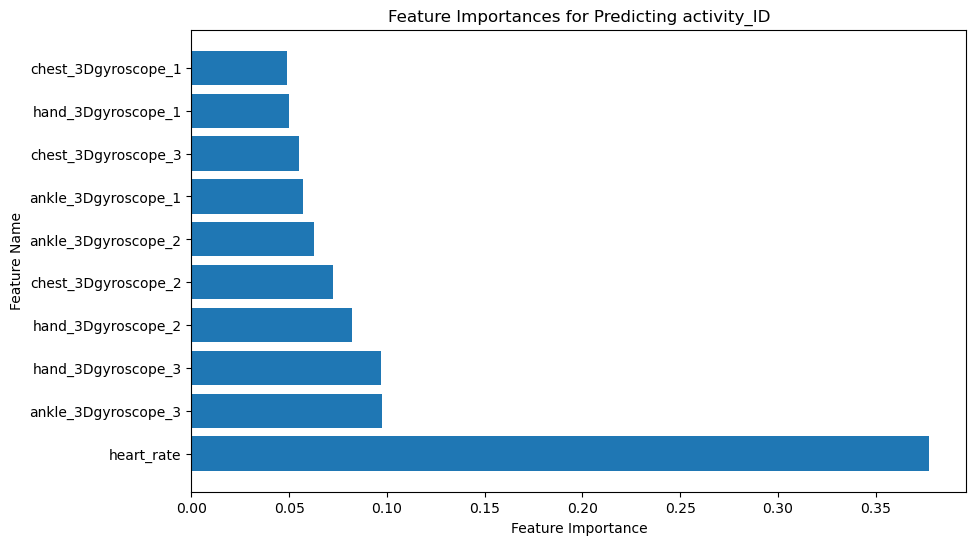

In [113]:
column_headers = df.columns.tolist()
feature_importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(explanatory_vars, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
# Plot Feature Importance
features, importances = zip(*sorted_feature_importance)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align="center")
plt.yticks(range(len(features)), features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances for Predicting activity_ID")
plt.show()


Text(0.5, 1.0, 'Scatterplot of dataset_1')

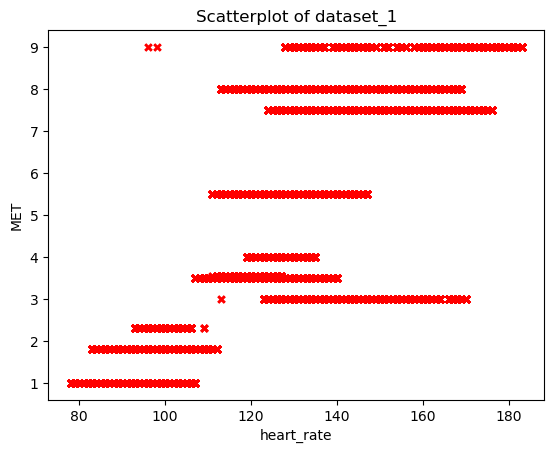

In [114]:
fig,ax = plt.subplots(nrows=1,ncols=1)
df101.plot(kind="scatter",x="heart_rate",y="MET",color="r",marker="x",ax=ax)
ax.set_title("Scatterplot of dataset_1")

(30.0, 40.0)

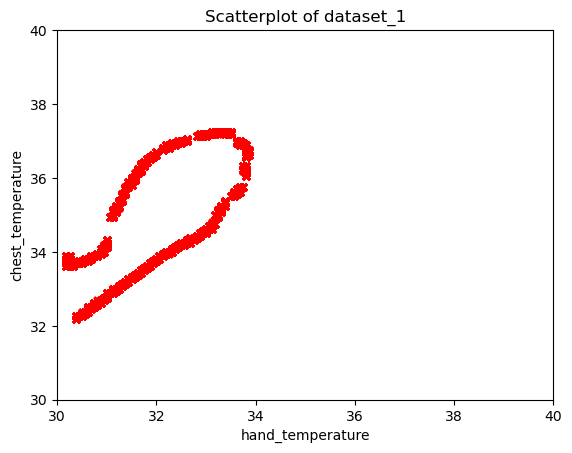

In [115]:
fig,ax = plt.subplots(nrows=1,ncols=1)
df101.plot(kind="scatter",x="hand_temperature",y="chest_temperature",color="r",marker="x",ax=ax)
ax.set_title("Scatterplot of dataset_1")
ax.set_xlim(30, 40)
ax.set_ylim(30, 40)

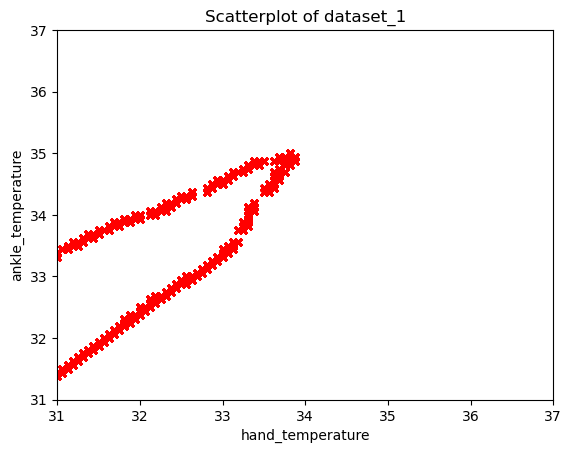

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df101.plot(kind="scatter", x="hand_temperature", y="ankle_temperature", color="r", marker="x", ax=ax)
ax.set_title("Scatterplot of dataset_1")
ax.set_xlim(31, 37)
ax.set_ylim(31, 37)

plt.show()

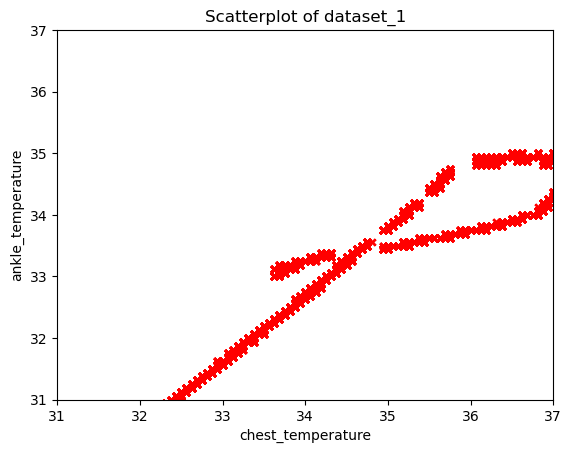

In [118]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def f1(x,c0,c1,c2):
    return c0*np.exp(-c1*(x-c2))

def f2(x,c0,c1,c2):
    return c0 + c1 * x + c2 * (x**2.0) 

def f3(x,c0,c1,c2,c3):
    return c0 + c1 * x + c2 * (x**2.0) + c3 * (x**3.0)
def least_squares_AIC(k, n, eps):
    return 2.0*k + n * np.log(2.0*np.pi*(eps ** 2.0)) + n

def calc_AIC(residuals,popt):
    RSS = np.sum(residuals**2.0)
    n = len(residuals)
    eps = RSS/n
    k = len(popt)
    return least_squares_AIC(k,n,eps)
def sum_square_residual(theta,y,x,f):
    fi = f(x,*theta)
    return np.sum((y - fi)**2.0)

def bootstrap_prediction_interval(predictor, x_samples, y_samples, f, n_bootstraps=1000, alpha=0.05):
    bootstrap_response = np.zeros(n_bootstraps)
    bootstrap_residuals = []
    for idx in range(n_bootstraps):
        bootstrap_idx = np.random.randint(0,len(x_samples),len(x_samples))
        not_bootstrap_idx = np.array([i for i in range(len(x_samples)) if not (i in bootstrap_idx)])
        x_bootstrap = x_samples[bootstrap_idx]
        y_bootstrap = y_samples[bootstrap_idx]
        x_not_bootstrap = x_samples[not_bootstrap_idx]
        y_not_bootstrap = y_samples[not_bootstrap_idx]
        
        bootstrap_opt, _ = curve_fit(f,x_bootstrap,y_bootstrap)
        bootstrap_response[idx] = f(predictor,*bootstrap_opt)
        bootstrap_residuals.append(y_not_bootstrap - f(x_not_bootstrap,*bootstrap_opt))
    
    bootstrap_residuals = np.concatenate(bootstrap_residuals)
    
    C = np.array([m + o for m in bootstrap_response for o in bootstrap_residuals])
    
    return bootstrap_response, np.percentile(C,100.0*alpha/2.0), np.percentile(C,100.0*(1.0 - alpha/2.0))

C:\Users\spin 3\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


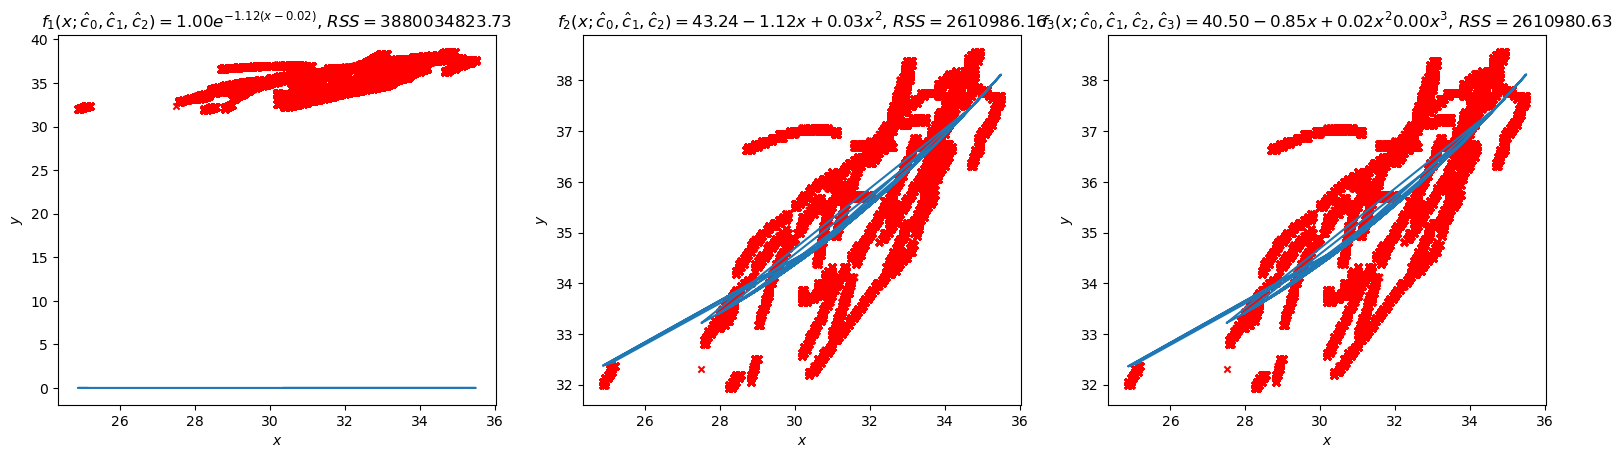

In [56]:


#Get the least squares estimators for each of the functions

df1 = dfsmall
f1_popt,_ = curve_fit(f1,df1["hand_temperature"],df1["chest_temperature"])
f2_popt,_ = curve_fit(f2,df1["hand_temperature"],df1["chest_temperature"])
f3_popt,_ = curve_fit(f3,df1["hand_temperature"],df1["chest_temperature"])
#Calculate the RSS for each function
f1_RSS = sum_square_residual(f1_popt,df1["chest_temperature"],df1["hand_temperature"],f1)
f2_RSS = sum_square_residual(f2_popt,df1["chest_temperature"],df1["hand_temperature"],f2)
f3_RSS = sum_square_residual(f3_popt,df1["chest_temperature"],df1["hand_temperature"],f3)

fig, axes = plt.subplots(nrows=1,ncols=3)

df1.plot(kind="scatter",x="hand_temperature",y="chest_temperature",color="r",marker="x",ax=axes[0])
axes[0].plot(df1["hand_temperature"],f1(df1["hand_temperature"],*f1_popt))
axes[0].set_title(rf"$f_1(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2) = {f1_popt[0]:.2f}  e^{{{f2_popt[1]:.2f}(x - {f3_popt[2]:.2f})}}$, $RSS = {f1_RSS:.2f}$")

df1.plot(kind="scatter",x="hand_temperature",y="chest_temperature",color="r",marker="x",ax=axes[1])
axes[1].plot(df1["hand_temperature"],f2(df1["hand_temperature"],*f2_popt))
axes[1].set_title(rf"$f_2(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2) = {f2_popt[0]:.2f} {f2_popt[1]:.2f} x + {f2_popt[2]:.2f} x^2$, $RSS = {f2_RSS:.2f}$")

df1.plot(kind="scatter",x="hand_temperature",y="chest_temperature",color="r",marker="x",ax=axes[2])
axes[2].plot(df1["hand_temperature"],f3(df1["hand_temperature"],*f3_popt))
axes[2].set_title(rf"$f_3(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2, \hat{{c}}_3) = {f3_popt[0]:.2f} {f3_popt[1]:.2f} x + {f3_popt[2]:.2f} x^2 {f3_popt[3]:.2f} x^3$, $RSS = {f3_RSS:.2f}$")

for ax in axes:
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")

fig.set_figwidth(fig.get_figwidth()*3.0)

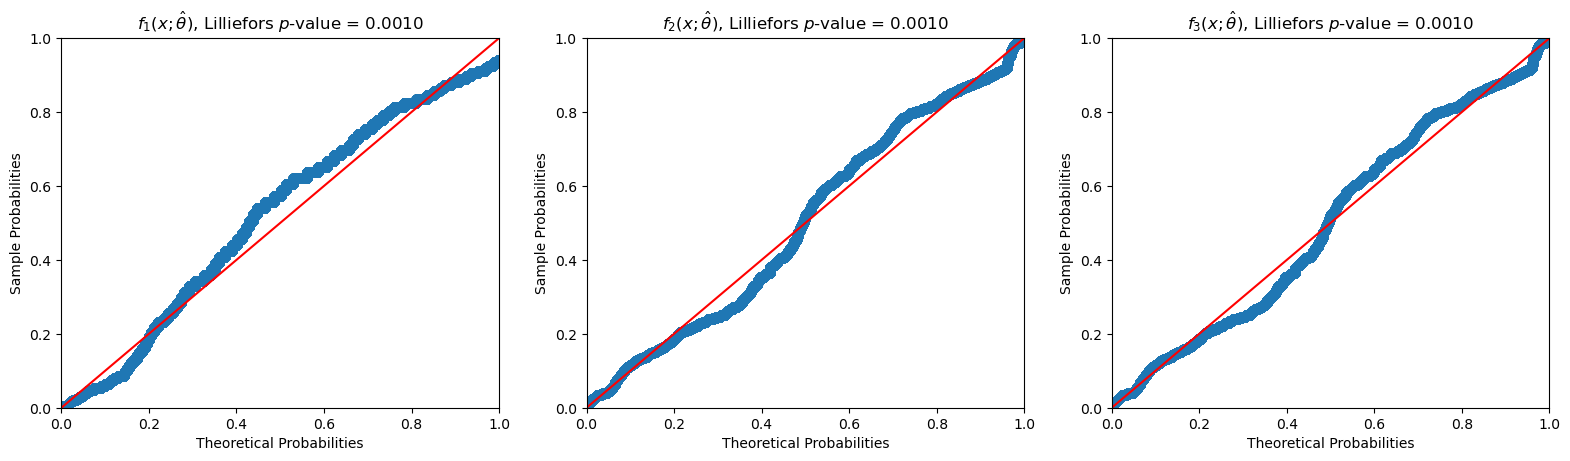

In [57]:

import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors

fig, axes = plt.subplots(nrows=1,ncols=3)

f1_residual = df1["chest_temperature"] - f1(df1["hand_temperature"],*f1_popt)
pp = sm.ProbPlot(f1_residual, dist=norm, fit=True)
pp.ppplot(line="45",ax=axes[0])
_, p_quad = lilliefors(f1_residual)
axes[0].set_title(rf"$f_1(x; \hat{{\theta}})$, Lilliefors $p$-value = {p_quad:.4f}")

f2_residual = df1["chest_temperature"] - f2(df1["hand_temperature"],*f2_popt)
pp = sm.ProbPlot(f2_residual, dist=norm, fit=True)
pp.ppplot(line="45",ax=axes[1])
_, p_quad = lilliefors(f2_residual)
axes[1].set_title(rf"$f_2(x; \hat{{\theta}})$, Lilliefors $p$-value = {p_quad:.4f}")

f3_residual = df1["chest_temperature"] - f3(df1["hand_temperature"],*f3_popt)
pp = sm.ProbPlot(f3_residual, dist=norm, fit=True)
pp.ppplot(line="45",ax=axes[2])
_, p_quad = lilliefors(f3_residual)
axes[2].set_title(rf"$f_3(x; \hat{{\theta}})$, Lilliefors $p$-value = {p_quad:.4f}")

fig.set_figwidth(fig.get_figwidth()*3.0)


In [58]:
AICs = []
for r,popt in zip([f1_residual, f2_residual,f3_residual],[f1_popt, f2_popt,f3_popt]):
    AICs.append(calc_AIC(r,popt))
    
print(AICs)

[50769106.83499566, 7652454.845954544, 7652444.335076543]


$f_1$ is the best fit as it has the smallest AIC.



In [ ]:
#it takes more than 2 hours to play so it was too long to show
new_x = np.linspace(np.floor(df1["hand_temperature"].min()), np.ceil(df1["hand_temperature"].max()))
lb = np.zeros_like(new_x)
ub = np.zeros_like(new_x)

alpha=0.05

#this will take about 1min20s
for idx, x in enumerate(new_x):
    _, lb[idx],ub[idx] = bootstrap_prediction_interval(x,df1["hand_temperature"].to_numpy(),df1["chest_temperature"].to_numpy(),f1,alpha=alpha)

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(new_x,f1(new_x,*f1_popt),c="k",lw=2)
ax.fill_between(new_x,lb,ub,color="darkgray",label="bootstrap")
ax.scatter(df1["hand_temperature"],df1["chest_temperature"],marker="x",color="r")
ax.legend(loc="best")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title(r"Bootstrapped prediction interval for $f_1(x;\theta)$")
new_x2 = np.linspace(3, 5,30)
lb2 = np.zeros_like(new_x2)
ub2 = np.zeros_like(new_x2)



C:\Users\spin 3\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


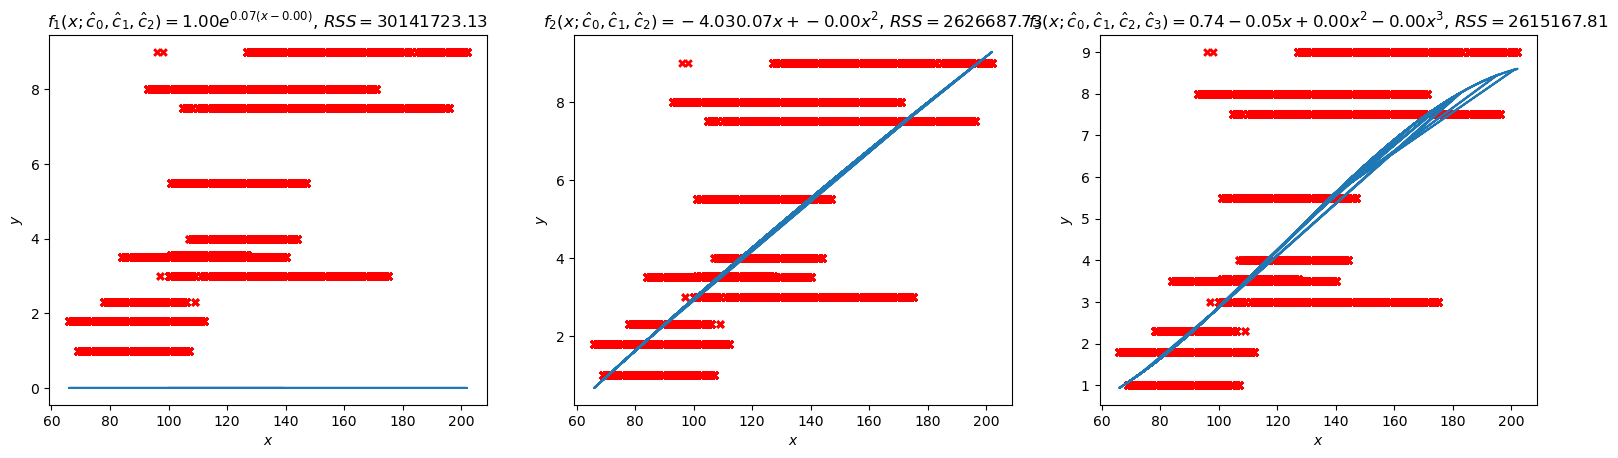

In [122]:

df1 = dfsmall
f1_popt,_ = curve_fit(f1,df1["heart_rate"],df1["MET"])
f2_popt,_ = curve_fit(f2,df1["heart_rate"],df1["MET"])
f3_popt,_ = curve_fit(f3,df1["heart_rate"],df1["MET"])
#Calculate the RSS for each function
f1_RSS = sum_square_residual(f1_popt,df1["MET"],df1["heart_rate"],f1)
f2_RSS = sum_square_residual(f2_popt,df1["MET"],df1["heart_rate"],f2)
f3_RSS = sum_square_residual(f3_popt,df1["MET"],df1["heart_rate"],f3)

fig, axes = plt.subplots(nrows=1,ncols=3)

df1.plot(kind="scatter",x="heart_rate",y="MET",color="r",marker="x",ax=axes[0])
axes[0].plot(df1["heart_rate"],f1(df1["heart_rate"],*f1_popt))
axes[0].set_title(rf"$f_1(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2) = {f1_popt[0]:.2f}  e^{{{f2_popt[1]:.2f}(x - {f3_popt[2]:.2f})}}$, $RSS = {f1_RSS:.2f}$")

df1.plot(kind="scatter",x="heart_rate",y="MET",color="r",marker="x",ax=axes[1])
axes[1].plot(df1["heart_rate"],f2(df1["heart_rate"],*f2_popt))
axes[1].set_title(rf"$f_2(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2) = {f2_popt[0]:.2f} {f2_popt[1]:.2f} x + {f2_popt[2]:.2f} x^2$, $RSS = {f2_RSS:.2f}$")

df1.plot(kind="scatter",x="heart_rate",y="MET",color="r",marker="x",ax=axes[2])
axes[2].plot(df1["heart_rate"],f3(df1["heart_rate"],*f3_popt))
axes[2].set_title(rf"$f_3(x; \hat{{c}}_0, \hat{{c}}_1, \hat{{c}}_2, \hat{{c}}_3) = {f3_popt[0]:.2f} {f3_popt[1]:.2f} x + {f3_popt[2]:.2f} x^2 {f3_popt[3]:.2f} x^3$, $RSS = {f3_RSS:.2f}$")

for ax in axes:
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")

fig.set_figwidth(fig.get_figwidth()*3.0)

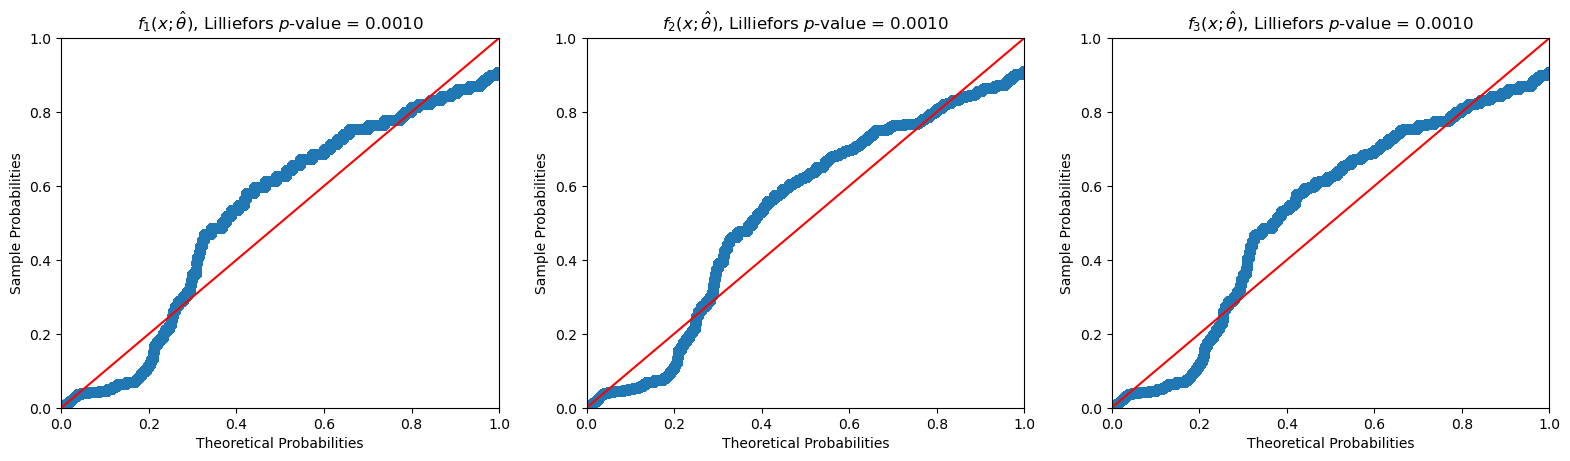

In [123]:

import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors

fig, axes = plt.subplots(nrows=1,ncols=3)

f1_residual = df1["chest_temperature"] - f1(df1["hand_temperature"],*f1_popt)
pp = sm.ProbPlot(f1_residual, dist=norm, fit=True)
pp.ppplot(line="45",ax=axes[0])
_, p_quad = lilliefors(f1_residual)
axes[0].set_title(rf"$f_1(x; \hat{{\theta}})$, Lilliefors $p$-value = {p_quad:.4f}")

f2_residual = df1["chest_temperature"] - f2(df1["hand_temperature"],*f2_popt)
pp = sm.ProbPlot(f2_residual, dist=norm, fit=True)
pp.ppplot(line="45",ax=axes[1])
_, p_quad = lilliefors(f2_residual)
axes[1].set_title(rf"$f_2(x; \hat{{\theta}})$, Lilliefors $p$-value = {p_quad:.4f}")

f3_residual = df1["chest_temperature"] - f3(df1["hand_temperature"],*f3_popt)
pp = sm.ProbPlot(f3_residual, dist=norm, fit=True)
pp.ppplot(line="45",ax=axes[2])
_, p_quad = lilliefors(f3_residual)
axes[2].set_title(rf"$f_3(x; \hat{{\theta}})$, Lilliefors $p$-value = {p_quad:.4f}")

fig.set_figwidth(fig.get_figwidth()*3.0)


In [124]:
AICs = []
for r,popt in zip([f1_residual, f2_residual,f3_residual],[f1_popt, f2_popt,f3_popt]):
    AICs.append(calc_AIC(r,popt))
    
print(AICs)

[26731896.3587888, 26997521.051345658, 26721835.163074836]


𝑓3
  is the best fit as it has the smallest AIC.

In [ ]:
#it takes more than 2 hours to play so it was too long to show
new_x = np.linspace(np.floor(df1["hand_temperature"].min()), np.ceil(df1["hand_temperature"].max()))
lb = np.zeros_like(new_x)
ub = np.zeros_like(new_x)

alpha=0.05

#this will take about 1min20s
for idx, x in enumerate(new_x):
    _, lb[idx],ub[idx] = bootstrap_prediction_interval(x,df1["hand_temperature"].to_numpy(),df1["chest_temperature"].to_numpy(),f1,alpha=alpha)

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(new_x,f3(new_x,*f3_popt),c="k",lw=2)
ax.fill_between(new_x,lb,ub,color="darkgray",label="bootstrap")
ax.scatter(df1["hand_temperature"],df1["chest_temperature"],marker="x",color="r")
ax.legend(loc="best")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title(r"Bootstrapped prediction interval for $f_1(x;\theta)$")
new_x2 = np.linspace(3, 5,30)
lb2 = np.zeros_like(new_x2)
ub2 = np.zeros_like(new_x2)



## activity_ID model

#### Hypothesis Testing

Can we predict the type of activity (activity_ID) based on physiological and motion sensor data?

we are going to test that can we Reasoning activity_ID by exploring heart_rate, hand_3Dgyroscope_1, hand_3Dgyroscope_2, hand_3Dgyroscope_3,chest_3Dgyroscope_1, chest_3Dgyroscope_2, chest_3Dgyroscope_3,ankle_3Dgyroscope_1, ankle_3Dgyroscope_2, ankle_3Dgyroscope_3

at firs i try ro find out the featurs that i can use for perdicting activity_ID
I use Heat map to ralize the rlationship between all of the featuers, 
K-Means Clustering to calculate Percentage of predictions that are correct
finally i choose heart_rate,hand_3Dgyroscope_1, hand_3Dgyroscope_2, hand_3Dgyroscope_3,chest_3Dgyroscope_1, chest_3Dgyroscope_2, chest_3Dgyroscope_3,ankle_3Dgyroscope_1, ankle_3Dgyroscope_2, ankle_3Dgyroscope_3 to peredict the best 
The result of predictive model was developed using the selected features, achieving the following performance metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99

A model accuracy of 0.99, or 99%, indicates that the model is performing very well on the test set. Specifically, it means that 99% of the predicted activity types match the actual activity types in the test set.The higher the accuracy, the better the model is at correctly predicting the target variable (in this case, activity_ID). An accuracy of 0.99 is generally considered excellent, suggesting that the model is making accurate predictions for the majority of instances in the test data. 
While a high accuracy is positive, it's important to consider other metrics, especially in the context of imbalanced datasets. For example, if certain activity types are rare, a high accuracy may be achieved by simply predicting the majority class. In such cases, precision, recall, and F1-score become important metrics to evaluate the model comprehensively.
ByExamining the confusion matrix we understand how well the model is performing for each class. This helps identify specific areas of improvement.Calculating precision, recall, and F1-score for each class we get a more nuanced understanding of the model's performance, especially in the presence of imbalanced classes.Exploring feature importance to understand which features contribute the most to the model's predictions.


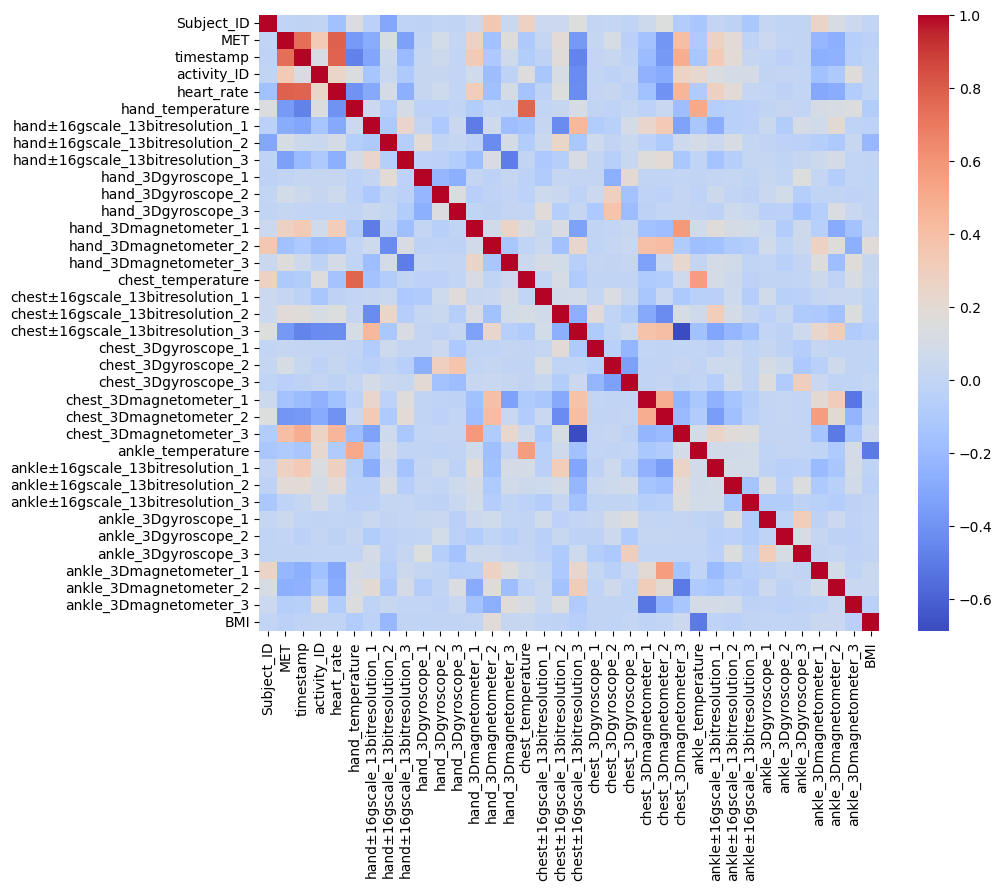

In [31]:
#heatmap
numerical_columns = df_master.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_master[numerical_columns].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.show()

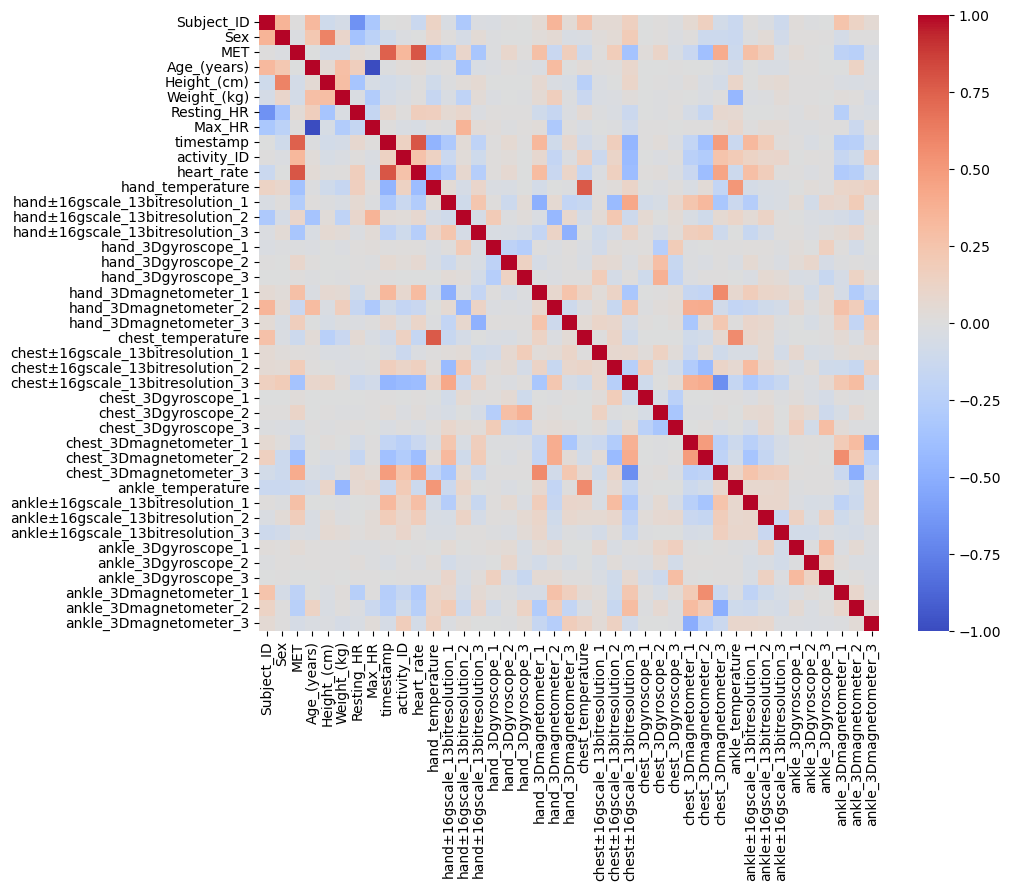

In [42]:
#heatmap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.show()

The heatmap shows the correlation between different variables. Each cell in the grid shows the strength of the relationship between two variables, often indicated by color intensity.
Look for darker or lighter cells which indicate stronger correlations, either positive or negative.

C:\Users\spin 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\spin 3\AppData\Local\Temp\ipykernel_19404\620031061.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df101["Predicted_Cluster"] = kmeans.predict(data)


"Cluster" 0 : (78.0000, 112.7659)
"Cluster" 1 : (113.1171, 148.5853)
"Cluster" 2 : (148.9365, 183.0000)
Percentage of predictions that are correct: 0.00% (0/494416)


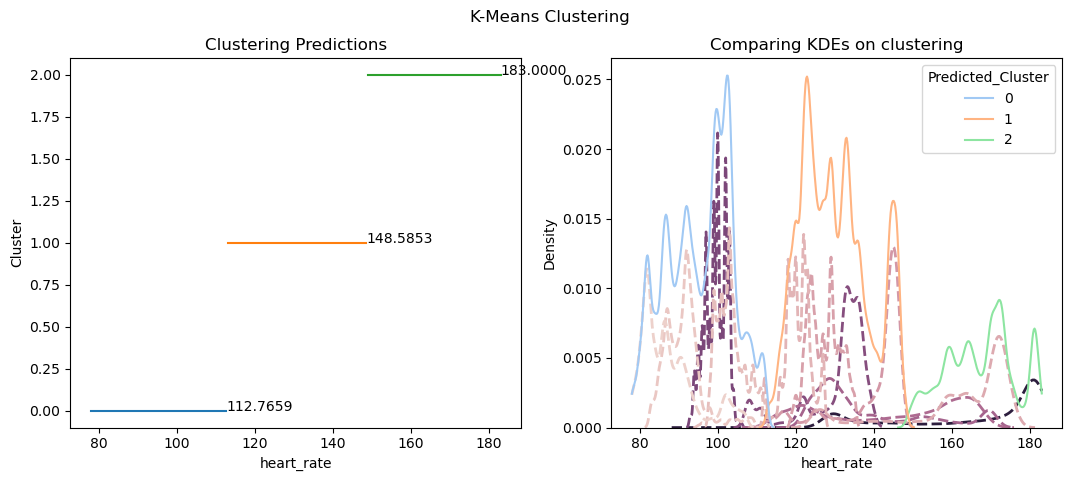

In [40]:


# Assuming df is your DataFrame with sensor data
col = "heart_rate"  
data = df101[col].to_numpy().reshape(-1, 1)

# Using K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3).fit(data)

# Sorting cluster centers
sort_idx = np.argsort(kmeans.cluster_centers_.flatten(), axis=0)
kmeans.cluster_centers_ = kmeans.cluster_centers_[sort_idx]

# Generating data points for plotting
x = np.linspace(df101[col].min(), df101[col].max(), 300)
cluster_predict = kmeans.predict(x.reshape(-1, 1))

# Plotting the clustering predictions
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)

clusters = []
for c in range(3):
    cluster_x = [xi if v == c else np.nan for (xi, v) in zip(x, cluster_predict)]
    cl_min = np.nanmin(cluster_x)
    cl_max = np.nanmax(cluster_x)
    clusters.append([cl_min, cl_max])
    axes[0].plot(cluster_x, np.ones(len(cluster_x)) * c)
    axes[0].annotate(f"{cl_max:.4f}", (cl_max + 0.05, c))

# Adding predicted cluster labels to the DataFrame
df101["Predicted_Cluster"] = kmeans.predict(data)

# Plotting KDEs for actual and predicted clusters
sns.kdeplot(data=df101, x=col, hue="activity_ID", ls="--", lw=2, clip=(x[0], x[-1]), ax=axes[1])
sns.kdeplot(data=df101, x=col, hue="Predicted_Cluster", palette="pastel", clip=(x[0], x[-1]), ax=axes[1])

axes[0].set_xlabel(col)
axes[0].set_ylabel("Cluster")
axes[0].set_title("Clustering Predictions")
axes[1].set_title("Comparing KDEs on clustering")

fig.suptitle("K-Means Clustering")

fig.set_figwidth(fig.get_figwidth() * 2.0)

for idx, cluster in enumerate(clusters):
    print(f"\"Cluster\" {idx} : ({cluster[0]:.4f}, {cluster[1]:.4f})")

num_correct = sum(df101['activity_ID'] == df101['Predicted_Cluster'])
total_samples = len(df101)
accuracy = 100.0 * num_correct / total_samples
print(f"Percentage of predictions that are correct: {accuracy:.2f}% ({num_correct}/{total_samples})")



In [41]:
# Per-class accuracy
for activity in df101['activity_ID'].unique():
    num_correct = sum((df101['activity_ID'] == activity) & (df101['Predicted_Cluster'] == activity))
    total_samples = sum(df101['activity_ID'] == activity)
    accuracy = 100.0 * num_correct / total_samples
    print(f"Percentage of {activity} predictions that are correct: {accuracy:.2f}% ({num_correct}/{total_samples})")


Percentage of 1 predictions that are correct: 0.00% (0/54358)
Percentage of 2 predictions that are correct: 0.00% (0/46930)
Percentage of 3 predictions that are correct: 0.00% (0/43186)
Percentage of 17 predictions that are correct: 0.00% (0/46986)
Percentage of 16 predictions that are correct: 0.00% (0/45750)
Percentage of 12 predictions that are correct: 0.00% (0/31750)
Percentage of 13 predictions that are correct: 0.00% (0/29784)
Percentage of 4 predictions that are correct: 0.00% (0/42766)
Percentage of 7 predictions that are correct: 0.00% (0/40106)
Percentage of 6 predictions that are correct: 0.00% (0/46984)
Percentage of 5 predictions that are correct: 0.00% (0/41368)
Percentage of 24 predictions that are correct: 0.00% (0/24448)


In [28]:
# Assuming df is your DataFrame with sensor data
# Define explanatory variables
explanatory_vars = ['heart_rate', 
                    
                    'hand_3Dgyroscope_1', 'hand_3Dgyroscope_2', 'hand_3Dgyroscope_3',
                    'chest_3Dgyroscope_1', 'chest_3Dgyroscope_2', 'chest_3Dgyroscope_3',
                    'ankle_3Dgyroscope_1', 'ankle_3Dgyroscope_2', 'ankle_3Dgyroscope_3']

# Define response variable
response_var = 'activity_ID'

# Create a new DataFrame with selected features
selected_data = df101[explanatory_vars + [response_var]]

# Drop rows with missing values
selected_data = selected_data.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    selected_data[explanatory_vars],
    selected_data[response_var],
    test_size=0.2,
    random_state=42
)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.99


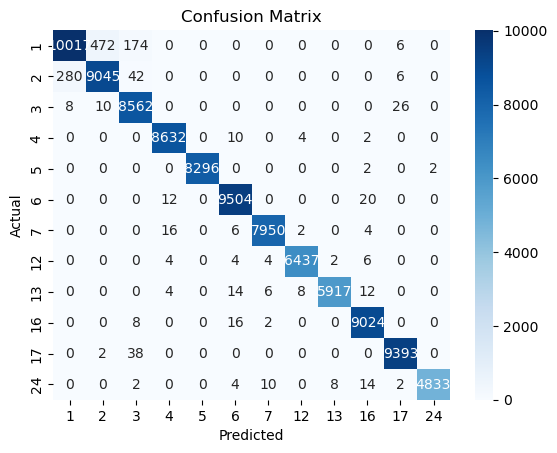

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.metrics import classification_report

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.94      0.96     10669
           2       0.95      0.97      0.96      9373
           3       0.97      0.99      0.98      8606
           4       1.00      1.00      1.00      8648
           5       1.00      1.00      1.00      8300
           6       0.99      1.00      1.00      9536
           7       1.00      1.00      1.00      7978
          12       1.00      1.00      1.00      6457
          13       1.00      0.99      1.00      5961
          16       0.99      1.00      1.00      9050
          17       1.00      1.00      1.00      9433
          24       1.00      0.99      1.00      4873

    accuracy                           0.99     98884
   macro avg       0.99      0.99      0.99     98884
weighted avg       0.99      0.99      0.99     98884



In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Model Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


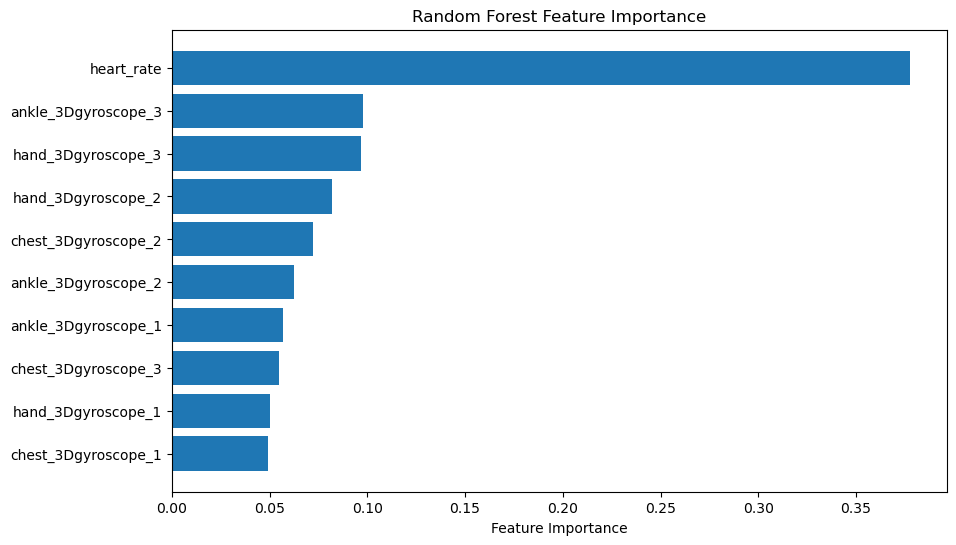

In [ ]:

# Feature Importance
feature_importance = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(explanatory_vars)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()




## Categorical variables & the data science process

#### Hypothesis Testing


I will test the impact of activity levels (active or sedentary) on the continuous features.

To conduct this hypothesis test, we divide our data into two separate dataframes: one for active participants and the other for sedentary participants If the MET of an activity is greater than 3, that activity will be classified into the active dataset; otherwise, it will be classified as sedentary. Due to the time-consuming nature of plotting, I have reduced the data size and included only subjects who participated more.

To assess the impact of activity levels on other features, I employ pair plots, box plots, histograms, and ECDF plots. In the histograms and box plots, I compare the density, mean, and median of features between the active and sedentary dataframes, allowing us to observe differences in these plots. Additionally, I generate separate ECDF plots for features in the active and sedentary dataframes to highlight distinctions.

To validate the rejection of the hypothesis, I use the Kolmogorov-Smirnov (K-S) test and Lilliefors test. The results are then printed.

C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


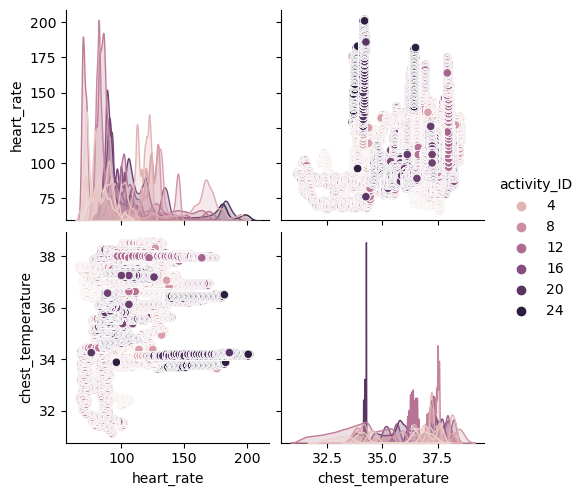

In [102]:
sns.pairplot(data=dfsmall,hue="activity_ID",vars=["heart_rate","chest_temperature"])

C:\Users\spin 3\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


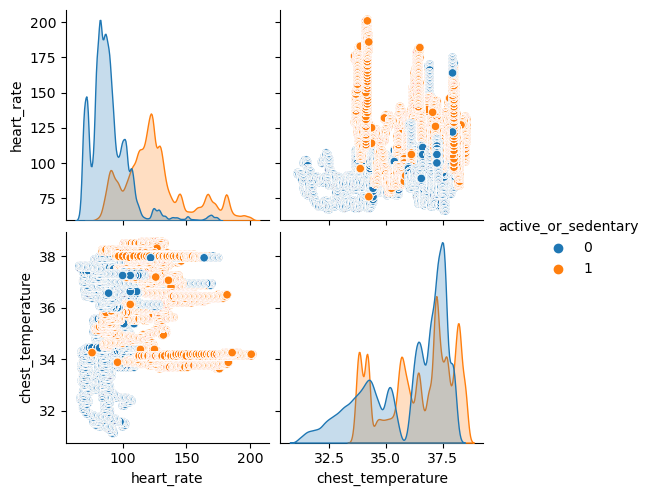

In [108]:

sns.pairplot(data=dfsmall,hue="active_or_sedentary",vars=["heart_rate","chest_temperature"])

In [51]:
active_df = dfsmall[dfsmall.active_or_sedentary == 1]
sedentary_df = dfsmall[dfsmall.active_or_sedentary == 0]

In [52]:
pd.unique(dfsmall.active_or_sedentary)
dfsmall.active_or_sedentary.value_counts()

active_or_sedentary
1    849874
0    686708
Name: count, dtype: int64

In [78]:
cols3 = dfsmall.columns


bar_plots3 = [c for c in cols3 if (c not in hist_plots) and (c != "MET") and (c != "activity") and (c != "hand±16gscale_13bitresolution_2") and (c != "hand±16gscale_13bitresolution_3") and (c != "chest±16gscale_13bitresolution_2") and (c != "chest±16gscale_13bitresolution_3") and (c != "ankle±16gscale_13bitresolution_2") and (c != "ankle±16gscale_13bitresolution_3") and (c != "chest_3Dgyroscope_2") and (c != "chest_3Dgyroscope_3") and (c != "hand_3Dgyroscope_2") and (c != "hand_3Dgyroscope_3") and (c != "ankle_3Dgyroscope_3") and (c != "hand_3Dgyroscope_3") and (c != "ankle_3Dgyroscope_2") and (c != "hand_3Dmagnetometer_3") and (c != "chest_3Dmagnetometer_3") and (c != "chest_3Dgyroscope_2") and (c != "ankle_3Dmagnetometer_2") and (c != "ankle_3Dmagnetometer_3")]


In [153]:
pd.unique(dfsmall.heart_rate)
dfsmall.heart_rate.value_counts()

heart_rate
82.0     36688
90.0     34817
89.0     32749
87.0     32562
86.0     32475
         ...  
200.0      420
193.0      411
192.0      344
197.0      251
202.0       77
Name: count, Length: 137, dtype: int64

In [154]:
pd.unique(dfsmall.chest_temperature)
dfsmall.chest_temperature.value_counts()

chest_temperature
37.5625    46881
37.1875    46771
37.2500    42896
37.3125    40171
37.5000    32448
           ...  
31.4375     1073
31.2500      683
31.1875      568
31.1250      532
31.3125      512
Name: count, Length: 120, dtype: int64

In [74]:
def box_hist_plotn(df,col,axes=None,title=None,hist=True):
    values = df[df[col].notna()][col].values
    
    if axes is None:
        fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True)
        fig.set_figwidth(fig.get_figwidth() * 2.0)
        
    if title is None:
        title = col

    if hist:
        sns.histplot(data=df,ax=axes[0],y=col,stat="density")
        sns.kdeplot(data=df,y=col,ax=axes[0],color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))
    else:
        vals, counts = np.unique(values,return_counts=True)

        axes[0].barh(vals,counts/sum(counts))
        axes[0].set_xlabel("Density")
        
    mean = np.mean(values)
    median = np.median(values)
    axes[0].axhline(mean,ls="dashed",color="r")
    axes[0].axhline(median,ls="dashed",color="g")

    if hist or (len(vals) > 2):
        df.plot(kind="box",y=col,ax=axes[1],meanline=True,showmeans=True,meanprops={"color":"r"})
    else:
        axes[1].set_xlim([0.5,1.5])
    x = np.random.normal(1, 0.02, size=len(values))
    axes[1].plot(x, values, c="lightgray", marker="x", ls="None")

    axes[0].set_ylabel(col)
    axes[1].set_xticklabels([""])
    axes[0].set_title(f"{title}: n = {len(values)}")
    axes[1].set_title(f"{title}: mean = {mean:.4f}, median = {median:.4f}")

In [75]:
def dual_box_hist_plot(df1,df2,col,title_1=None,title_2=None,hist=True):
    fig, axes = plt.subplots(nrows=2,ncols=2,sharey="row")
    
    box_hist_plotn(df1,col, axes=axes[0,:], title=title_1, hist=hist)
    box_hist_plotn(df2,col, axes=axes[1,:], title=title_2, hist=hist)

    fig.set_figwidth(fig.get_figwidth() * 2.0)
    fig.set_figheight(fig.get_figheight() * 2.0)

In [76]:

def dual_box_hist_plot3(df1,df2,col,title_1=None,title_2=None,hist=True):
    fig, axes = plt.subplots(nrows=2,ncols=2,sharey="row")
    
    box_hist_plot3(df1,col, axes=axes[0,:], title=title_1, hist=hist)
    box_hist_plot3(df2,col, axes=axes[1,:], title=title_2, hist=hist)

    fig.set_figwidth(fig.get_figwidth() * 2.0)
    fig.set_figheight(fig.get_figheight() * 2.0)

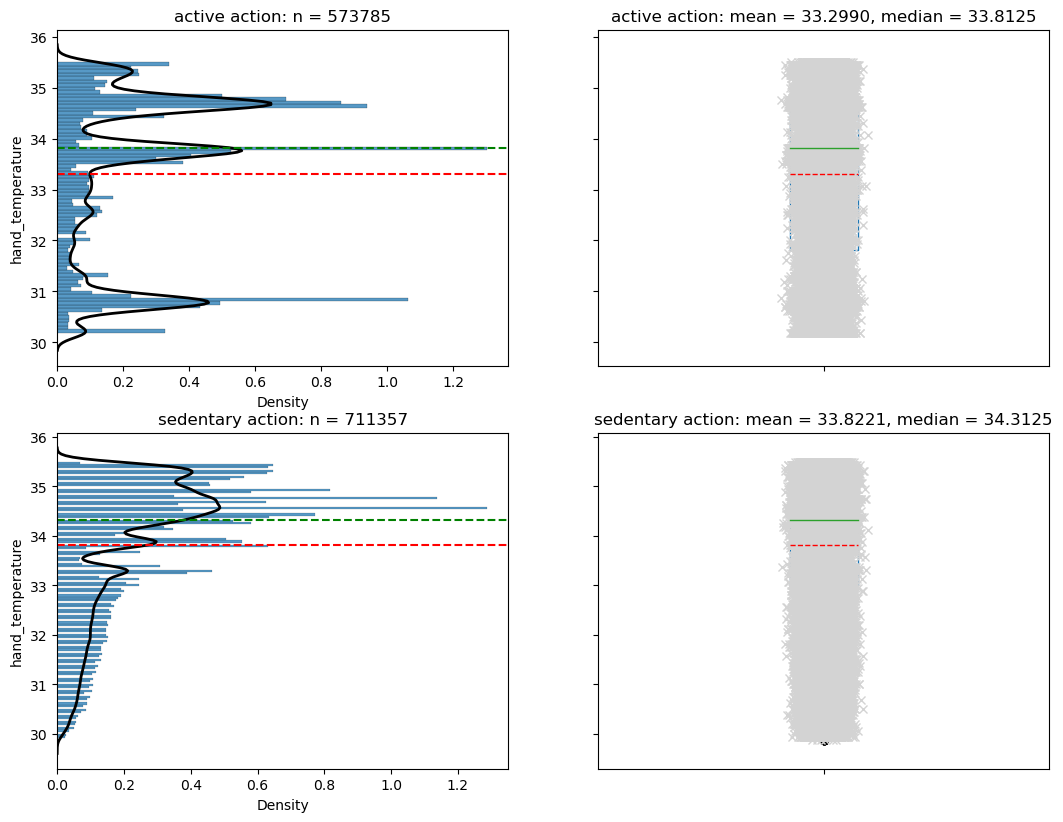

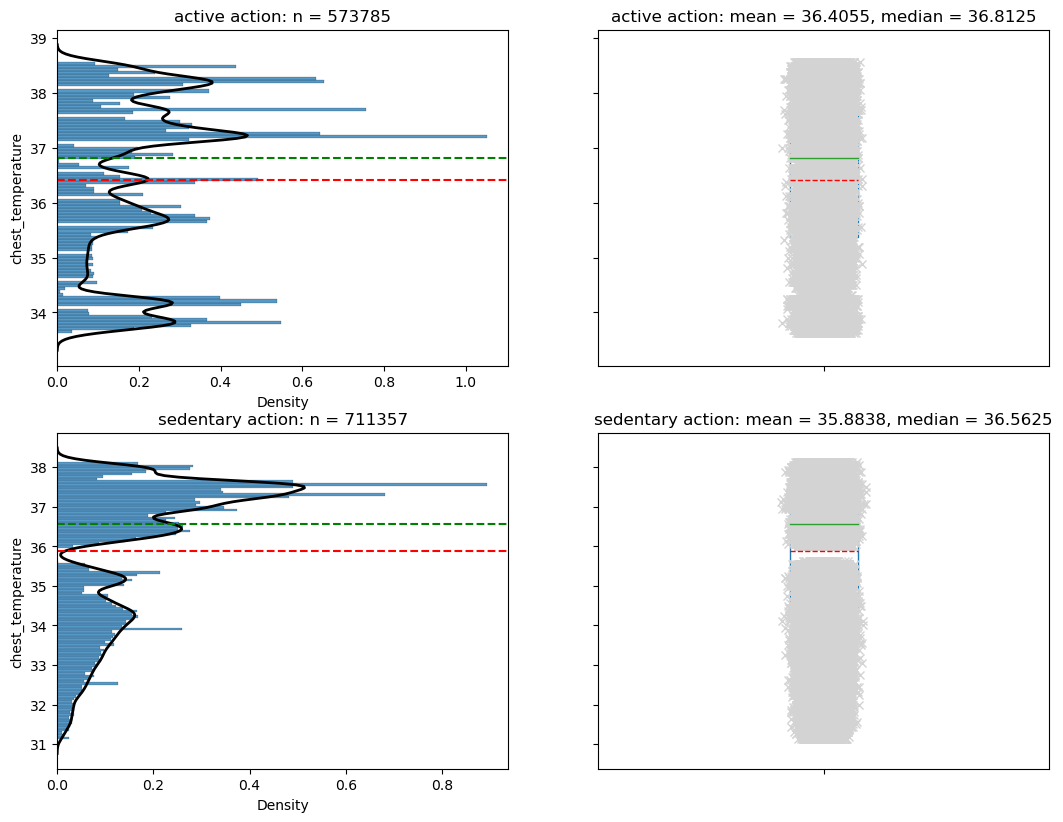

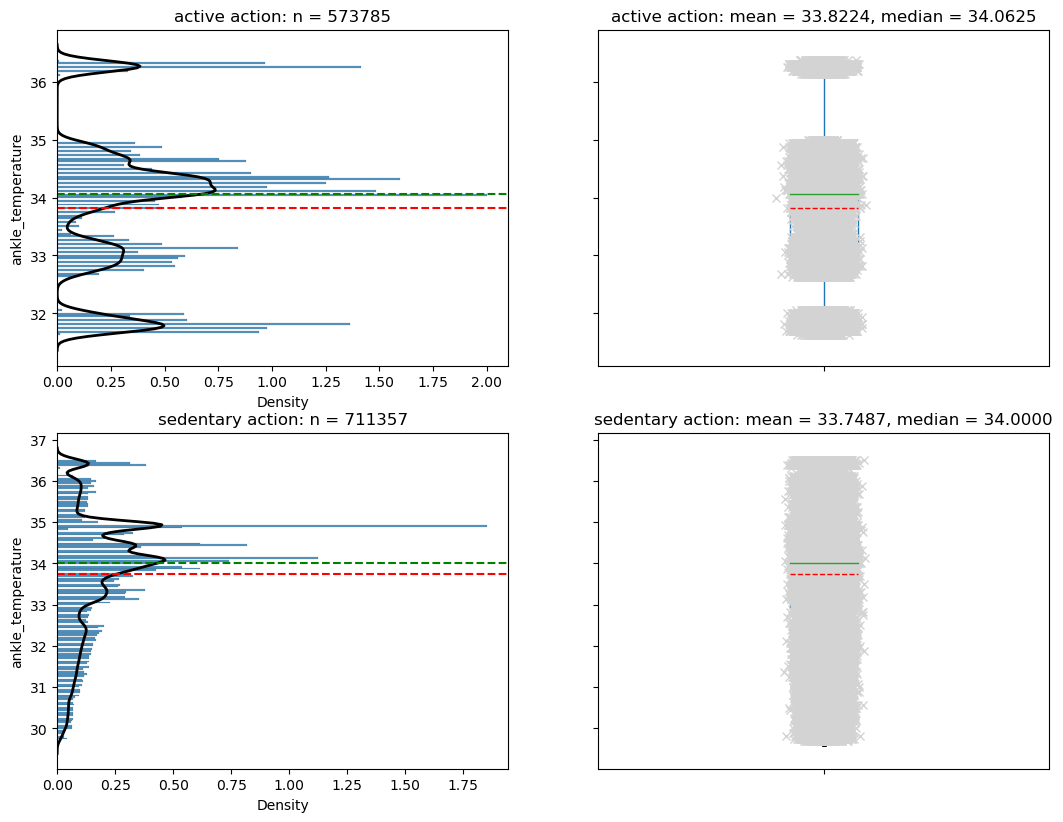

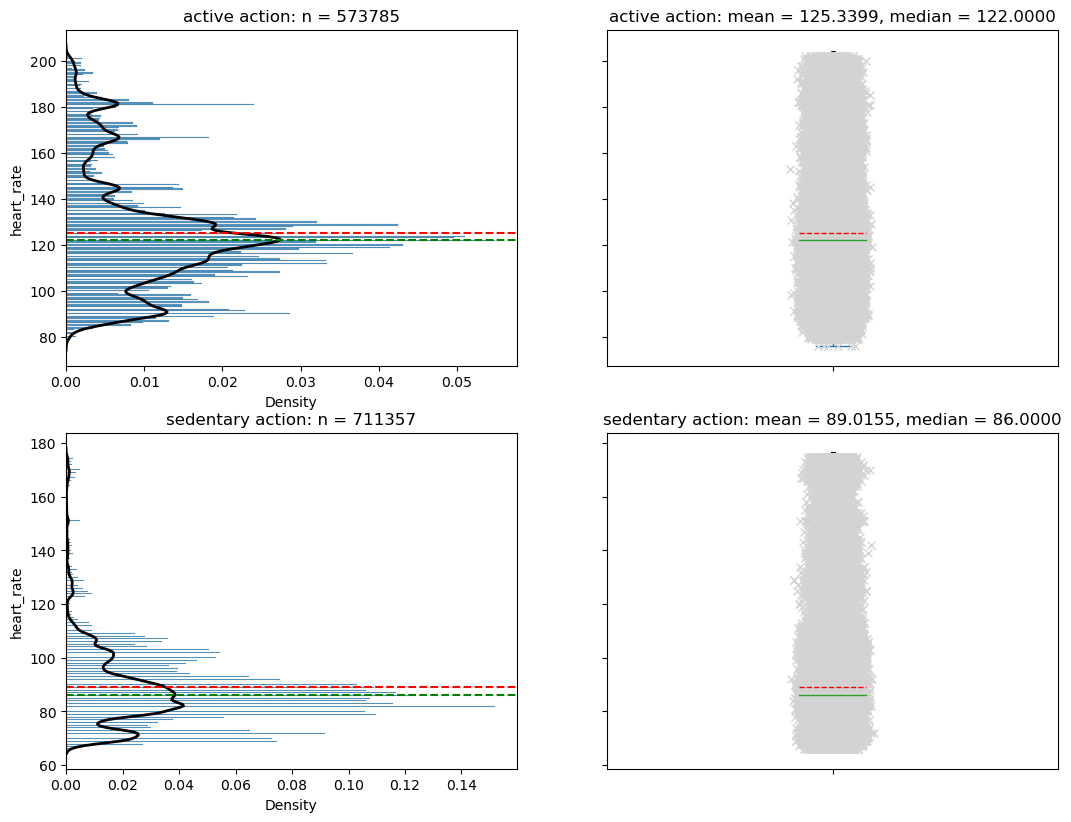

In [157]:
for col in hist_plots:
    
    dual_box_hist_plot(active_df , sedentary_df, col, title_1="active action",title_2 = "sedentary action")

C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\1345540495.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,y=col,ax=axes[0],color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))
C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\1345540495.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df,y=col,ax=axes[0],color="k", linewidth=2,clip=(np.min(values)*0.975,np.max(values)*1.025))


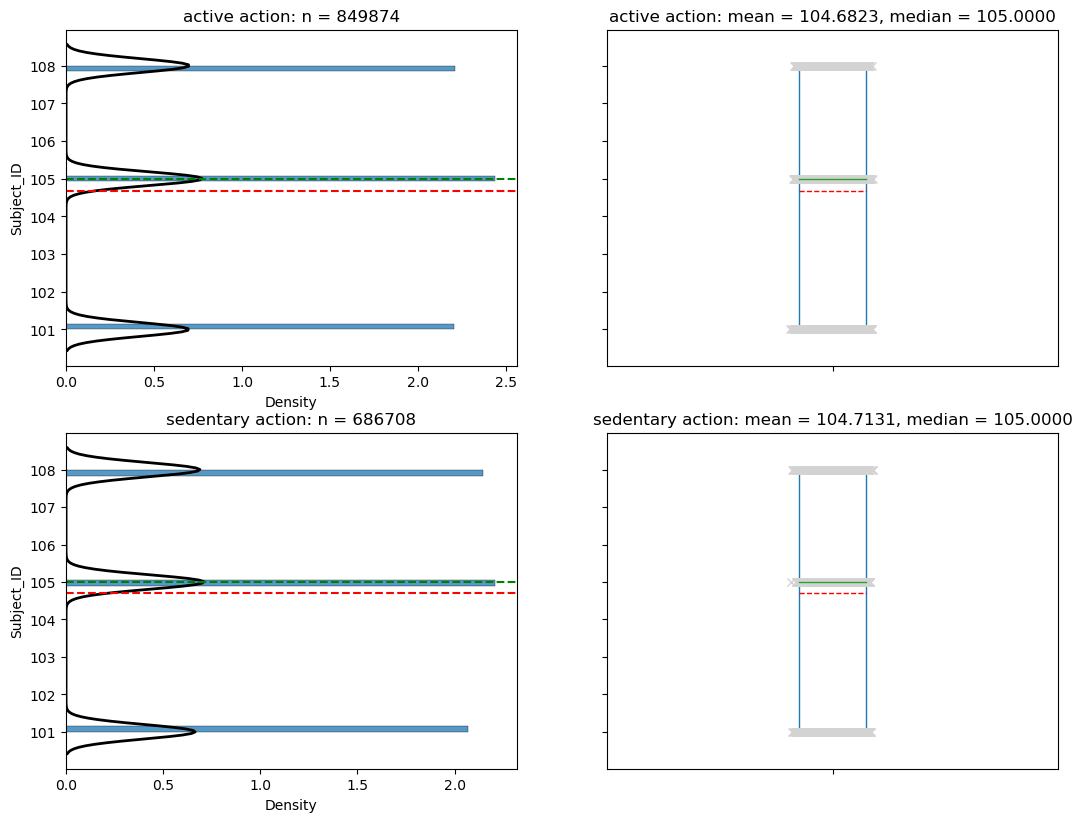

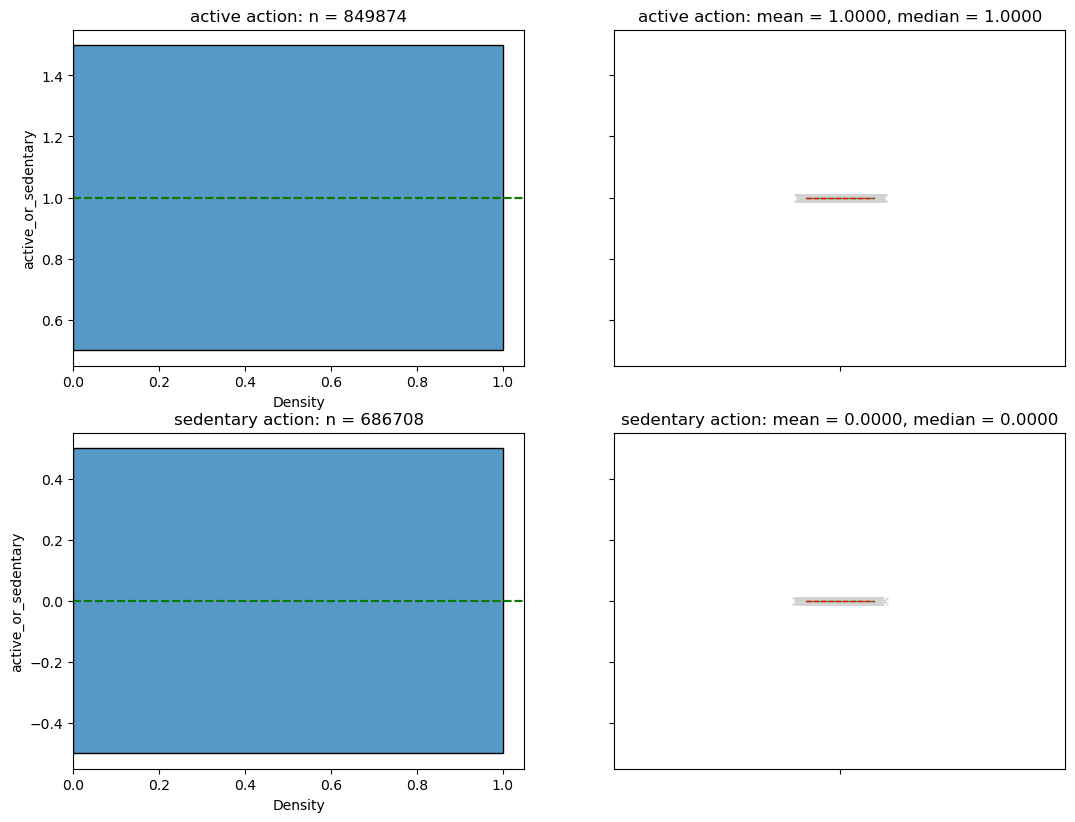

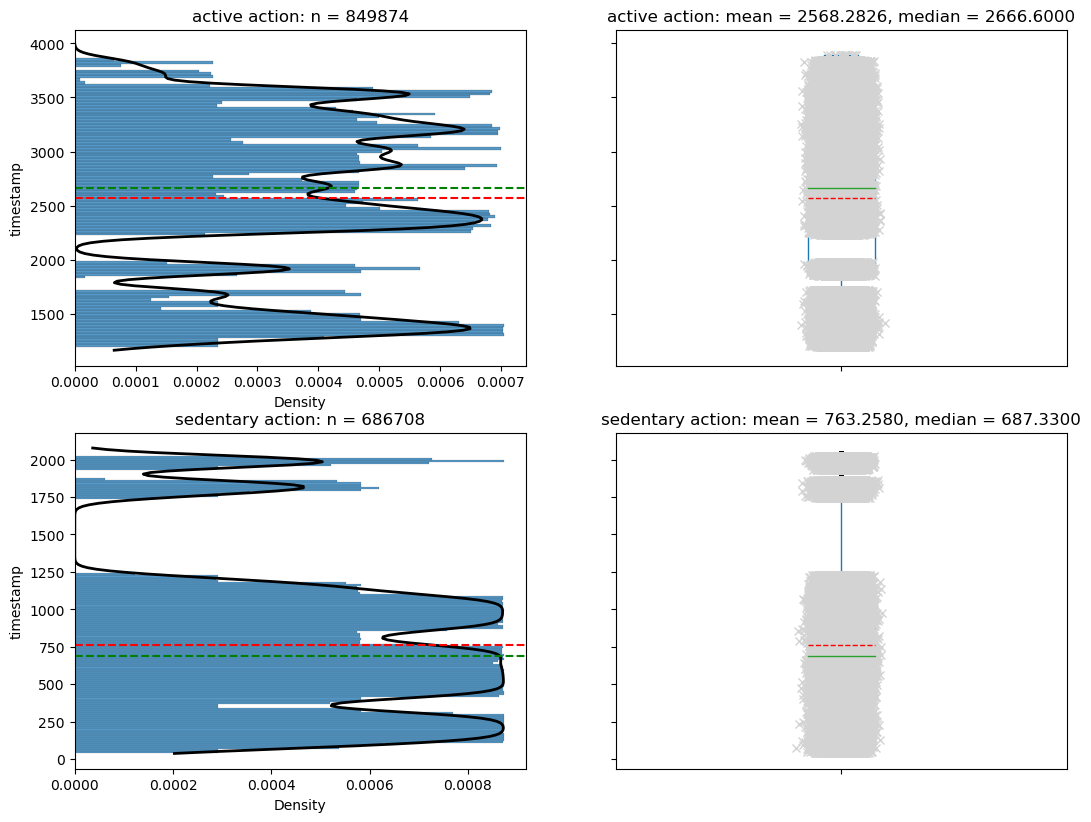

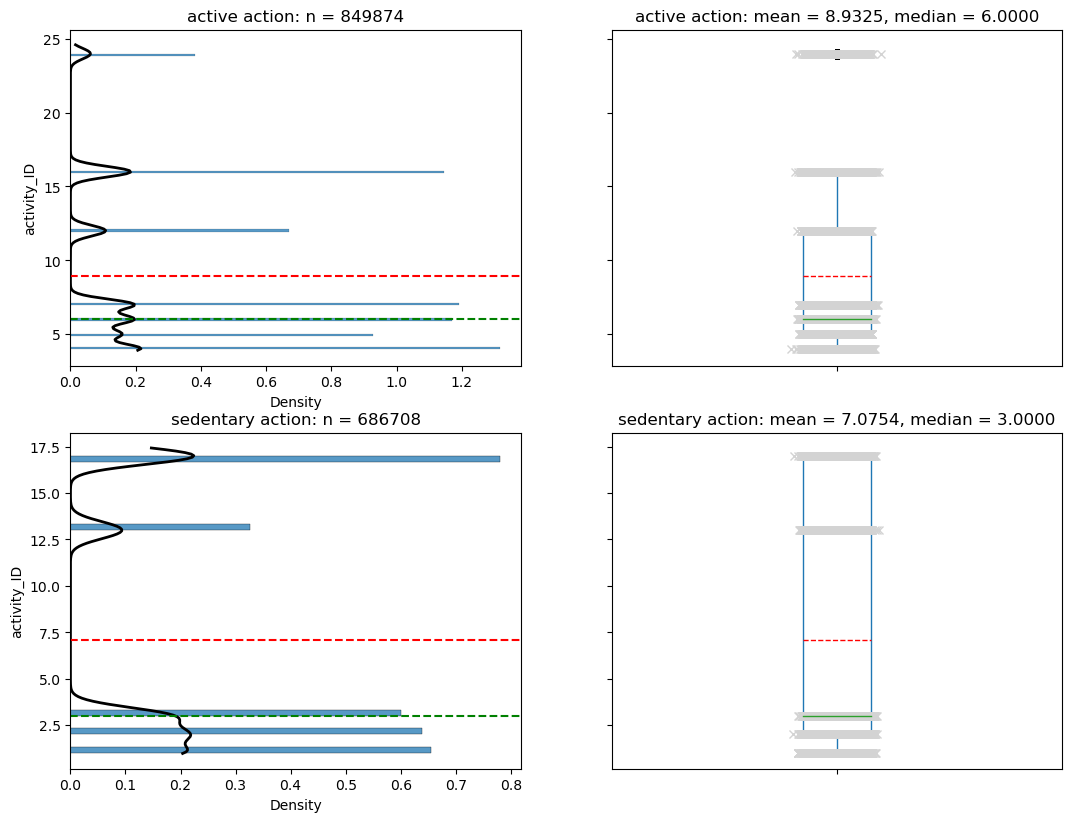

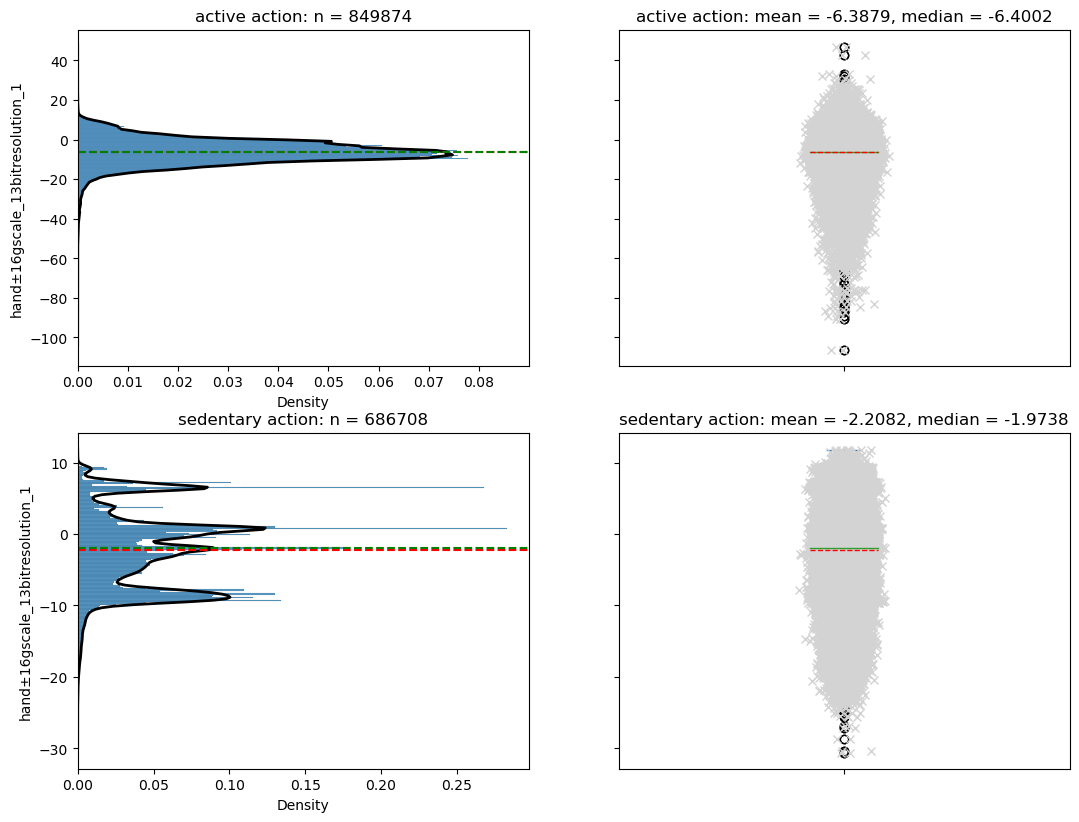

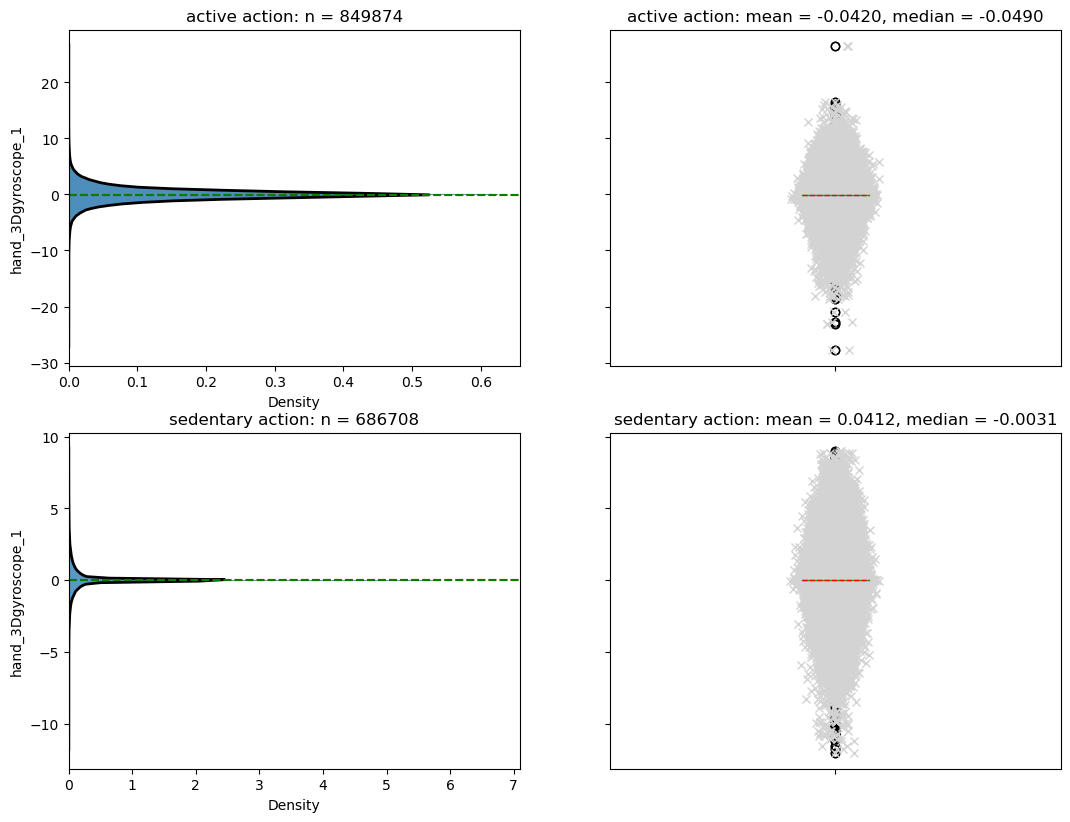

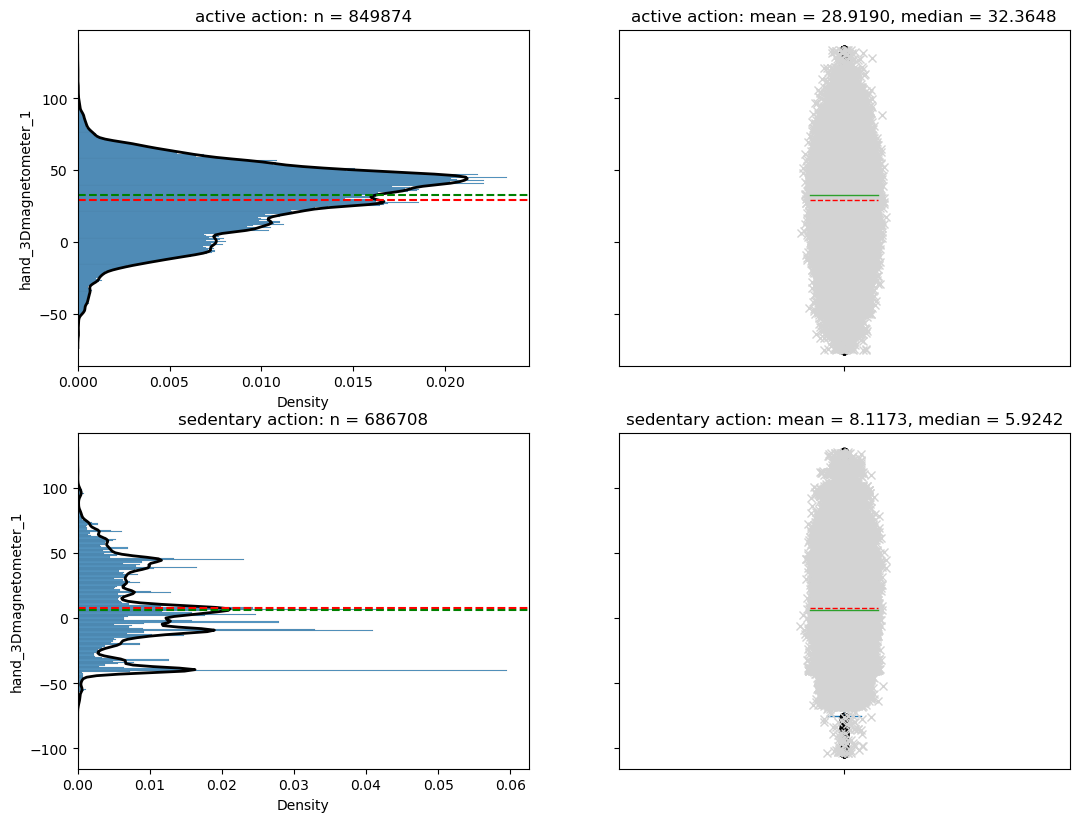

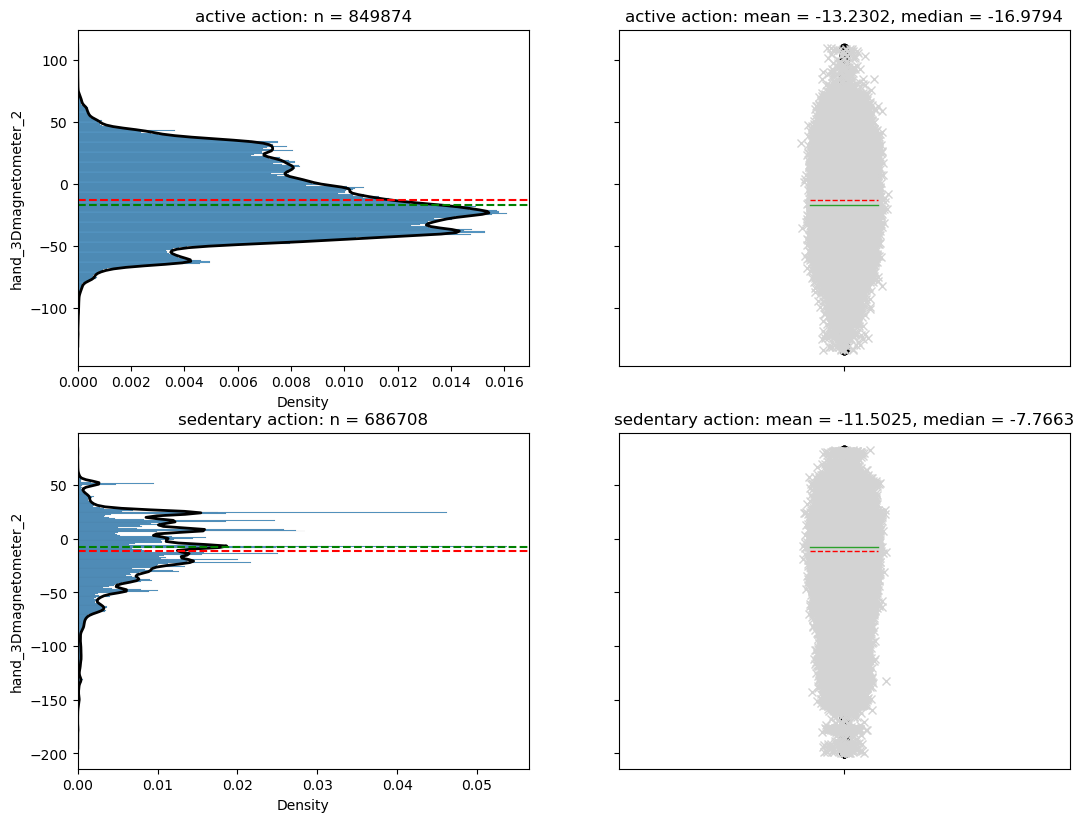

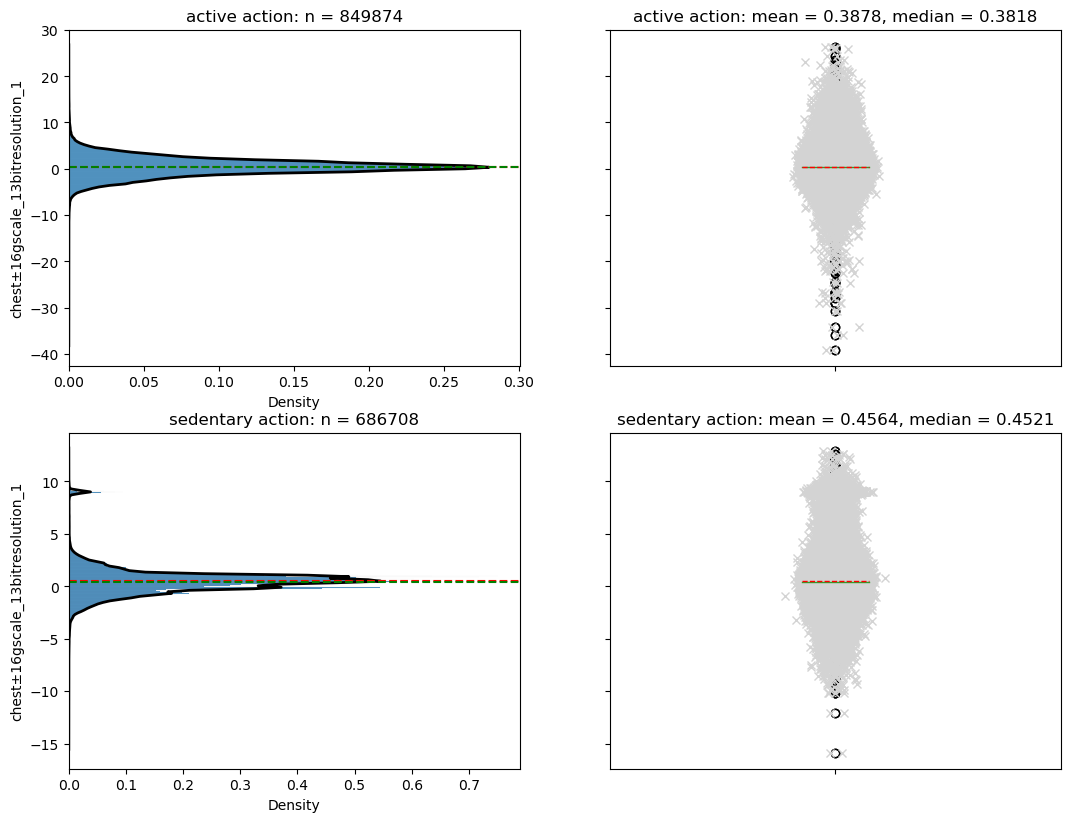

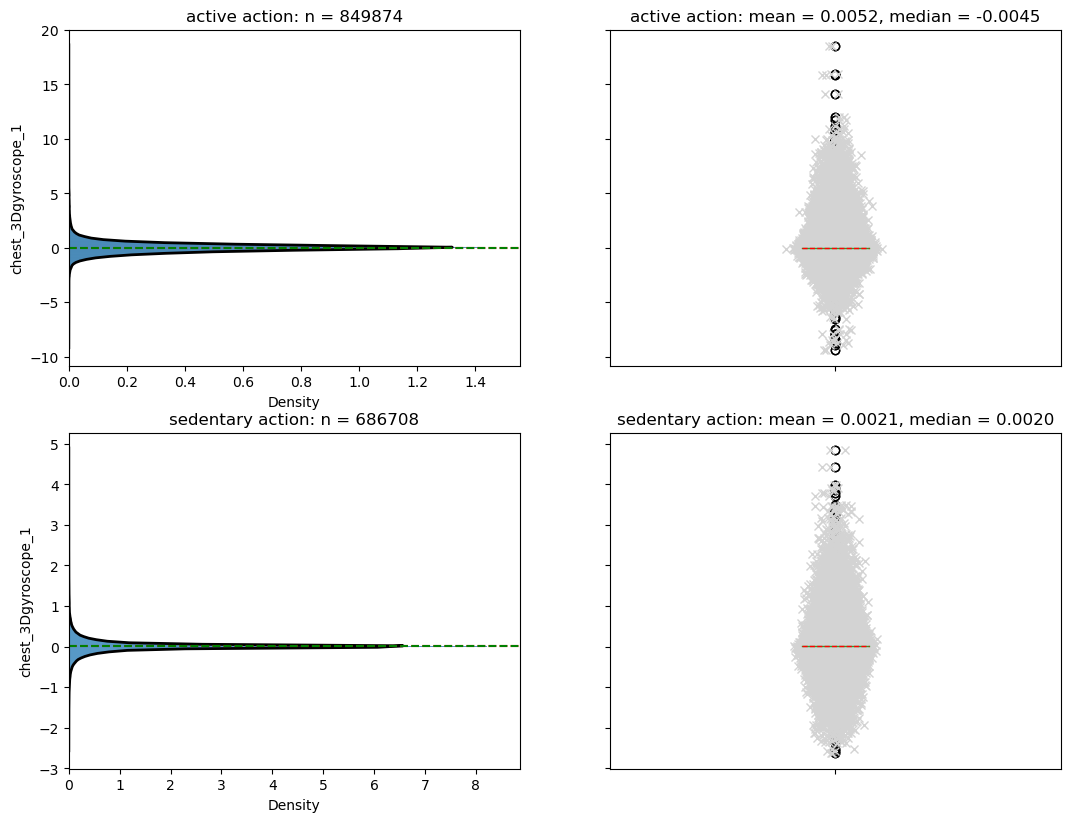

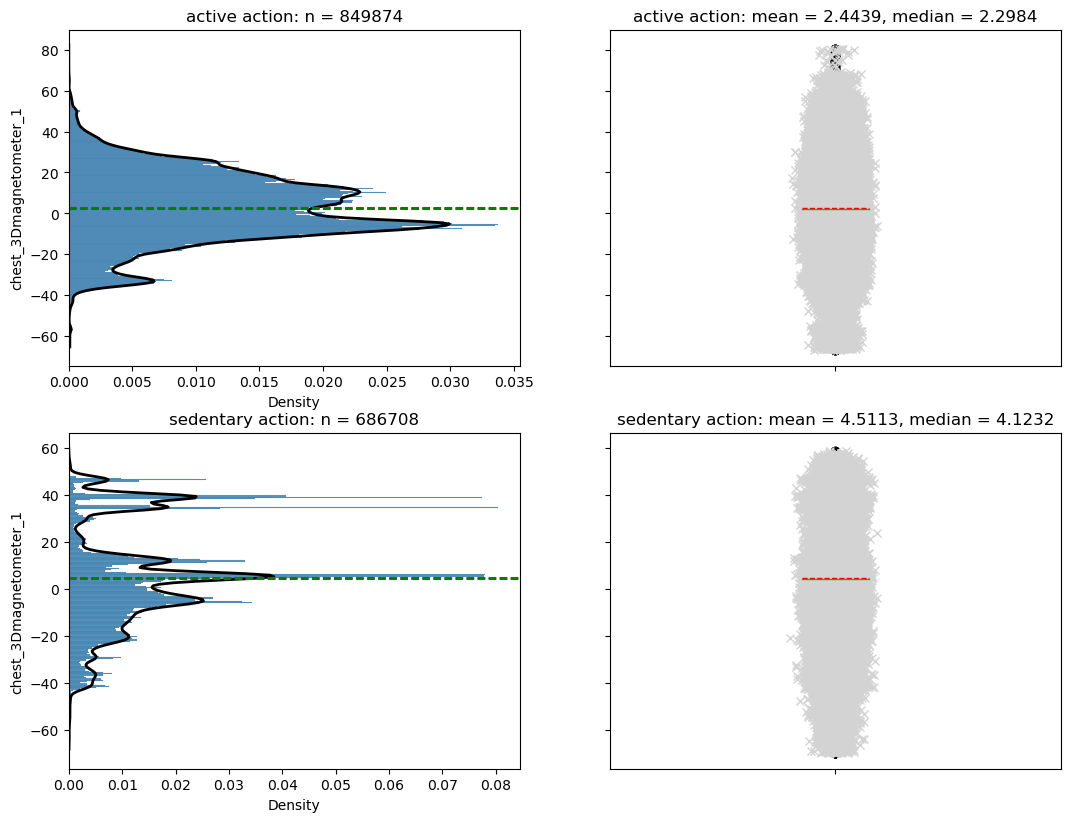

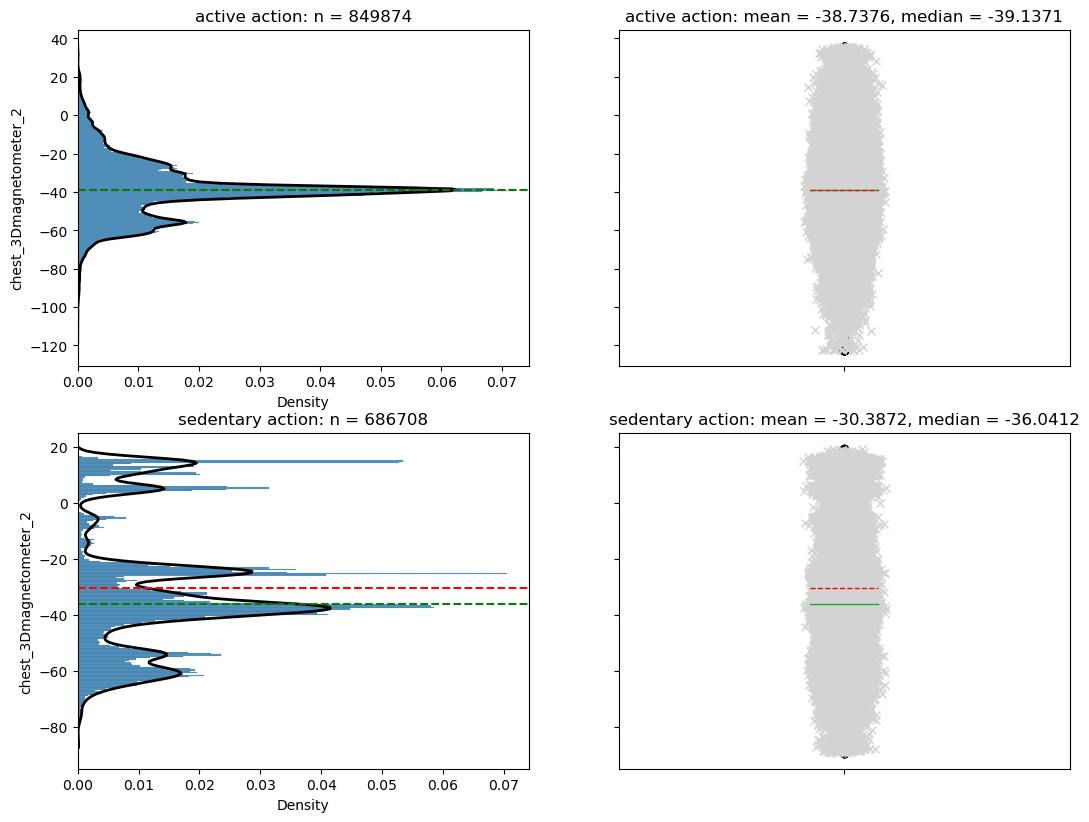

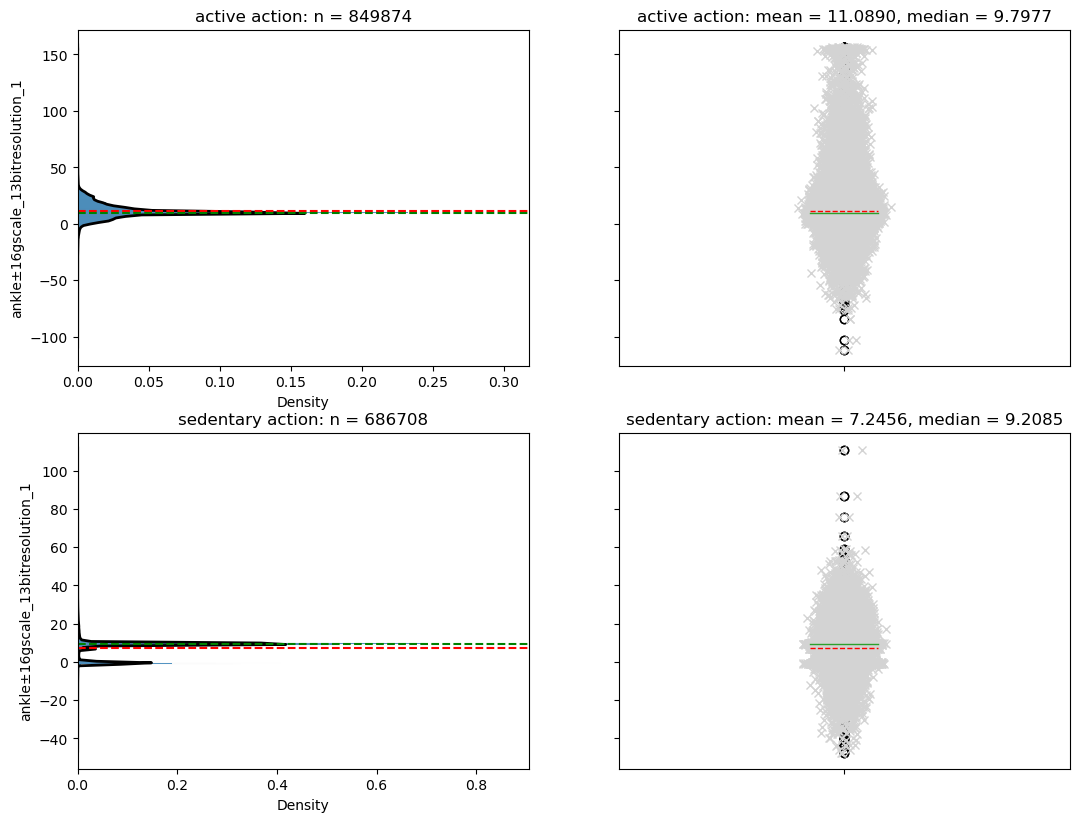

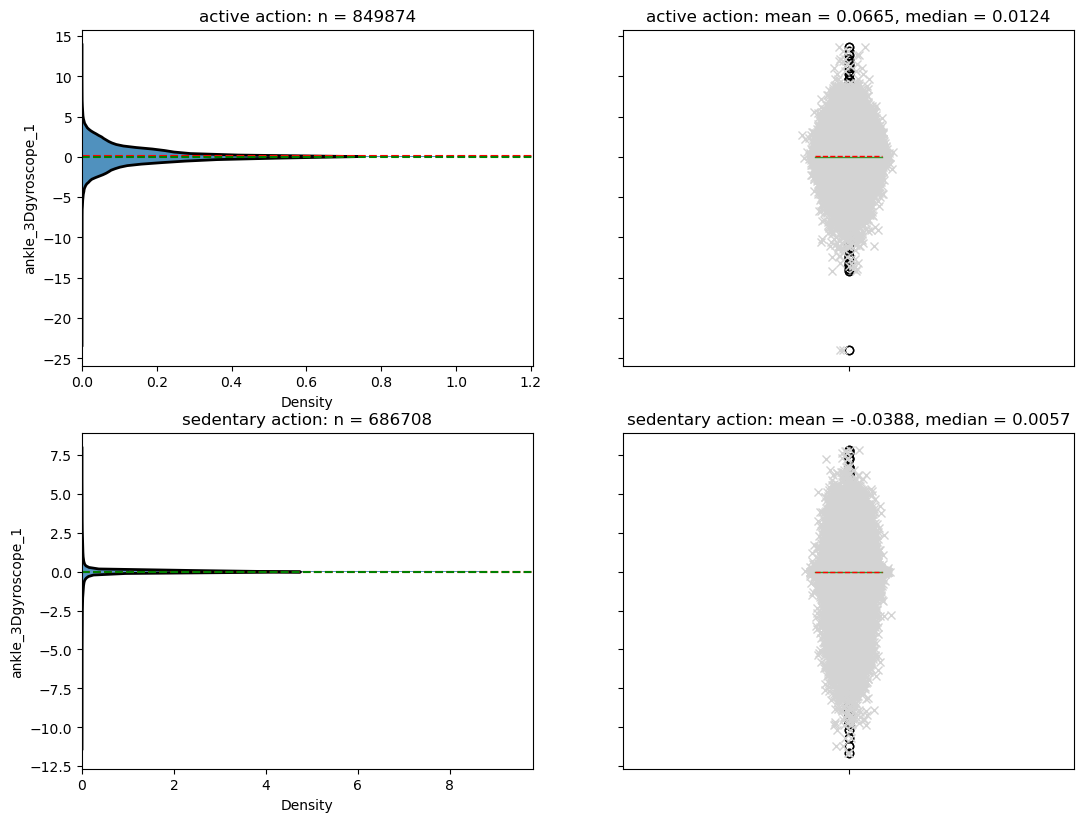

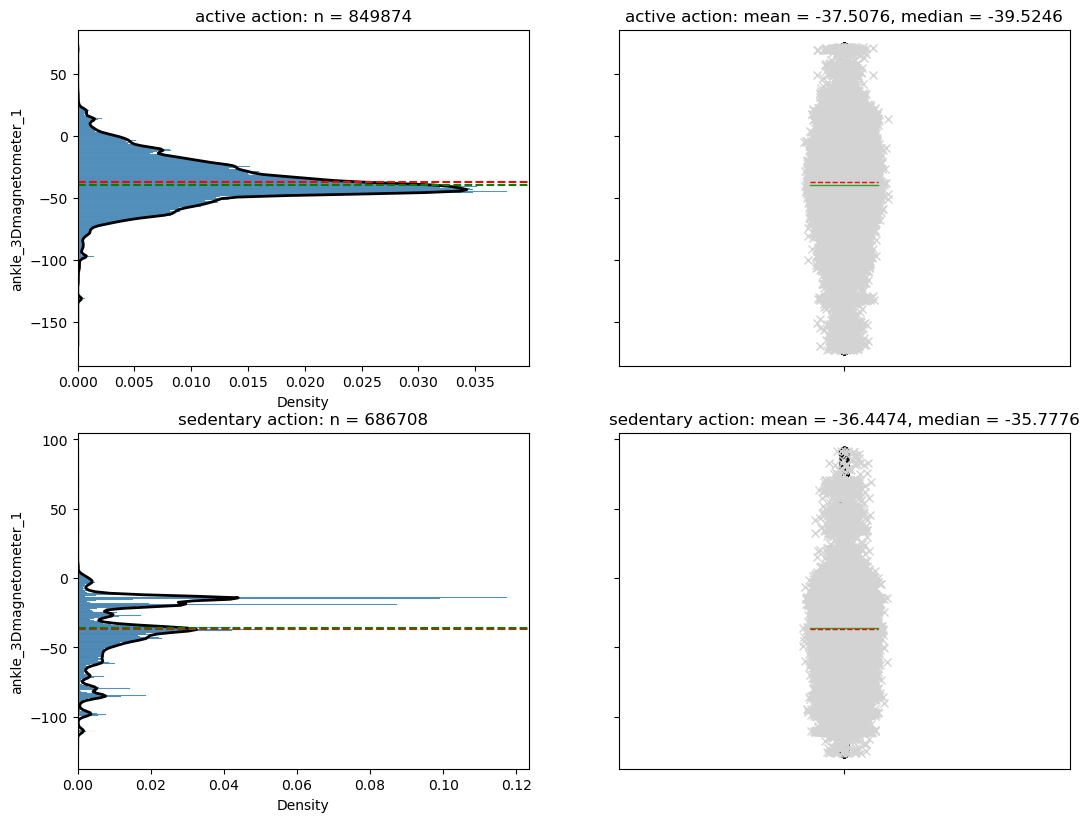

In [82]:
for col in bar_plots3:
    
    dual_box_hist_plot(active_df , sedentary_df, col, title_1="active action",title_2 = "sedentary action")


In [80]:
from statsmodels.distributions.empirical_distribution import ECDF

def plot_ECDF(df_1, df_2, col, label_1, label_2, title=None):
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    
    values_1 = df_1[df_1[col].notna()][col].values
    values_2 = df_2[df_2[col].notna()][col].values
    
    if title is None:
        title = col
    
    ECDF_1 = ECDF(values_1)
    ECDF_2 = ECDF(values_2)
    xax = np.linspace(min(np.min(values_1),np.min(values_2)),max(np.max(values_1),np.max(values_2)),1001)
    ax.plot(xax,ECDF_1(xax),label=label_1)
    ax.plot(xax,ECDF_2(xax),label=label_2)
    ax.legend(loc="best")
    
    D = np.max(np.abs(ECDF_2(xax) - ECDF_1(xax)))
    ax.set_title(fr"{title}: $D$ = {D:.4f}")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$\hat{F}_{X}(x)$")

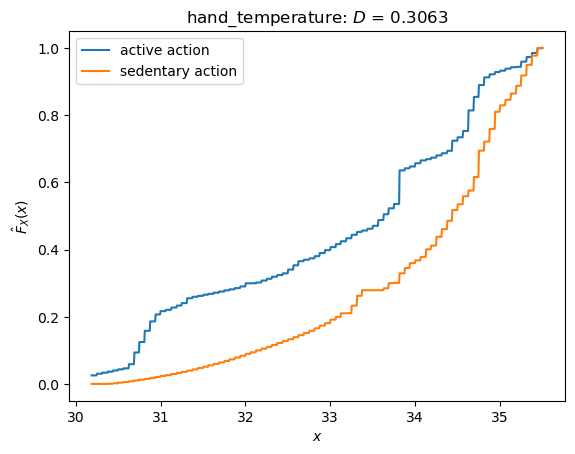

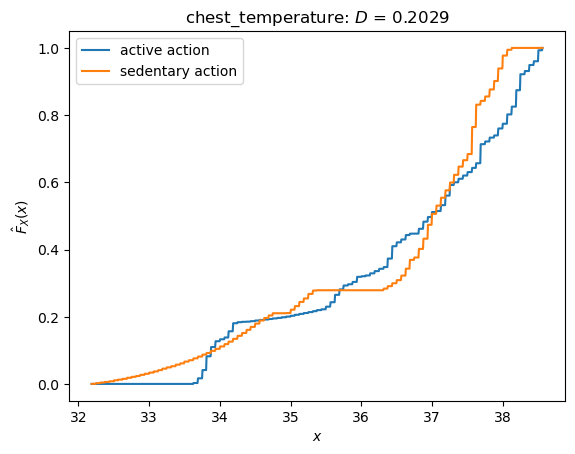

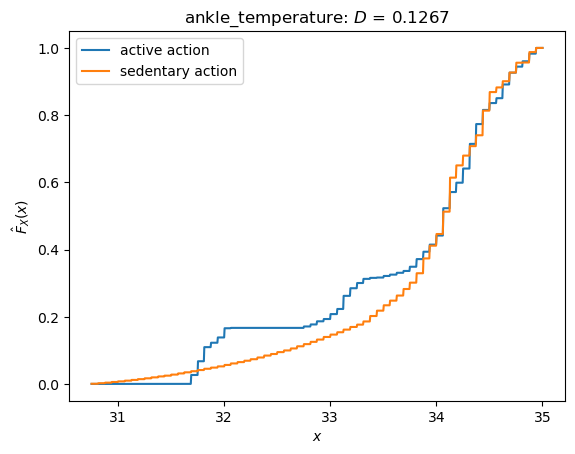

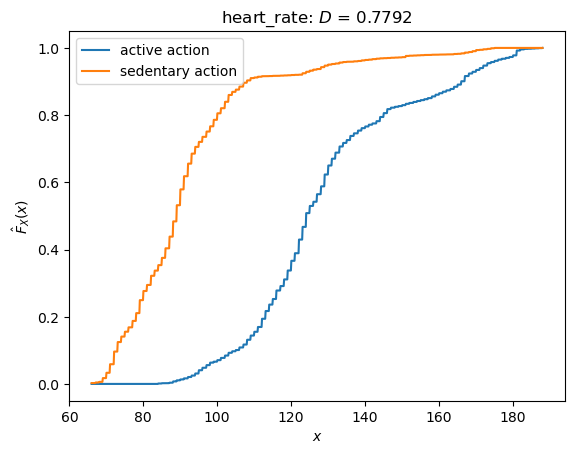

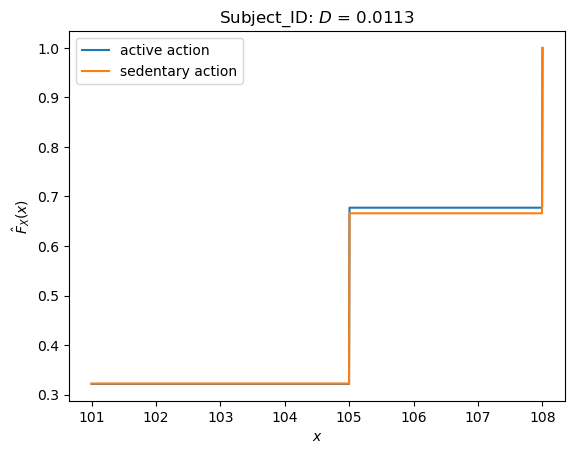

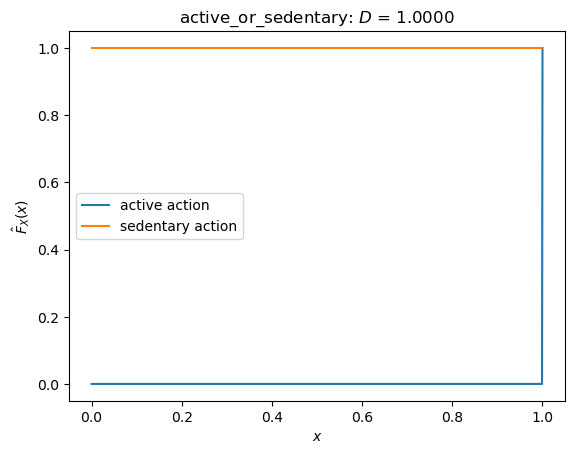

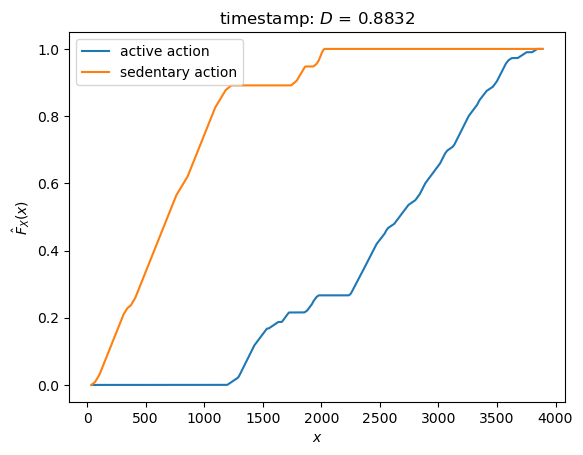

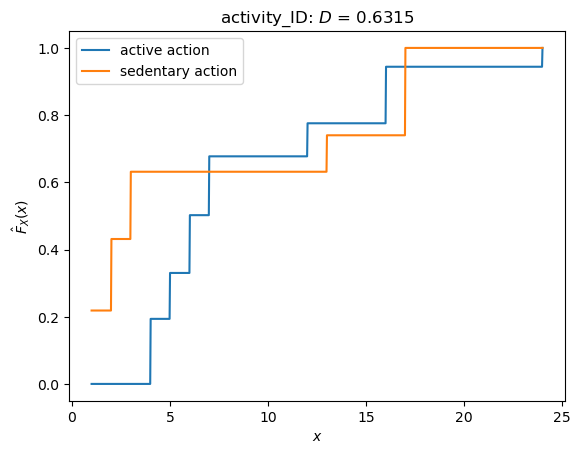

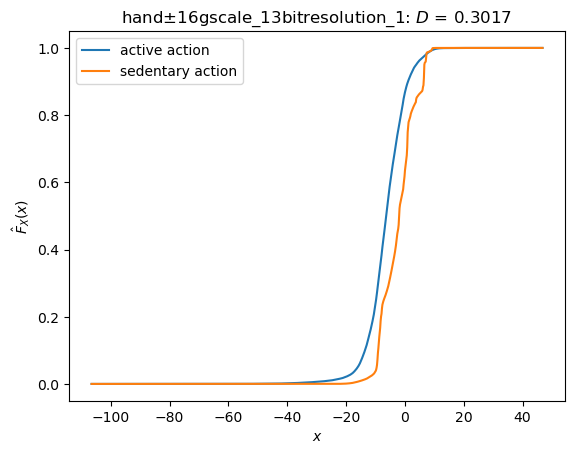

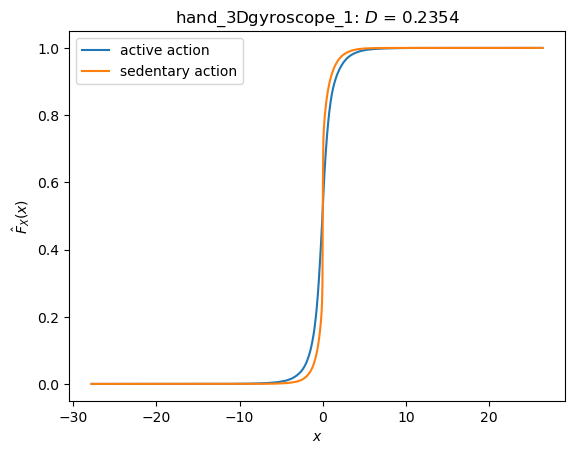

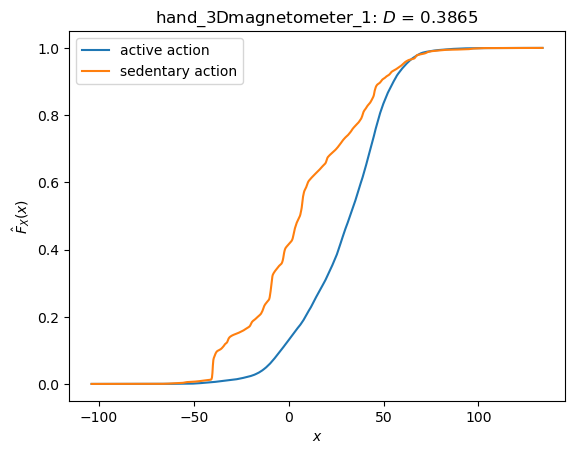

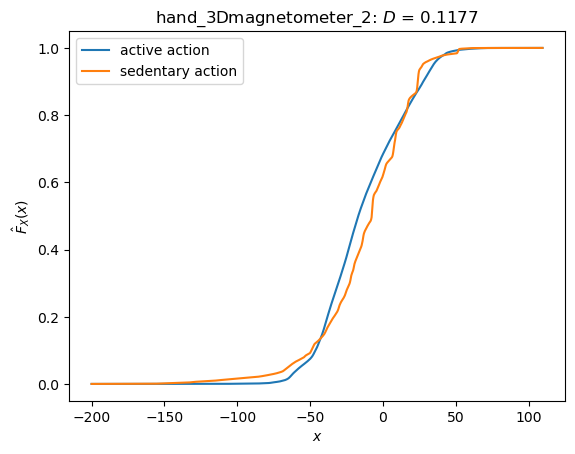

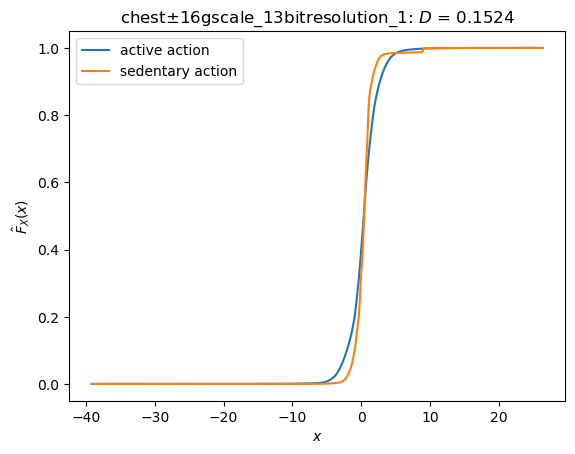

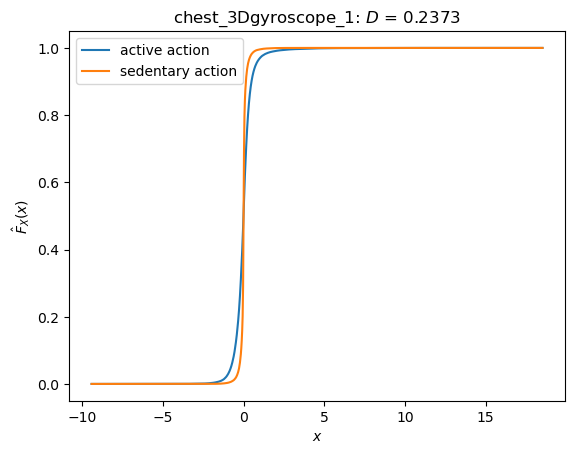

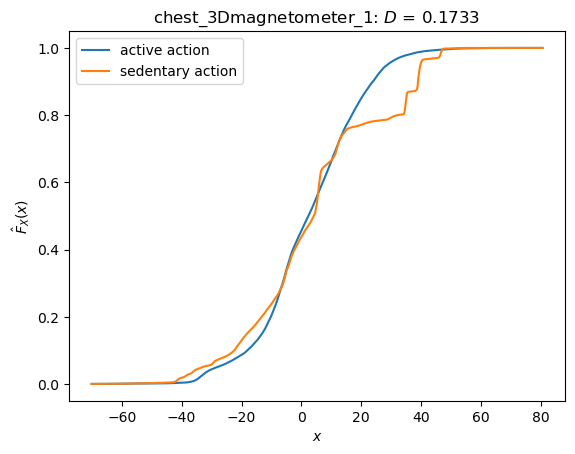

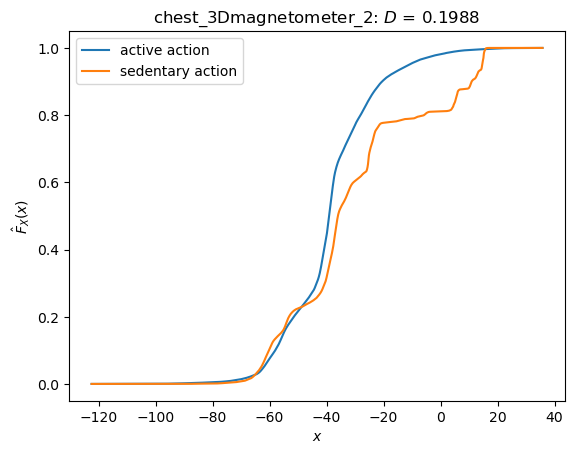

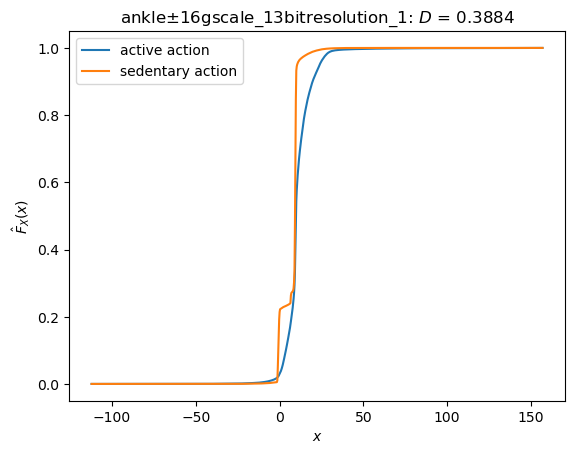

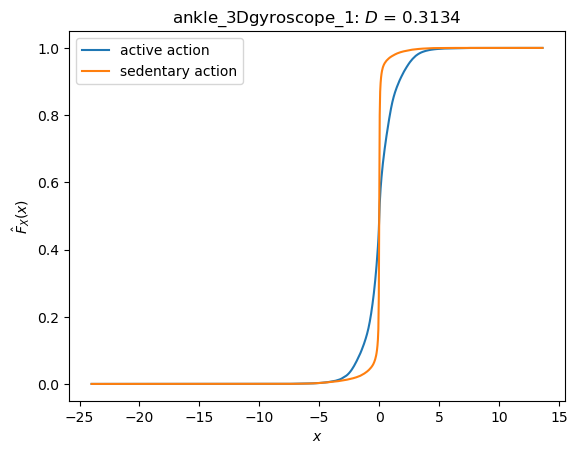

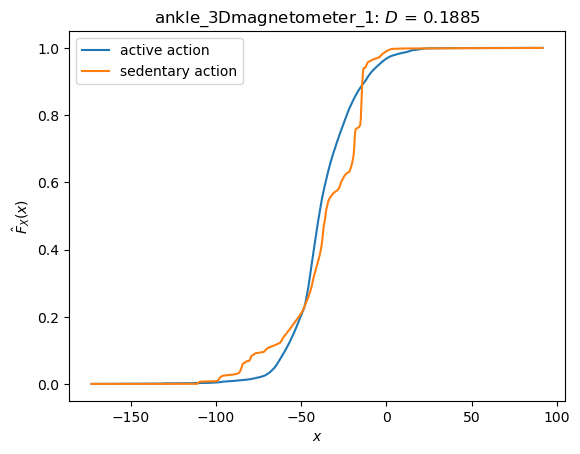

In [81]:
for col in hist_plots:
    plot_ECDF(active_df, sedentary_df, col, "active action", "sedentary action")

for col in bar_plots3:
    plot_ECDF(active_df, sedentary_df, col, "active action", "sedentary action")

In [83]:
def hypothesis_statement(p_value, alpha):
    c = 100.0*alpha
    if p_value < alpha:
        return f"We reject the Null Hypothesis in favour of the Alternative Hypothesis at the {c}% level, p-value = {p_value}", False
    else:
        return f"We accept the Null Hypothesis at the {c}% level, p-value = {p_value}", True

In [84]:
from scipy.stats import ks_2samp, chi2_contingency
alpha = 0.01
same_c = []
not_same_c = []
same2_c = []
not_same2_c = []
same_d = []
not_same_d = []

for col in hist_plots:
    values_1 = active_df[active_df[col].notna()][col].values
    values_2 = sedentary_df[sedentary_df[col].notna()][col].values
    
    _, p_value = ks_2samp(values_1,values_2)
    
    print(f"Null hypothesis: the distribution of active and sedentary actions are same for the {col} feature.")
    txt, res = hypothesis_statement(p_value,alpha)
    print(f"Kolmogorov Smirnoff test. {txt}")
    print("\n")
    
    if res:
        same_c.append(col)
    else:
        not_same_c.append(col)
    




Null hypothesis: the distribution of active and sedentary actions are same for the hand_temperature feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of active and sedentary actions are same for the chest_temperature feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of active and sedentary actions are same for the ankle_temperature feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of active and sedentary actions are same for the heart_rate feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0




In [85]:
for col in bar_plots3:
    values_1 = active_df[active_df[col].notna()][col].values
    values_2 = sedentary_df[sedentary_df[col].notna()][col].values
    
    _, p_value = ks_2samp(values_1,values_2)
    
    print(f"Null hypothesis: the distribution of active and sedentary actions are same for the {col} feature.")
    txt, res = hypothesis_statement(p_value,alpha)
    print(f"Kolmogorov Smirnoff test. {txt}")
    print("\n")
    
    if res:
        same2_c.append(col)
    else:
        not_same2_c.append(col)
    


Null hypothesis: the distribution of active and sedentary actions are same for the Subject_ID feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 1.845250784522209e-42


Null hypothesis: the distribution of active and sedentary actions are same for the active_or_sedentary feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of active and sedentary actions are same for the timestamp feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of active and sedentary actions are same for the activity_ID feature.
Kolmogorov Smirnoff test. We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0


Null hypothesis: the distribution of 

In [86]:


def check_gaussian(values, alpha):
    
    _,p_value_n = normaltest(values)
    
    txt, res_n = hypothesis_statement(p_value_n, alpha)
    if not res_n:
        # we can only use this as evidence against the Gaussian assumption, not for it
        print(f"Ksquared test: {txt}")
    
    _,p_value_lf = lilliefors(values,dist="norm")
    
    txt, res_lf = hypothesis_statement(p_value_lf, alpha)
    print(f"Lilliefors test: {txt}")
    
    if (not res_n) or (not res_lf):
        return False
    
    return True

In [87]:
norm_col = []
not_norm_col = []

for col in not_same_c:
    values_1 = active_df[active_df[col].notna()][col].values
    print(f"Null hypothesis: the distribution of active activiy or the {col} feature is a Gaussian")
    male_res = check_gaussian(values_1, alpha)
    print("\n")
    
    values_2 = sedentary_df[sedentary_df[col].notna()][col].values
    print(f"Null hypothesis: the distribution of sedentary activity or the {col} feature is a Gaussian")
    female_res = check_gaussian(values_2, alpha)
    print("\n")
    
    if male_res and female_res:
        norm_col.append(col)
    else:
        not_norm_col.append(col)
        
not_norm_col.extend(not_same_d)

Null hypothesis: the distribution of active activiy or the hand_temperature feature is a Gaussian
Ksquared test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0
Lilliefors test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0009999999999998899


Null hypothesis: the distribution of sedentary activity or the hand_temperature feature is a Gaussian
Ksquared test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0
Lilliefors test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0009999999999998899


Null hypothesis: the distribution of active activiy or the chest_temperature feature is a Gaussian
Ksquared test: We reject the Null Hypothesis in favour of the Alternative Hypothesis at the 1.0% level, p-value = 0.0
Lilliefors test: We reject the Null Hypothesis in favour of the Alt

In [88]:
def bootstrap_diff_means(data_1,data_2,num_bootstraps=100000,tail="two"):
    m_1 = np.mean(data_1)
    m_2 = np.mean(data_2)
    v_1 = np.var(data_1, ddof=1)
    v_2 = np.var(data_2, ddof=1)
    n_1 = len(data_1)
    n_2 = len(data_2)
    se = np.sqrt(v_1/n_1 + v_2/n_2)
    t_stat = (m_1 - m_2)/se

    comb_m = (np.sum(data_1) + np.sum(data_2))/(n_1 + n_2)

    adj_col1 = data_1 - m_1 + comb_m
    adj_col2 = data_2 - m_2 + comb_m

    count = 0
    for _ in range(num_bootstraps):
        bs_1 = np.array([adj_col1[i] for i in np.random.randint(0,n_1,size=n_1)])
        bs_2 = np.array([adj_col2[i] for i in np.random.randint(0,n_2,size=n_2)]) 
        
        bs_m_1 = np.mean(bs_1)
        bs_m_2 = np.mean(bs_2)
        bs_v_1 = np.var(bs_1,ddof=1)
        bs_v_2 = np.var(bs_2,ddof=1)
        bs_se = np.sqrt(bs_v_1/n_1 + bs_v_2/n_2)
        
        bs_t_stat = (bs_m_1 - bs_m_2)/bs_se
        
        if tail == "two":
            if np.abs(bs_t_stat) >= np.abs(t_stat):
                count += 1
        elif tail == "less":
            if bs_t_stat <= t_stat:
                count += 1
        elif tail == "greater":
            if bs_t_stat >= t_stat:
                count += 1

    return m_1 - m_2, t_stat, (count+1)/(num_bootstraps+1)

In [ ]:
# this will take too long
for col in not_norm_col:
    values_1 = active_df[active_df[col].notna()][col].values
    values_2 = sedentary_df[sedentary_df[col].notna()][col].values
    
    if np.mean(values_1) - np.mean(values_2) < 0:
        tail = "less"
    else:
        tail = "greater"
    
    dbar, _, p_value_bs = bootstrap_diff_means(values_1,values_2,tail=tail)
    
    print(f"Null hypothesis: the average {col} for active is the same as forsedentary. Alternative hypothesis: the average {col} for active is {tail} than for sedentary")
    txt, res = hypothesis_statement(p_value_bs, alpha)
    print(f"Boostrap. {txt}")
    if res:
        print(f"That is, there is not significance evidence to state that the average {col} for active is {tail} than for sedentary at the {100.0*alpha}% level")
    else:
        print(f"That is, there is significance evidence to state that the average {col} for active is {tail} than for sedentary is at the {100.0*alpha}% level")
    print("\n")

### Principal Component Analysis

To choose important features, I initially drop columns with the least correlation with others in the heatmap. Initially, I attempted to consider all of the data for analysis, but it proved to be time-consuming and somewhat impossible. Therefore, I dropped the following columns: 'activity', 'ankle±16gscale_13bitresolution_3', 'hand±16gscale_13bitresolution_3', 'ankle_3Dmagnetometer_3', 'hand_3Dmagnetometer_1', 'hand_3Dmagnetometer_2', 'MET', and all columns related to 3D gyroscope.
Additionally, I convert the 'active_or_sedentary' column to numerical data, assigning 1 for active and 0 for sedentary.

To calculate the Explained Variance for the Seeds Dataset, I perform PCA. Afterward, I identify the elbow point and present a table for PC1 and PC2. For Cluster Analysis, I apply K-Means to the features with a total higher number of PC1 and higher features in PC2. To enhance comprehension, I create a corresponding plot.

For performing feature selection I use Sequential Feature Selection (SFS) with a Linear Regression model and determines the optimal number of features based on the Akaike Information Criterion (AIC). A Linear Regression model is fitted using all features to get the AIC value at the ent  show Determine number of 20 features in plot. It helps us to understanding the trade-off between model complexity and goodness of fit, providing insights into the optimal number of features for the Linear Regression model based on AIC.
The optimal number of features is determined as the index with the minimum AIC value.
A plot is created to visualize the AIC values for different numbers of features.

To perform Ordinary Least Squares (OLS) regression analysis I use statsmodels library and present the results of an Ordinary Least Squares (OLS) regression analysis in table, I  put active_or_sedentary as a Dependent Variable, The variable being predicted or explained by the independent variables.R-squared shows The proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, about 75.8% of the variability in active_or_sedentary is explained by the model. Adjusted R-squared is Similar to R-squared, but adjusted for the number of predictors in the model. It penalizes the inclusion of irrelevant predictors which is 758. No. Observations shows he number of data points used in the analysis In this case is about 1,536,582. F-statistic is a test statistic that assesses the overall significance of the model, Higher values indicate a more significant model which is 2.408e+05. Prob (F-statistic) shows The p-value associated with the F-statistic. in this case is 0 and a low p-value indicates that the overall model is statistically significant. We have Coefficients Table for each row corresponds to a predictor variable, and the columns provide information about the estimated coefficients, standard errors, t-statistics, p-values, and confidence intervals.
In summary, the model appears to have a reasonably high R-squared, indicating that it explains a significant portion of the variability in the dependent variable. However, the note about multicollinearity suggests caution, and further investigation into the relationships between predictor variables may be warranted.
To select features with a lesser impact, as all p-values are 0, we examine the magnitudes of the coefficients. Larger magnitudes indicate a stronger impact on the dependent variable. For instance, in your output, chest_temperature has a coefficient with a significantly positive value, suggesting it might be an important feature. We remove half of the features with less confidence, and again, OLS Regression Results highlight features with higher confidence, such as hand_temperature, hand±16gscale_13bitresolution_1, chest_temperature, chest±16gscale_13bitresolution_2, chest±16gscale_13bitresolution_3, and ankle_temperature.
For chest_temperature, we repeat the previous step, and the results reveal features with higher confidence, such as ankle and hand temperature

In [ ]:
dfm = copy.deepcopy(df_master)

In [ ]:



# Assuming df is your DataFrame with the provided columns

# Acceleration columns
acceleration_columns = ['hand±16gscale_13bitresolution_1', 'hand±16gscale_13bitresolution_2', 'hand±16gscale_13bitresolution_3',
                        'chest±16gscale_13bitresolution_1', 'chest±16gscale_13bitresolution_2', 'chest±16gscale_13bitresolution_3',
                        'ankle±16gscale_13bitresolution_1', 'ankle±16gscale_13bitresolution_2', 'ankle±16gscale_13bitresolution_3']

# Angular rate columns
angular_rate_columns = ['hand_3Dgyroscope_1', 'hand_3Dgyroscope_2', 'hand_3Dgyroscope_3',
                        'chest_3Dgyroscope_1', 'chest_3Dgyroscope_2', 'chest_3Dgyroscope_3',
                        'ankle_3Dgyroscope_1', 'ankle_3Dgyroscope_2', 'ankle_3Dgyroscope_3']

# Create new columns for average and variance
dfm['avg_acceleration'] = dfm[acceleration_columns].mean(axis=1)
dfm['var_acceleration'] = dfm[acceleration_columns].var(axis=1)

dfm['avg_angular_rate'] = dfm[angular_rate_columns].mean(axis=1)
dfm['var_angular_rate'] = dfm[angular_rate_columns].var(axis=1)

# Now df contains the calculated average and variance for acceleration and angular rate

# You can then use these columns as features for your prediction model

Text(0.5, 1.0, 'Explained Variance for the Data After Mean Imputation')

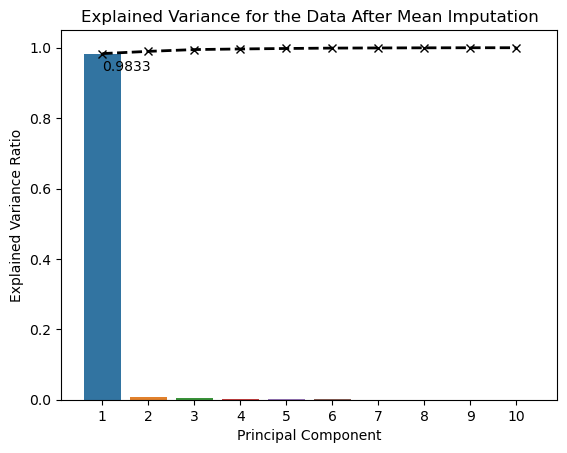

In [160]:


# Step 1: Assuming X_train is your training data
# If there are missing values, impute them using mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Step 2: Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_imputed)

# Step 3: Explained Variance Ratio
ev_ratio = pca.explained_variance_ratio_

# Plotting
pcs = np.arange(1, len(X_train.columns) + 1)

fig, ax = plt.subplots(nrows=1, ncols=1)
sns.barplot(x=pcs, y=ev_ratio)
ax.plot(pcs - 1, np.cumsum(ev_ratio), ls="--", marker="x", lw=2, c="k")

for pc, cer in zip(pcs, np.cumsum(ev_ratio)):
    ax.annotate(f"{cer:.4f}", xy=(pc - 1, cer - 0.05))
    if cer > 0.98:
        break

ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Explained Variance for the Data After Mean Imputation")


In [53]:
dfn.drop(columns=["activity"],inplace=True)
dfn.drop(columns=["ankle±16gscale_13bitresolution_3"],inplace=True)
dfn.drop(columns=["hand±16gscale_13bitresolution_3"],inplace=True)
dfn.drop(columns=["ankle_3Dmagnetometer_3"],inplace=True)
dfn.drop(columns=["hand_3Dmagnetometer_1"],inplace=True)
dfn.drop(columns=["hand_3Dmagnetometer_2"],inplace=True)
dfn["active_or_sedentary"] = df_master.active_or_sedentary.apply(lambda x : 0 if x == "sedentary" else 1)
dfn.drop(columns=["MET"],inplace=True)
dfn.drop(list(df.filter(regex="3Dgyroscope")),axis=1,inplace=True)

Text(0.5, 1.0, 'Explained Variance for the Seeds Dataset')

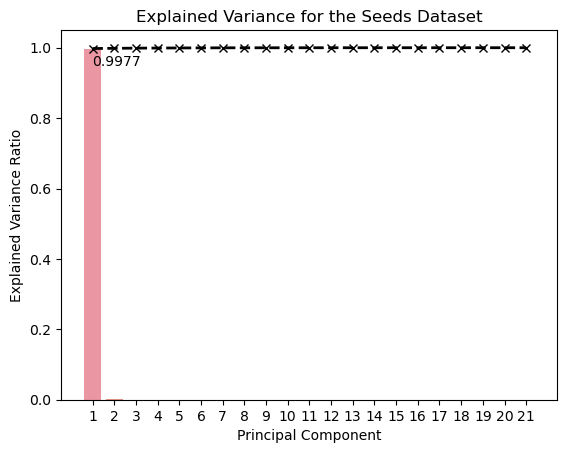

In [149]:

pca = PCA().fit(dfn)
comps = pca.components_
ev_ratio = pca.explained_variance_ratio_ 
cumul_ev_ratio = np.cumsum(ev_ratio)
pcs = np.arange(1,len(dfn.columns)+1)
loadings = pd.DataFrame(data=comps,columns=[f"PC{pc}" for pc in pcs],index=dfn.columns)

fig,ax = plt.subplots(nrows=1,ncols=1)
sns.barplot(x=pcs,y=ev_ratio)
ax.plot(pcs-1,cumul_ev_ratio,ls="--",marker="x",lw=2,c="k")
for pc,cer in zip(pcs,cumul_ev_ratio):
    ax.annotate(f"{cer:.4f}",xy=(pc-1,cer-0.05))
    if cer > 0.98:
        break
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Explained Variance for the Seeds Dataset")

In [150]:
elbow = 2
components = [f"PC{i}" for i in range(1,elbow+1)]
loadings[components]

PC1       PC2
Subject_ID                        0.000016  0.000367
active_or_sedentary              -0.015624  0.000538
timestamp                        -0.023403 -0.002616
activity_ID                      -0.011398  0.000690
heart_rate                       -0.029348  0.002435
hand_temperature                  0.005807  0.004052
hand±16gscale_13bitresolution_1   0.015925 -0.000852
hand±16gscale_13bitresolution_2   0.011615  0.003291
hand_3Dmagnetometer_3             0.058137  0.000192
chest_temperature                -0.068105  0.000444
chest±16gscale_13bitresolution_1  0.069143  0.002132
chest±16gscale_13bitresolution_2  0.051237  0.003187
chest±16gscale_13bitresolution_3 -0.032354 -0.004868
chest_3Dmagnetometer_1            0.092327 -0.012121
chest_3Dmagnetometer_2           -0.283969  0.005237
chest_3Dmagnetometer_3           -0.711800 -0.017502
ankle_temperature                 0.598372 -0.020775
ankle±16gscale_13bitresolution_1  0.098158 -0.017496
ankle±16gscale_13bitresolution_2 -0.119601  0.012774
ankle_3Dmagnetometer_1           -0.058325  0.088671
ankle_3Dmagnetometer_2            0.010575  0.995327

### clustering

In [155]:
nun = dfn[dfn["chest_3Dmagnetometer_3"].isnull()].index
nun2 = dfn[dfn["ankle_3Dmagnetometer_2"].isnull()].index
#nun3 = df101[df101["ankle_temperature"].isnull()].index
dfn.drop(nun,inplace=True)
dfn.drop(nun2,inplace=True)
#df101.drop(nun3,inplace=True)
dfn.reset_index(drop=True,inplace=True)

In [151]:
from sklearn.cluster import KMeans

cluster_df = dfn.copy(deep=True)

n_clusters = 2
name = f"clusters_{n_clusters}"
kmeans = KMeans(n_clusters=n_clusters).fit(dfn)
cluster_df[name] = kmeans.predict(dfn)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0.98, 'Cluster Analysis using K-Means')

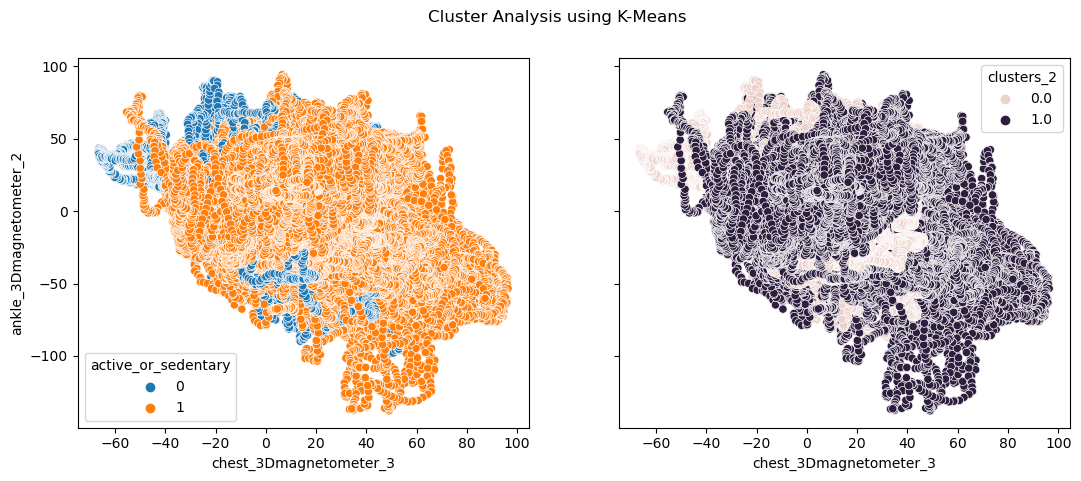

In [156]:
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)

sns.scatterplot(dfn,x="chest_3Dmagnetometer_3",y="ankle_3Dmagnetometer_2",hue=dfn.active_or_sedentary,ax=axes[0])
sns.scatterplot(dfn,x="chest_3Dmagnetometer_3",y="ankle_3Dmagnetometer_2",hue=cluster_df[name],ax=axes[1])

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")

Text(0.5, 0.98, 'Cluster Analysis using K-Means')

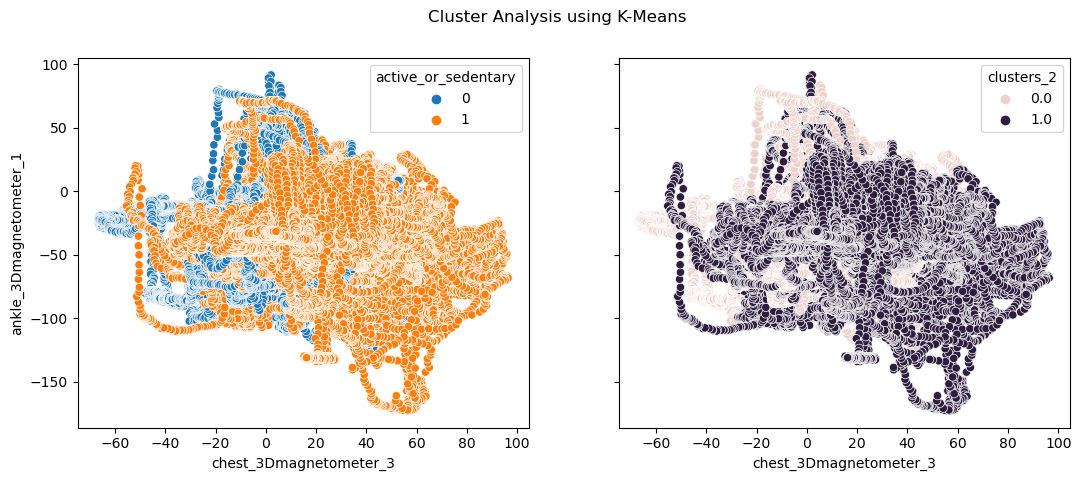

In [157]:
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)

sns.scatterplot(dfn,x="chest_3Dmagnetometer_3",y="ankle_3Dmagnetometer_1",hue=dfn.active_or_sedentary,ax=axes[0])
sns.scatterplot(dfn,x="chest_3Dmagnetometer_3",y="ankle_3Dmagnetometer_1",hue=cluster_df[name],ax=axes[1])

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")

Text(0.5, 0.98, 'Cluster Analysis using K-Means')

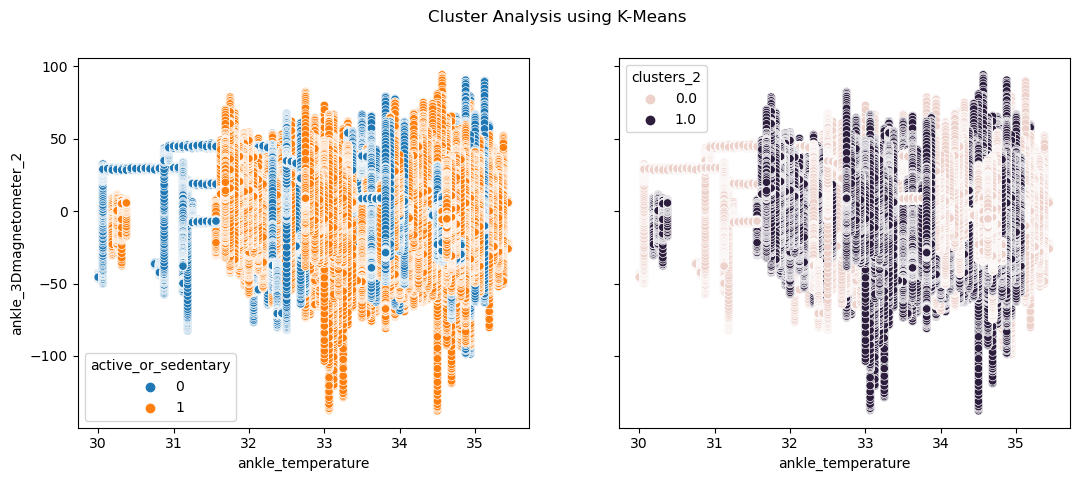

In [158]:
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)

sns.scatterplot(dfn,x="ankle_temperature",y="ankle_3Dmagnetometer_2",hue=dfn.active_or_sedentary,ax=axes[0])
sns.scatterplot(dfn,x="ankle_temperature",y="ankle_3Dmagnetometer_2",hue=cluster_df[name],ax=axes[1])

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")

Text(0.5, 0.98, 'Cluster Analysis using K-Means')

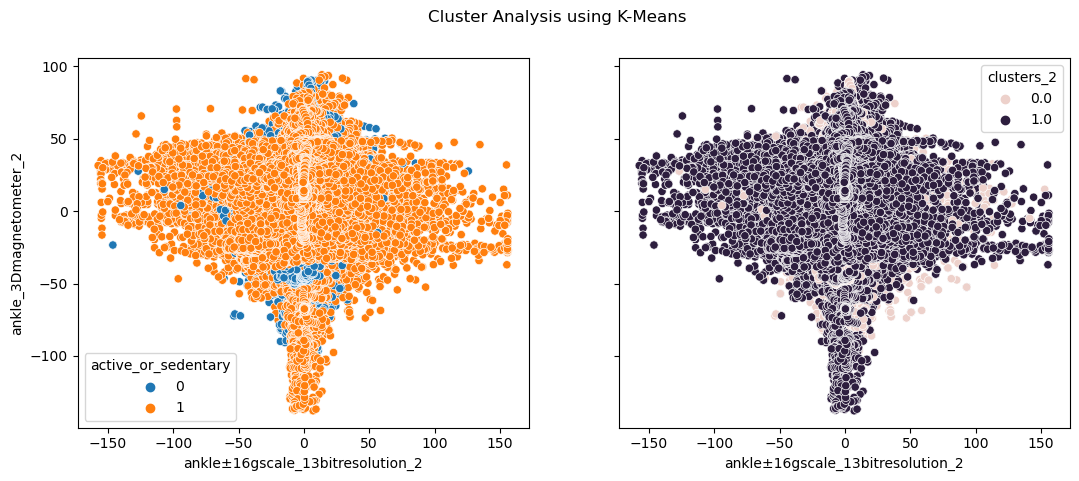

In [162]:
fig, axes = plt.subplots(nrows=1,ncols=2,sharex=True, sharey=True)

sns.scatterplot(dfn,x="ankle±16gscale_13bitresolution_2",y="ankle_3Dmagnetometer_2",hue=dfn.active_or_sedentary,ax=axes[0])
sns.scatterplot(dfn,x="ankle±16gscale_13bitresolution_2",y="ankle_3Dmagnetometer_2",hue=cluster_df[name],ax=axes[1])

fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.suptitle("Cluster Analysis using K-Means")

### Regression

In [56]:
dfn101 = dfn.loc[(dfn['Subject_ID'] == 101) | (dfn['Subject_ID'] == 108) | (dfn['Subject_ID'] == 105)]

In [58]:
for col in dfn101.columns:
    nun3 = dfn101[dfn101[col].isnull()].index
    dfn101.drop(nun3,inplace=True)

C:\Users\spin 3\AppData\Local\Temp\ipykernel_17376\1701461689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn101.drop(nun3,inplace=True)


In [ ]:
df101.reset_index(drop=True,inplace=True)

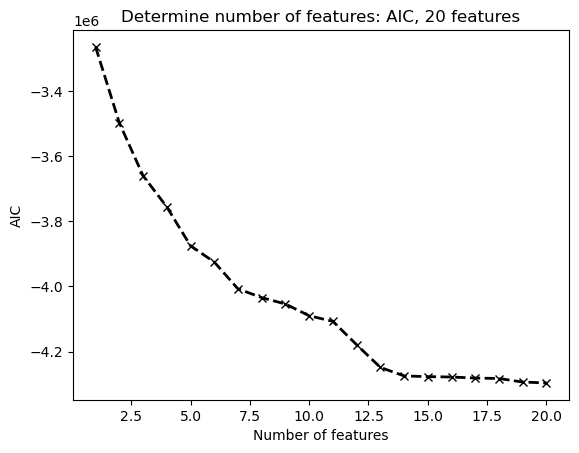

In [59]:
'''
resp is the response variable, and y is assigned the corresponding column from the DataFrame (dfn101).
X is created as a deep copy of the DataFrame, and the response variable column is dropped.

AIC is initialized as an array of zeros to store AIC values for different feature subsets.
The loop iterates over the number of features, fitting a Linear Regression model with Sequential Feature Selection for each subset.
AIC values are calculated and stored for each feature subset, along with the model and its performance metrics.

'''




resp = "active_or_sedentary"
y = dfn101[resp]
X = dfn101.copy(deep=True)
X.drop(columns=[resp],inplace=True)

AIC = np.zeros(len(X.columns))
lm = LinearRegression()
num_features = np.arange(1,len(dfn101.columns))
sfs_features = {nf : {} for nf in num_features[:-1]}

for idx,nf in enumerate(num_features[:-1]):
        sfs = SequentialFeatureSelector(lm,n_features_to_select=nf).fit(X,y)
        features = sfs.get_feature_names_out()
        new_X = X[features]
        nf_lm = lm.fit(new_X,y)
        score = nf_lm.score(new_X,y)
        y_pred = nf_lm.predict(new_X)
        mse = mean_squared_error(y,y_pred)
        AIC[idx] = 2.0*nf + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)
        sfs_features[nf] = {"score":score, "features": features, "model":nf_lm}
    
nf_lm = lm.fit(X,y)
score = nf_lm.score(X,y)
y_pred = nf_lm.predict(X)
mse = mean_squared_error(y,y_pred)
AIC[-1] = 2.0*num_features[-1] + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)

aic_features = np.argmin(AIC) + 1
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features,AIC,ls="--",lw=2,marker="x",c="k")


In [60]:
features = ['Subject_ID', 'timestamp', 'activity_ID', 'heart_rate', 'hand_temperature', 'hand±16gscale_13bitresolution_1', 'hand±16gscale_13bitresolution_2', 'hand_3Dmagnetometer_3', 'chest_temperature', 'chest±16gscale_13bitresolution_1', 'chest±16gscale_13bitresolution_2', 'chest±16gscale_13bitresolution_3', 'chest_3Dmagnetometer_1', 'chest_3Dmagnetometer_2', 'chest_3Dmagnetometer_3', 'ankle_temperature', 'ankle±16gscale_13bitresolution_1', 'ankle±16gscale_13bitresolution_2', 'ankle_3Dmagnetometer_1', 'ankle_3Dmagnetometer_2']

In [61]:




X2 = X[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     active_or_sedentary   R-squared:                       0.758
Model:                             OLS   Adj. R-squared:                  0.758
No. Observations:              1536582   F-statistic:                 2.408e+05
Covariance Type:             nonrobust   Prob (F-statistic):               0.00
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.1500      0.020    160.256      0.000       3.112       3.189
Subject_ID                          -0.0326      0.000   -243.463      0.000      -0.033      -0.032
timestamp                            0.0003   4.01e-07    839.040      0.000       0.000       0.000
activity_ID                          0.0002   4.04e-05      4.408      0.000    9.89e-05       0.000
heart_rate                          -0.0005   1.47e-05    -36.375      0.000      -0.001      -0.001
hand_temperature                    -0.0472      0.000   -118.112      0.000      -0.048      -0.046
hand±16gscale_13bitresolution_1     -0.0069   4.01e-05   -171.010      0.000      -0.007      -0.007
hand±16gscale_13bitresolution_2     -0.0014   3.11e-05    -45.325      0.000      -0.001      -0.001
hand_3Dmagnetometer_3                0.0012   1.06e-05    115.824      0.000       0.001       0.001
chest_temperature                    0.0946      0.000    252.422      0.000       0.094       0.095
chest±16gscale_13bitresolution_1     0.0087      0.000     75.501      0.000       0.008       0.009
chest±16gscale_13bitresolution_2    -0.0084   4.49e-05   -187.431      0.000      -0.009      -0.008
chest±16gscale_13bitresolution_3    -0.0171   7.11e-05   -241.006      0.000      -0.017      -0.017
chest_3Dmagnetometer_1               0.0030   1.41e-05    216.052      0.000       0.003       0.003
chest_3Dmagnetometer_2               0.0019   1.66e-05    116.704      0.000       0.002       0.002
chest_3Dmagnetometer_3               0.0016   1.31e-05    120.766      0.000       0.002       0.002
ankle_temperature                   -0.0424      0.001    -68.765      0.000      -0.044      -0.041
ankle±16gscale_13bitresolution_1     0.0008   3.23e-05     26.010      0.000       0.001       0.001
ankle±16gscale_13bitresolution_2    -0.0005   2.58e-05    -19.989      0.000      -0.001      -0.000
ankle_3Dmagnetometer_1               0.0018   1.27e-05    141.690      0.000       0.002       0.002
ankle_3Dmagnetometer_2               0.0010   9.79e-06     99.133      0.000       0.001       0.001
====================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
new_features = [f for f in features if not f in ["timestamp","ankle±16gscale_13bitresolution_2","ankle±16gscale_13bitresolution_1","heart_rate","ankle_3Dmagnetometer_2","hand_3Dmagnetometer_3","ankle_3Dmagnetometer_1"]]

X2 = X[new_features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     active_or_sedentary   R-squared:                       0.546
Model:                             OLS   Adj. R-squared:                  0.546
No. Observations:              1536582   F-statistic:                 1.422e+05
Covariance Type:             nonrobust   Prob (F-statistic):               0.00
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.0991      0.026    158.833      0.000       4.049       4.150
Subject_ID                          -0.0130      0.000    -72.941      0.000      -0.013      -0.013
activity_ID                          0.0079   5.32e-05    148.927      0.000       0.008       0.008
hand_temperature                    -0.2841      0.000   -636.856      0.000      -0.285      -0.283
hand±16gscale_13bitresolution_1     -0.0092   5.27e-05   -174.176      0.000      -0.009      -0.009
hand±16gscale_13bitresolution_2      0.0059   4.15e-05    143.132      0.000       0.006       0.006
chest_temperature                    0.2660      0.000    574.919      0.000       0.265       0.267
chest±16gscale_13bitresolution_1     0.0066      0.000     42.215      0.000       0.006       0.007
chest±16gscale_13bitresolution_2    -0.0074   6.06e-05   -122.734      0.000      -0.008      -0.007
chest±16gscale_13bitresolution_3    -0.0205   9.31e-05   -219.705      0.000      -0.021      -0.020
chest_3Dmagnetometer_1               0.0036   1.68e-05    215.794      0.000       0.004       0.004
chest_3Dmagnetometer_2              -0.0001   1.87e-05     -6.500      0.000      -0.000    -8.5e-05
chest_3Dmagnetometer_3               0.0039   1.59e-05    247.012      0.000       0.004       0.004
ankle_temperature                   -0.0740      0.001    -90.273      0.000      -0.076      -0.072
====================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
new_features = [f for f in new_features if not f in ["chest_3Dmagnetometer_2","chest_3Dmagnetometer_1","chest_3Dmagnetometer_3","chest±16gscale_13bitresolution_1","hand±16gscale_13bitresolution_2"]]

X2 = X[new_features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     active_or_sedentary   R-squared:                       0.504
Model:                             OLS   Adj. R-squared:                  0.504
No. Observations:              1536582   F-statistic:                 1.949e+05
Covariance Type:             nonrobust   Prob (F-statistic):               0.00
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                4.8512      0.026    189.689      0.000       4.801       4.901
Subject_ID                          -0.0231      0.000   -138.709      0.000      -0.023      -0.023
activity_ID                          0.0058    5.5e-05    105.822      0.000       0.006       0.006
hand_temperature                    -0.2992      0.000   -700.893      0.000      -0.300      -0.298
hand±16gscale_13bitresolution_1     -0.0097   5.48e-05   -177.803      0.000      -0.010      -0.010
chest_temperature                    0.2887      0.000    606.524      0.000       0.288       0.290
chest±16gscale_13bitresolution_2    -0.0092   5.84e-05   -157.608      0.000      -0.009      -0.009
chest±16gscale_13bitresolution_3    -0.0290   8.02e-05   -361.561      0.000      -0.029      -0.029
ankle_temperature                   -0.0725      0.001    -86.986      0.000      -0.074      -0.071
====================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

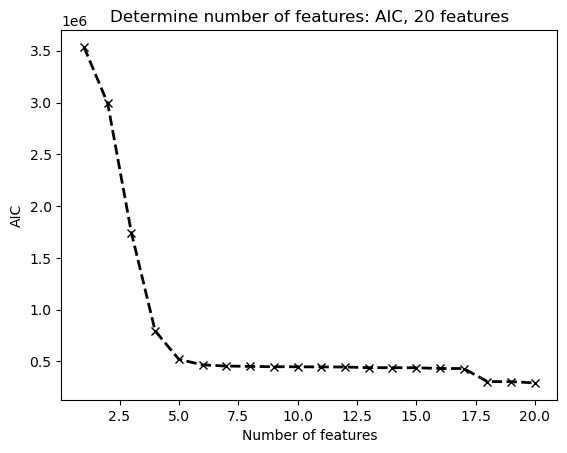

In [64]:
resp = "chest_temperature"
y = dfn101[resp]
X = dfn101.copy(deep=True)
X.drop(columns=[resp],inplace=True)

AIC = np.zeros(len(X.columns))
lm = LinearRegression()
num_features = np.arange(1,len(dfn101.columns))
sfs_features = {nf : {} for nf in num_features[:-1]}

for idx,nf in enumerate(num_features[:-1]):
    sfs = SequentialFeatureSelector(lm,n_features_to_select=nf).fit(X,y)
    features = sfs.get_feature_names_out()
    new_X = X[features]
    nf_lm = lm.fit(new_X,y)
    score = nf_lm.score(new_X,y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y,y_pred)
    AIC[idx] = 2.0*nf + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)
    sfs_features[nf] = {"score":score, "features": features, "model":nf_lm}
    
nf_lm = lm.fit(X,y)
score = nf_lm.score(X,y)
y_pred = nf_lm.predict(X)
mse = mean_squared_error(y,y_pred)
AIC[-1] = 2.0*num_features[-1] + len(X) * np.log(2.0*np.pi*(mse ** 2.0)) + len(X)

aic_features = np.argmin(AIC) + 1
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features,AIC,ls="--",lw=2,marker="x",c="k")

In [70]:
features = ['Subject_ID', 'timestamp', 'activity_ID', 'hand_temperature', 'hand±16gscale_13bitresolution_1' ,  'chest±16gscale_13bitresolution_2', 'chest±16gscale_13bitresolution_3',   'ankle_temperature' ]

In [71]:


X2 = X[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      chest_temperature   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
No. Observations:             1536582   F-statistic:                 1.426e+06
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -27.7911      0.032   -862.854      0.000     -27.854     -27.728
Subject_ID                           0.1911      0.000    948.166      0.000       0.191       0.191
timestamp                            0.0003   5.39e-07    605.178      0.000       0.000       0.000
activity_ID                         -0.0343   8.05e-05   -425.995      0.000      -0.034      -0.034
hand_temperature                     0.4840      0.001    668.631      0.000       0.483       0.485
hand±16gscale_13bitresolution_1     -0.0091   8.32e-05   -109.097      0.000      -0.009      -0.009
chest±16gscale_13bitresolution_2    -0.0069   8.93e-05    -76.941      0.000      -0.007      -0.007
chest±16gscale_13bitresolution_3    -0.0098      0.000    -79.180      0.000      -0.010      -0.010
ankle_temperature                    0.8230      0.001    760.839      0.000       0.821       0.825
====================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
X2 = X[["ankle_temperature"]]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      chest_temperature   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
No. Observations:             1536582   F-statistic:                 2.021e+06
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.4168      0.030   -212.406      0.000      -6.476      -6.358
ankle_temperature     1.2714      0.001   1421.665      0.000       1.270       1.273
=====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
X2 = X[["hand_temperature"]]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      chest_temperature   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
No. Observations:             1536582   F-statistic:                 3.280e+06
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.0795      0.016    514.080      0.000       8.049       8.110
hand_temperature     0.8485      0.000   1811.184      0.000       0.848       0.849
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MET model

Using a t-test, I am going to test the hypothesis that the mean heart rate for 'active' activities is greater than the mean heart rate for 'sedentary' activities. That is:

H$_{0}$: $\mu$$_{active}$ = $\mu$$_{sedentary}$

H$_{1}$: $\mu$$_{active}$ > $\mu$$_{sedentary}$

An exception to the hypothesis is subject 109. As the data for this individual only contains one type of activity, a t-test comparing means is not possible.

In [88]:
'''
we have not explicitly defined the significance level (alpha) so The alpha value represents the significance level 
of the statistical test and is set to 0.05 by default. 
'''

def HR_activitylevel_subject(activitylevel,subject):    
    HR_level_and_subject=df_master[(df_master['active_or_sedentary']==activitylevel) & 
                                  (df_master['Subject_ID']==subject)]["heart_rate"]
    return HR_level_and_subject

def ttest(subject):
    HR_activitylevel_subject('active',subject)
    HR_activitylevel_subject('sedentary',subject)

    mean1=HR_activitylevel_subject('active',subject).mean()
    var1=HR_activitylevel_subject('active',subject).var(ddof=1)
    n_obsvns1=len(HR_activitylevel_subject('active',subject))

    mean2=HR_activitylevel_subject('sedentary',subject).mean()
    var2=HR_activitylevel_subject('sedentary',subject).var(ddof=1)
    n_obvns2=len(HR_activitylevel_subject('sedentary',subject))

    res=stats.ttest_ind_from_stats(mean1, np.sqrt(var1), n_obsvns1,
                               mean2,np.sqrt(var2),n_obvns2,equal_var=False,alternative='greater')
    
    return list([str(subject), f'{res[0]:,.2f}'.format(res[0]), f'{res[1]:,.5f}'.format(res[1])])

In [89]:
ttests_summary=pd.DataFrame(columns=["Subject_ID","t-test","p-value"])
for i in range(1,9,1):
    ttests_summary.loc[ttests_summary.shape[0]]=ttest(100+i)
ttests_summary

Subject_ID  t-test  p-value
0        101  730.82  0.00000
1        102  501.67  0.00000
2        103  292.91  0.00000
3        104  348.48  0.00000
4        105  689.56  0.00000
5        106  530.72  0.00000
6        107  457.05  0.00000
7        108  673.14  0.00000

In [94]:
def ttest(subject):
    HR_active = HR_activitylevel_subject('active', subject)
    HR_sedentary = HR_activitylevel_subject('sedentary', subject)

    # Check for insufficient data
    if len(HR_active) < 2 or len(HR_sedentary) < 2:
        print(f'Insufficient data for Subject {subject}.')
        return [str(subject), 'nan', 'nan']

    mean1, var1, n_obsvns1 = HR_active.mean(), HR_active.var(ddof=1), len(HR_active)
    mean2, var2, n_obvns2 = HR_sedentary.mean(), HR_sedentary.var(ddof=1), len(HR_sedentary)

    print(f'Subject {subject} - Active: Mean={mean1:.2f}, Variance={var1:.2f}, Sample Size={n_obsvns1}')
    print(f'Subject {subject} - Sedentary: Mean={mean2:.2f}, Variance={var2:.2f}, Sample Size={n_obvns2}')

    res = stats.ttest_ind_from_stats(mean1, np.sqrt(var1), n_obsvns1,
                                     mean2, np.sqrt(var2), n_obvns2, equal_var=False, alternative='greater')

    return [str(subject), f'{res[0]:,.2f}', f'{res[1]:.5e}']

ttests_summary = pd.DataFrame(columns=["Subject_ID", "t-test", "p-value"])
for i in range(101, 109):
    ttests_summary.loc[ttests_summary.shape[0]] = ttest(i)

ttests_summary


Subject 101 - Active: Mean=139.10, Variance=368.24, Sample Size=273172
Subject 101 - Sedentary: Mean=100.83, Variance=308.47, Sample Size=221244
Subject 102 - Active: Mean=124.42, Variance=307.29, Sample Size=144121
Subject 102 - Sedentary: Mean=90.26, Variance=288.02, Sample Size=115007
Subject 103 - Active: Mean=111.50, Variance=220.48, Sample Size=58947
Subject 103 - Sedentary: Mean=86.51, Variance=404.41, Sample Size=114394
Subject 104 - Active: Mean=121.49, Variance=140.41, Sample Size=116006
Subject 104 - Sedentary: Mean=96.82, Variance=427.01, Sample Size=112379
Subject 105 - Active: Mean=123.97, Variance=536.69, Sample Size=302482
Subject 105 - Sedentary: Mean=88.42, Variance=208.55, Sample Size=236140
Subject 106 - Active: Mean=118.86, Variance=662.19, Sample Size=258072
Subject 106 - Sedentary: Mean=85.63, Variance=322.35, Sample Size=238088
Subject 107 - Active: Mean=111.49, Variance=288.49, Sample Size=125869
Subject 107 - Sedentary: Mean=78.01, Variance=321.09, Sample Size

Subject_ID  t-test      p-value
0        101  730.82  0.00000e+00
1        102  501.67  0.00000e+00
2        103  292.91  0.00000e+00
3        104  348.48  0.00000e+00
4        105  689.56  0.00000e+00
5        106  530.72  0.00000e+00
6        107  457.05  0.00000e+00
7        108  673.14  0.00000e+00

The table shows the results of the t-tests.It determines the threshold for rejecting the null hypothesis. We can see that for all of the candidate expent 109 subject the p-values are less than 5% and it is close to 0 it is because we have big data. Therefore we can reject the null hypothesis and conclude that mean heart rate for 'active' activities is greater than the mean heart rate for 'sedentary' activities at the 5% significance level.


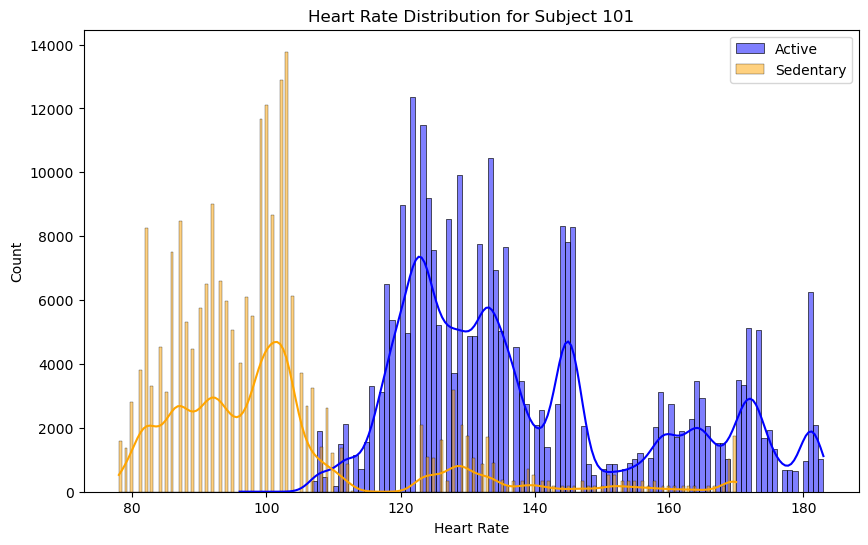

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for Subject 101
plt.figure(figsize=(10, 6))
sns.histplot(HR_activitylevel_subject('active', 101), kde=True, label='Active', color='blue')
sns.histplot(HR_activitylevel_subject('sedentary', 101), kde=True, label='Sedentary', color='orange')
plt.title('Heart Rate Distribution for Subject 101')
plt.xlabel('Heart Rate')
plt.legend()
plt.show()


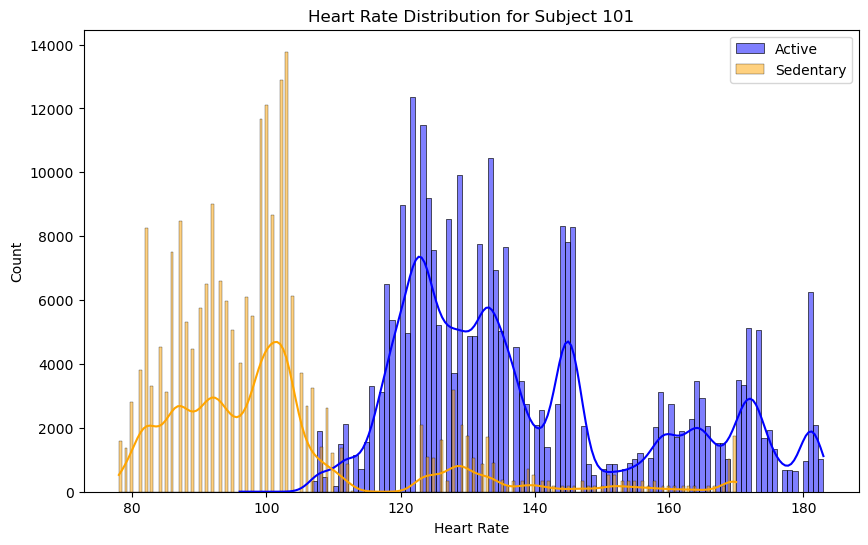

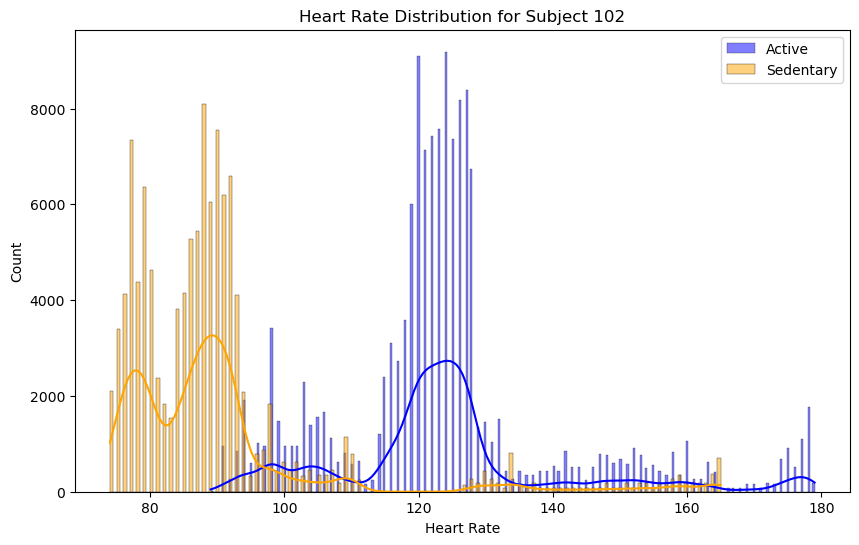

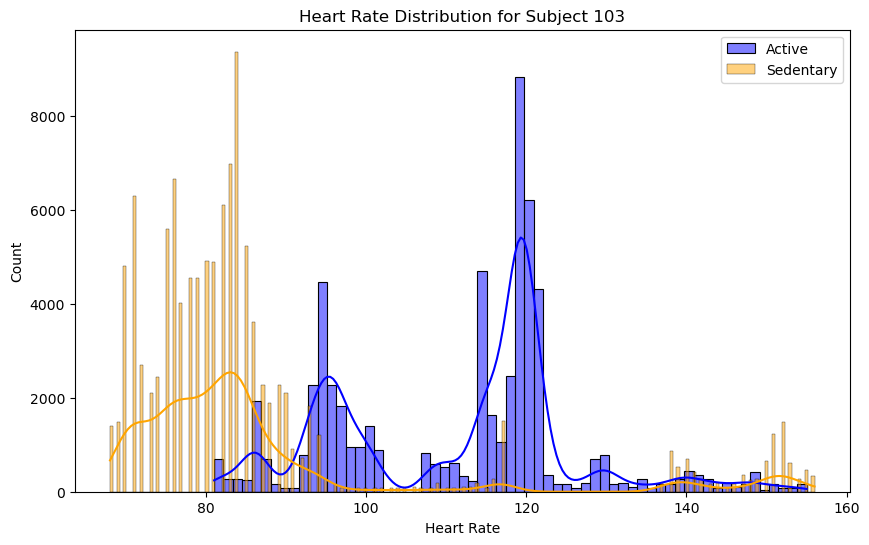

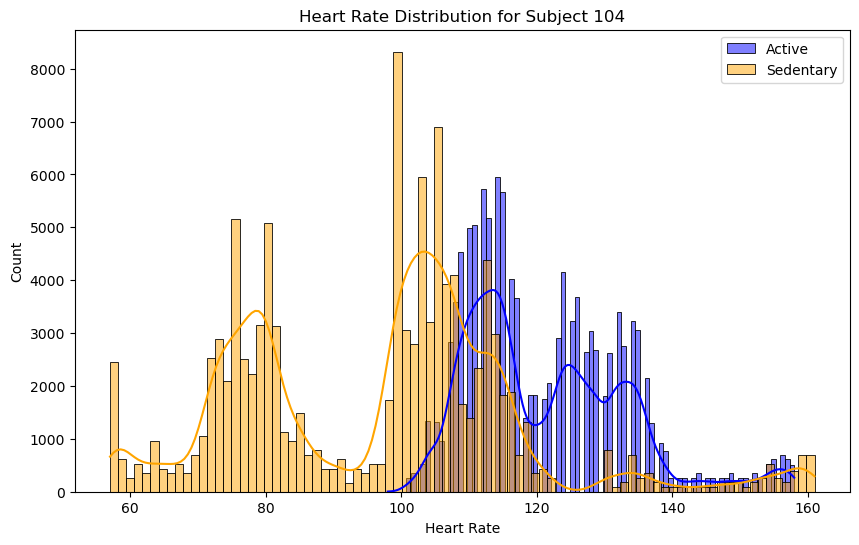

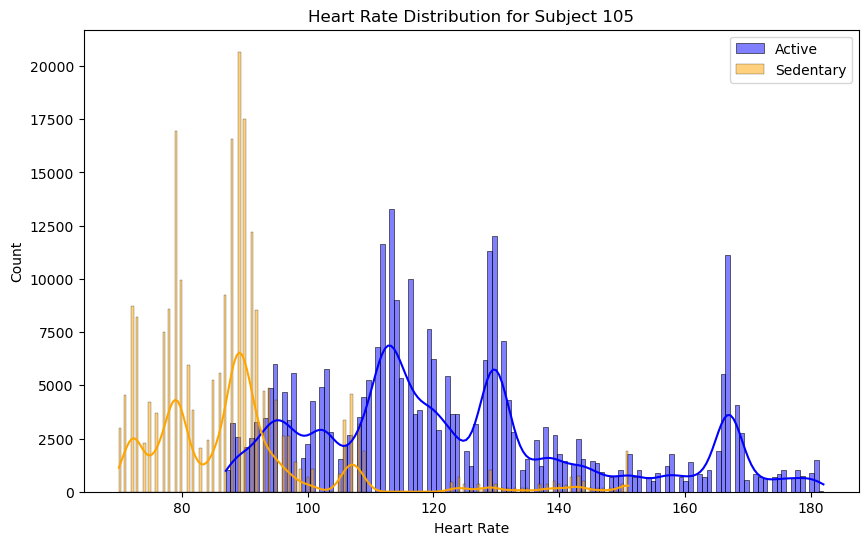

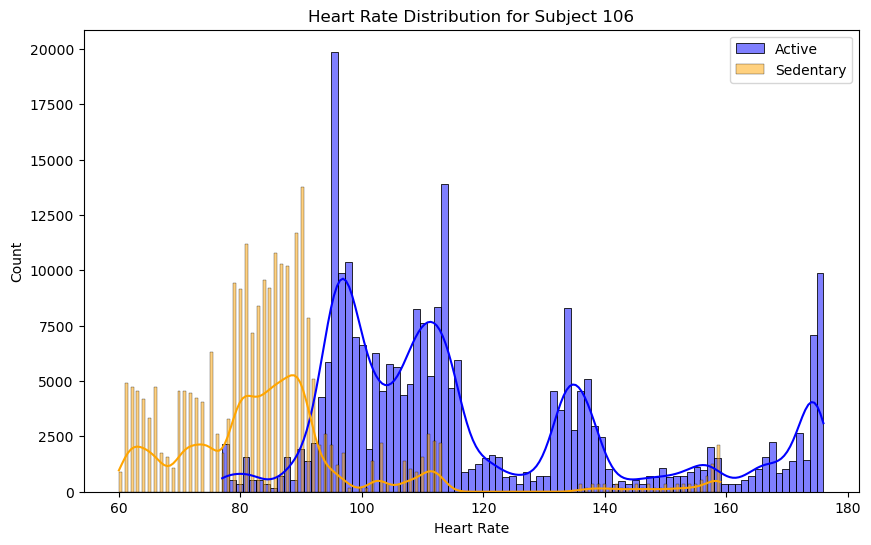

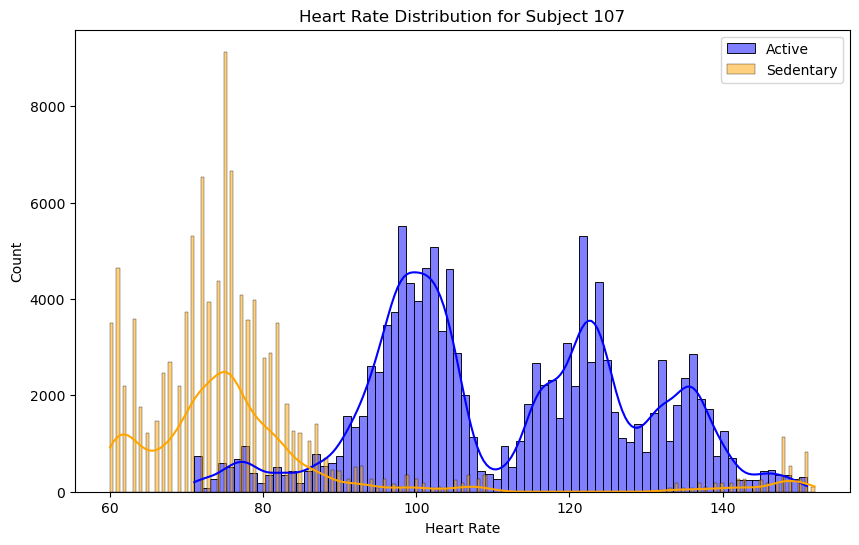

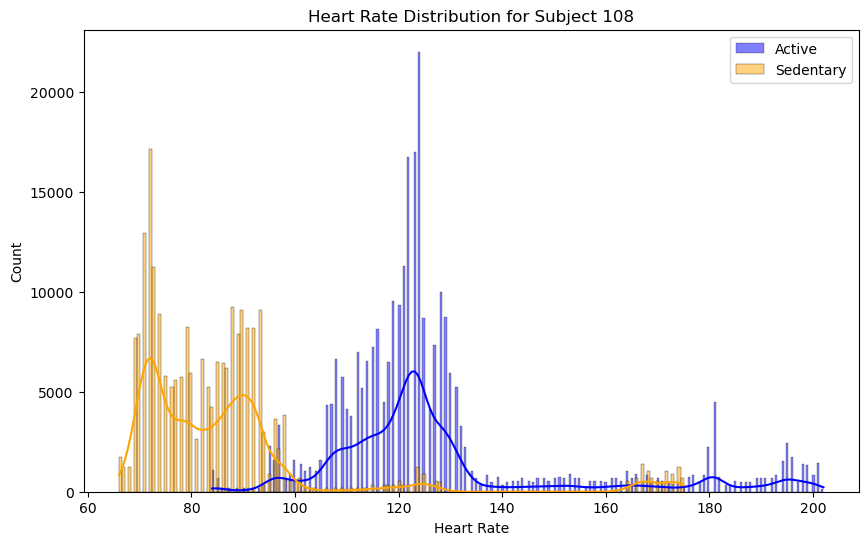

In [114]:
for i in range(101,109,1):
    plt.figure(figsize=(10, 6))
    sns.histplot(HR_activitylevel_subject('active', i), kde=True, label='Active', color='blue')
    sns.histplot(HR_activitylevel_subject('sedentary', i), kde=True, label='Sedentary', color='orange')
    plt.title(f'Heart Rate Distribution for Subject {i}')
    plt.xlabel('Heart Rate')
    plt.legend()
    plt.show()

The histplot 

In [64]:
HR_activitylevel_subject('active',101)

95730      109.0
95731      109.0
95732      109.0
95733      109.0
95734      109.0
           ...  
2113405    110.0
2113406    110.0
2113407    110.0
2113408    110.0
2113409    110.0
Name: heart_rate, Length: 190496, dtype: float64

I buil a linear regression model with metabolic equivalent rate as a function of the heart rate and the temperatures of hand, chest and ankle to check relationship between heart rate, chest temperature, and ankle temperature with MET.

In [100]:
df_model =df_master[['Subject_ID','MET','activity','heart_rate','hand_temperature','chest_temperature','ankle_temperature']]

x_train, x_test, y_train, y_test = train_test_split(df_model[['heart_rate', 'hand_temperature','chest_temperature','ankle_temperature']],
                                                    df_model['MET'],test_size=0.5,random_state=20)    
first_linear=linear_model.LinearRegression()
first_linear.fit(x_train,y_train)
first_linear.coef_,

model_output_df=pd.DataFrame(first_linear.coef_,x_train.columns,columns=["Coefficient"])
model_output_df['Coefficient']=model_output_df['Coefficient'].apply(lambda x: '{:.2f}'.format(x))
model_output_df

Coefficient
heart_rate               0.06
hand_temperature        -0.21
chest_temperature        0.23
ankle_temperature       -0.06

The positive coefficients for heart rate and chest temperature suggest there may be a positive relationship between these features and MET, while the negative coefficients for hand and ankle temperatures may have a negative relationship with MET. Physiologically this would make sense, as during exercise the heart beats faster to pump more oxygen around the body, but oxygen will usually go mainly towards the muscles rather than the body's extremities, such as the hand and ankle.



In [101]:
y_pred=first_linear.predict(x_test)
MSE=metrics.mean_squared_error(y_test, y_pred)
R_sqrd = metrics.r2_score(y_test, y_pred)
print('MSE = ' + f'{MSE:.2f}')
print('R^2 = ' + f'{R_sqrd:.2f}')

MSE = 1.74
R^2 = 0.63


As a goodness of fit measure, I have chosen the mean squared error (MSE). The value for the above model is 1.74. The coefficient of determination R 2
 =0.62

Figure identified subjects having two peaks in the frequencies of their heart beats. So as a second model I chose a K-means clustering model with two centroids, one of which may represent sedentary activities, and the other may represent active activities.

C:\Users\spin 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\spin 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\spin 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\spin 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

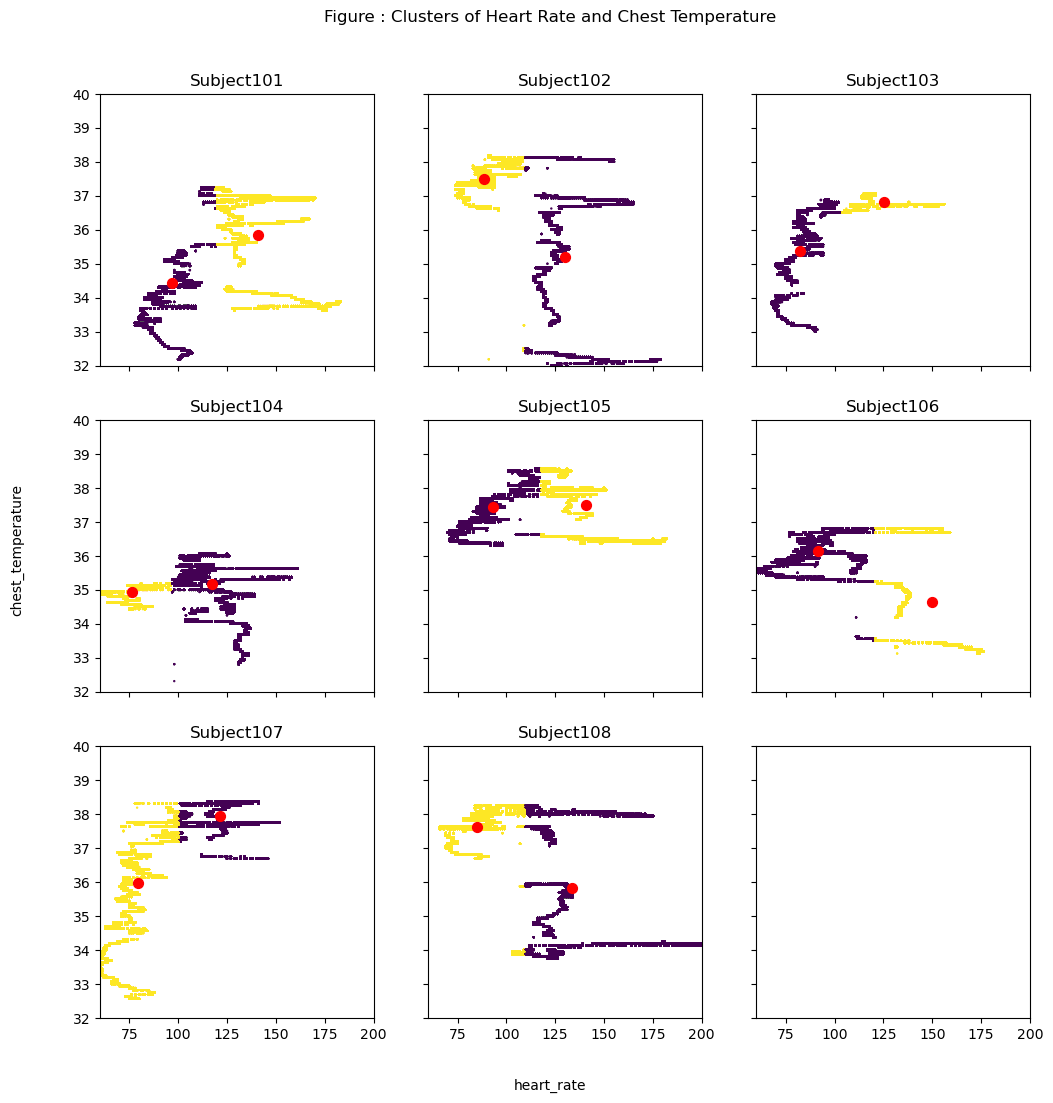

In [108]:
model= KMeans(init='random', n_clusters=2)

fig,axes=plt.subplots(nrows=3,ncols=3,sharex=True, sharey=True,figsize=(12,12), constrained_layout=False);

for i in range(1,9,1):
    subject_filter=df_master['Subject_ID']==100+i   #=str(100+count)  
    Z=df_master.loc[subject_filter,:][["heart_rate","chest_temperature"]].to_numpy()
    model.fit(Z)
    y_kmeans = model.fit_predict(Z)
    plt.subplot(330+i) #,sharex=ax, sharey=ax
    plt.scatter(Z[:,0], Z[:,1], c=y_kmeans, s=0.5);
    centres=model.cluster_centers_
    plt.scatter(centres[:,0], centres[:,1],c='r', s=50)
    
    plt.xlim(60,200)
    plt.ylim(32,40)
    plt.title('Subject'+ str(100+i));
#fig.legend([y_keans]handles=["active","sedentary"]).bbox_to_anchor=(1,1)
fig.text(0.5,0.05,'heart_rate',ha='center')
fig.text(0.05,0.5,'chest_temperature',va='center',rotation='vertical')
plt.suptitle('Figure : Clusters of Heart Rate and Chest Temperature',y=0.95);

In [ ]:
elbow = 2
components = [f"PC{i}" for i in range(1,elbow+1)]
loadings[components]

The results from the clustering model do not reveal closely grouped clusters and demonstrate considerable variability among individuals performing the same activities. While the fitness tracker market may prioritize active pursuits, it's noteworthy that the key sensory metrics in this study exhibit a wide range. Consequently, when calibrating a tracking device, it is advisable to incorporate a diverse spectrum of measurements.

Some participants opted for an additional experiment, and a more in-depth analysis could determine if their enthusiasm for participation indicates they might represent a more receptive target market compared to those in the broader study. However, it is crucial to note that the experiment involved only nine individuals, and generalizations to the wider population should not be made based on such a small sample size.

For future research opportunities, I propose diversifying the pool of participants. Expanding data collection to include a more diverse group of individuals, who may respond differently during activities, would yield more profound insights into the potential fitness tracker market. Notably, contemporary tracker models increasingly incorporate sensors for monitoring glucose levels and sleep quality. Including these metrics in subsequent experiments could provide valuable additional information.

# Conclusion

In conclusion, the comprehensive analysis of fitness data collected from Trivisio's Colibri Wireless wearables has revealed valuable insights into the relationships between various physiological and motion sensor parameters. Through exploratory data analysis, hypothesis testing, and predictive modeling, we have identified key factors influencing activity patterns and proposed actionable recommendations for software development and user engagement.

The predictive hypothesis centers on developing a mathematical model to categorize different activity types (activity_ID) based on physiological and motion sensor data. Our model focuses on features such as heart rate, age, height, weight, resting and max heart rate, and angular rates from hand, chest, and ankle sensors. We have excluded less relevant features like hand scales, 3D magnetometer data, and specific sensor orientations.

The proposed model's actionable implications involve the development of software that automatically classifies and logs activity types in Trivisio's wearable devices. This software could significantly enhance user experience, providing personalized insights into physical activities and contributing to a more comprehensive understanding of user behavior.

Furthermore, recommendations for user engagement include encouraging users to utilize the enhanced activity tracking features, establishing a feedback mechanism for users to provide accuracy feedback, and implementing a user-friendly interface for displaying predicted activity types.


In summary,I undertook a rigorous analysis of Trivisio's Colibri Wireless fitness tracking data to derive predictive hypotheses and actionable insights. The step-by-step process involved data preprocessing, exploratory data analysis (EDA), hypothesis testing, predictive modeling, and justification for feature selection. 

In Data Preprocessing I meticulously handled missing values, transformed categorical variables, and added relevant features like MET and activity columns. Removal of irrelevant columns and subjects streamlined the dataset for meaningful analysis. 

In Exploratory Data Analysis (EDA) I Leverage visualizations such as bar charts, box plots, and histograms, I gained a profound understanding of data distribution and patterns. Notable observations, such as Subject 109's limited participation and unique physiological patterns, were crucial for subsequent analyses.
In Hypothesis Testing I Conducte hypothesis tests, I explored the impact of activity levels on continuous features and investigated relationships between physiological metrics.A classification algorithm for predicting activity types and identifying a potential mathematical model for hand and chest temperatures were key outcomes.

For Predictive Modeling I Leverage linear regression, logistic regression, and clustering models, I formulated predictive hypotheses for heart rate, MET, and activity_ID. Feature importance analysis provided insights into critical variables influencing model predictions. 

For Feature Selection and Justification I selecte of explanatory variables was strategic, with a focus on relevance to the predictive hypothesis.For the model, activity_ID was a pivotal variable, capturing the essence of different activities and their impact on other metrics.Justification for excluding certain features was based on their limited contribution to the predictive hypothesis, ensuring a streamlined and impactful model.

My Actionable Recommendations are Implement policies promoting diverse participation in fitness activities, addressing potential bias in data collection. Integrate software for real-time anomaly detection, providing users with instant feedback on irregular physiological patterns. Consider hardware enhancements for more accurate temperature readings, ensuring robustness in diverse environmental conditions. Develop software that integrates the predictive model for automatic activity classification and Implement a user-friendly interface to display predicted activity types.For the features I suggest add MET and BMI . For User Engagement Encourage users to use the enhanced activity tracking features to gain a more detailed understanding of their physical activities. In Feedback Mechanismn, Establish a mechanism for users to provide feedback on the accuracy of predicted activities, enabling continuous improvement of the model.
This approach not only delves into predictive modeling but extends to actionable recommendations for policy, software, and hardware enhancements.the proposed predictive model offers a promising avenue for improving the functionality of Trivisio's wearables. By leveraging the identified features and excluding less informative ones, the model provides a solid foundation for software development and user interaction, ultimately contributing to the continued refinement and advancement of fitness tracking technology.

this report represents a significant step forward in harnessing the power of data for Trivisio. By leveraging the insights and recommendations presented, Trivisio is well-positioned to make informed, data-driven decisions that propel the organization towards continued success and innovation. The journey of data analysis is an ongoing one, and Trivisio's commitment to this path promises a future replete with informed decisions and strategic excellence.

In [41]:
filepath="Ka534_277215_KianaAsadzadeh_report2.ipynb"

In [42]:
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 3979


### References:

1 :https://arxiv.org/abs/2308.08556

2 :https://arxiv.org/abs/2309.14308

3 :https://arxiv.org/abs/2307.05339

4 :https://www.nibib.nih.gov/news-events/newsroom/smartwatch-data-used-predict-clinical-test-results-4

5 :https://towardsdatascience.com/how-does-your-smartwatch-know-youre-standing-60c1c33b0be8

6 :https://www.idtechex.com/en/research-report/wearable-sensors-2021-2031/780

7 : All the labs and lectures of the Data Science Research Methods course are conducted or led by James Van Yperen.